In [3]:
pip install --upgrade pandas pyarrow


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 14.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.7/11.5 MB 11.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/11.5 MB 19.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/11.5 MB 19.5 MB/s eta 0:00:01
   --------------------- ------------------ 6.1/11.5 MB 21.6 MB/s eta 0:00:01
   ----------------------- ---------------- 6.9/11.5 MB 20.9 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 20.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.5 MB 22.9 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 21.1 MB/s eta 0:00:01
   -------------------------------------- - 11.1/11.5 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.5 MB 21.1 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.2 which is incompatible.


In [19]:
pip install missingno matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 48.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 49.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ------------- -------------------------- 14.9/44.5 MB 72.3 MB/s eta 0:00:01
   ------------------------- -------------- 28.0/44.5 MB 65.8 MB/s eta 0:00:01
   ------------------------------------- -- 42.2/44.5 MB 67.1 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 61.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install graphviz sqlalchemy eralchemy numpy pandas openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql

import os
from eralchemy import render_er
import sqlalchemy as sa

In [9]:
import subprocess

# Define the SQLite database file
database_path = 'basketball.sqlite'

# Use ERAlchemy to generate the ER diagram
subprocess.run(['eralchemy', '-i', f'sqlite:///{database_path}', '-o', 'er_diagram.png'])


CompletedProcess(args=['eralchemy', '-i', 'sqlite:///basketball.sqlite', '-o', 'er_diagram.png'], returncode=1)

In [12]:

db_path = 'nba.sqlite'
connection = sql.connect(db_path)  # create connection object to database
print("SQL database connected")
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connection)
print(table)


SQL database connected
                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


In [8]:
table.head()

game_id  eventnum  eventmsgtype  eventmsgactiontype  period  \
0  0029600012         0            12                   0       1   
1  0029600012         2            10                   0       1   
2  0029600012         3             2                   1       1   
3  0029600012         4             4                   0       1   
4  0029600012         5             2                   1       1   

  wctimestring pctimestring                              homedescription  \
0     14:43 PM        12:00                                         None   
1     14:50 PM        12:00  Jump Ball O'Neal vs. Kleine: Tip to Cassell   
2     14:51 PM        11:45                                         None   
3     14:51 PM        11:43                 O'Neal REBOUND (Off:0 Def:1)   
4     14:51 PM        11:29              MISS Ceballos 26' 3PT Jump Shot   

                   neutraldescription          visitordescription  ...  \
0  Start of 1st Period (14:43 PM EST)                        None  ...   
1                                None                        None  ...   
2                                None  MISS Cassell 15' Jump Shot  ...   
3                                None                        None  ...   
4                                None                        None  ...   

  player2_team_nickname player2_team_abbreviation  person3type player3_id  \
0                  None                      None          0.0          0   
1                  Suns                       PHX          5.0        208   
2                  None                      None          0.0          0   
3                  None                      None          0.0          0   
4                  None                      None          0.0          0   

  player3_name player3_team_id player3_team_city player3_team_nickname  \
0         None            None              None                  None   
1  Sam Cassell    1610612756.0           Phoenix                  Suns   
2         None            None              None                  None   
3         None            None              None                  None   
4         None            None              None                  None   

  player3_team_abbreviation  video_available_flag  
0                      None                     0  
1                       PHX                     0  
2                      None                     0  
3                      None                     0  
4                      None                     0  

[5 rows x 34 columns]

In [ ]:
db_path = 'nba.sqlite'
connection = sql.connect(db_path) 
# Get the list of all tables in the database
table_names_query = "SELECT name FROM sqlite_master WHERE type='table'"
table_names_df = pd.read_sql_query(table_names_query, connection)

# Directory to store the CSV files (change this to your desired path)
output_directory = r'C:\Users\dysonj\Downloads\NBA\Basketball'

# Create directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Export each table to a CSV file
for table_name in table_names_df['name']:
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, connection)
    file_path = os.path.join(output_directory, f"{table_name}.csv")
    df.to_csv(file_path, index=False)
    print(f"Exported {table_name} to {file_path}")

# Close the connection
connection.close()
print("SQL database connection closed")

SQL database connection closed


In [15]:
import sqlite3 as sql
import pandas as pd

# Connect to the NBA database
db_path = 'nba.sqlite'
connection = sql.connect(db_path)
print("SQL database connected")

total_players_query = """
SELECT COUNT(DISTINCT id) AS total_players
FROM player
"""
total_players_df = pd.read_sql_query(total_players_query, connection)


players_by_position_query = """
SELECT position, COUNT(DISTINCT player_id) AS total_players
FROM draft_combine_stats
GROUP BY position
"""
players_by_position_df = pd.read_sql_query(players_by_position_query, connection)


total_teams_query = """
SELECT COUNT(DISTINCT id) AS total_teams
FROM team
"""
total_teams_df = pd.read_sql_query(total_teams_query, connection)

year_range_query = """
SELECT MIN(game_date) AS start_year, MAX(game_date) AS end_year
FROM game
"""
year_range_df = pd.read_sql_query(year_range_query, connection)

# Display the results
print("Total Players:")
print(total_players_df)
print("\nPlayers by Position:")
print(players_by_position_df)
print("\nTotal Teams:")
print(total_teams_df)
print("\nRange of Years/Seasons:")
print(year_range_df)

# Close the connection
connection.close()
print("SQL database connection closed")

SQL database connected
Total Players:
   total_players
0           4815

Players by Position:
   position  total_players
0                        5
1         C            129
2      C-PF             62
3        PF            286
4      PF-C             83
5     PF-SF             55
6        PG            259
7     PG-SG             62
8        SF            189
9     SF-PF             62
10    SF-SG             48
11       SG            234
12    SG-PG             40
13    SG-SF             94

Total Teams:
   total_teams
0           30

Range of Years/Seasons:
            start_year             end_year
0  1946-11-01 00:00:00  2023-06-12 00:00:00
SQL database connection closed


# looking into the data

## player data set
- Shows if the player is active or not
- 0(inactive)= 3982   1 (active)= 519

In [ ]:
table_data.keys()

NameError: name 'table_data' is not defined

In [19]:
table_data["Player"]

id            full_name first_name     last_name  is_active
0       76001       Alaa Abdelnaby       Alaa     Abdelnaby          0
1       76002      Zaid Abdul-Aziz       Zaid    Abdul-Aziz          0
2       76003  Kareem Abdul-Jabbar     Kareem  Abdul-Jabbar          0
3          51   Mahmoud Abdul-Rauf    Mahmoud    Abdul-Rauf          0
4        1505    Tariq Abdul-Wahad      Tariq   Abdul-Wahad          0
...       ...                  ...        ...           ...        ...
4496  1627790           Ante Zizic       Ante         Zizic          1
4497    78647             Jim Zoet        Jim          Zoet          0
4498    78648            Bill Zopf       Bill          Zopf          0
4499  1627826          Ivica Zubac      Ivica         Zubac          1
4500    78650           Matt Zunic       Matt         Zunic          0

[4501 rows x 5 columns]

In [22]:
table_data["Player"].describe()

is_active
count  4501.000000
mean      0.115308
std       0.319428
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [20]:
table_data["Player"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4501 non-null   object
 1   full_name   4501 non-null   object
 2   first_name  4501 non-null   object
 3   last_name   4501 non-null   object
 4   is_active   4501 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 175.9+ KB


In [32]:
table_data["Player"]["is_active"].value_counts()

0    3982
1     519
Name: is_active, dtype: int64

In [71]:
Player_Attributes = table_data["Player_Attributes"]

In [73]:
Player_Attributes.head()

ID FIRST_NAME     LAST_NAME   DISPLAY_FIRST_LAST  \
0  76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1  76002       Zaid    Abdul-Aziz      Zaid Abdul-Aziz   
2  76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
3     51    Mahmoud    Abdul-Rauf   Mahmoud Abdul-Rauf   
4   1505      Tariq   Abdul-Wahad    Tariq Abdul-Wahad   

  DISPLAY_LAST_COMMA_FIRST  DISPLAY_FI_LAST          PLAYER_SLUG  \
0          Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby   
1         Abdul-Aziz, Zaid    Z. Abdul-Aziz      zaid-abdul-aziz   
2     Abdul-Jabbar, Kareem  K. Abdul-Jabbar  kareem-abdul-jabbar   
3      Abdul-Rauf, Mahmoud    M. Abdul-Rauf   mahmoud-abdul-rauf   
4       Abdul-Wahad, Tariq   T. Abdul-Wahad    tariq-abdul-wahad   

             BIRTHDATE           SCHOOL COUNTRY  ... NBA_FLAG  \
0  1968-06-24T00:00:00             Duke     USA  ...        Y   
1  1946-04-07T00:00:00       Iowa State     USA  ...        Y   
2  1947-04-16T00:00:00             UCLA     USA  ...        Y   
3  1969-03-09T00:00:00  Louisiana State     USA  ...        Y   
4  1974-11-03T00:00:00   San Jose State  France  ...        Y   

   GAMES_PLAYED_FLAG  DRAFT_YEAR  DRAFT_ROUND DRAFT_NUMBER   PTS  AST   REB  \
0                  Y        1990            1           25   5.7  0.3   3.3   
1                  Y        1968            1            5   9.0  1.2   8.0   
2                  Y        1969            1            1  24.6  3.6  11.2   
3                  Y        1990            1            3  14.6  3.5   1.9   
4                  Y        1997            1           11   7.8  1.1   3.3   

  ALL_STAR_APPEARANCES PIE  
0                  0.0 NaN  
1                  0.0 NaN  
2                 18.0 NaN  
3                  0.0 NaN  
4                  0.0 NaN  

[5 rows x 37 columns]

In [53]:
table_data["Player_Attributes"].describe()

HEIGHT       WEIGHT   SEASON_EXP          PTS          AST  \
count  4403.000000  4399.000000  4500.000000  4485.000000  4485.000000   
mean     78.070634   211.146852     4.295556     6.357101     1.436299   
std       3.638698    27.075019     4.492292     4.925010     1.409078   
min      65.000000   133.000000     0.000000     0.000000     0.000000   
25%      75.000000   190.000000     1.000000     2.800000     0.500000   
50%      78.000000   210.000000     3.000000     5.100000     1.000000   
75%      81.000000   230.000000     7.000000     8.600000     1.900000   
max      91.000000   360.000000    22.000000    31.800000    11.200000   

               REB  ALL_STAR_APPEARANCES         PIE  
count  4193.000000           4056.000000  429.000000  
mean      2.981588              0.343195    0.084002  
std       2.288022              1.474006    0.088903  
min       0.000000              0.000000   -1.500000  
25%       1.400000              0.000000    0.067000  
50%       2.400000              0.000000    0.089000  
75%       4.000000              0.000000    0.112000  
max      22.900000             18.000000    0.211000

In [54]:
table_data["Player_Attributes"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                4500 non-null   object 
 1   FIRST_NAME                        4500 non-null   object 
 2   LAST_NAME                         4500 non-null   object 
 3   DISPLAY_FIRST_LAST                4500 non-null   object 
 4   DISPLAY_LAST_COMMA_FIRST          4500 non-null   object 
 5   DISPLAY_FI_LAST                   4500 non-null   object 
 6   PLAYER_SLUG                       4500 non-null   object 
 7   BIRTHDATE                         4500 non-null   object 
 8   SCHOOL                            4497 non-null   object 
 9   COUNTRY                           4500 non-null   object 
 10  LAST_AFFILIATION                  4500 non-null   object 
 11  HEIGHT                            4403 non-null   float64
 12  WEIGHT

<Axes: >

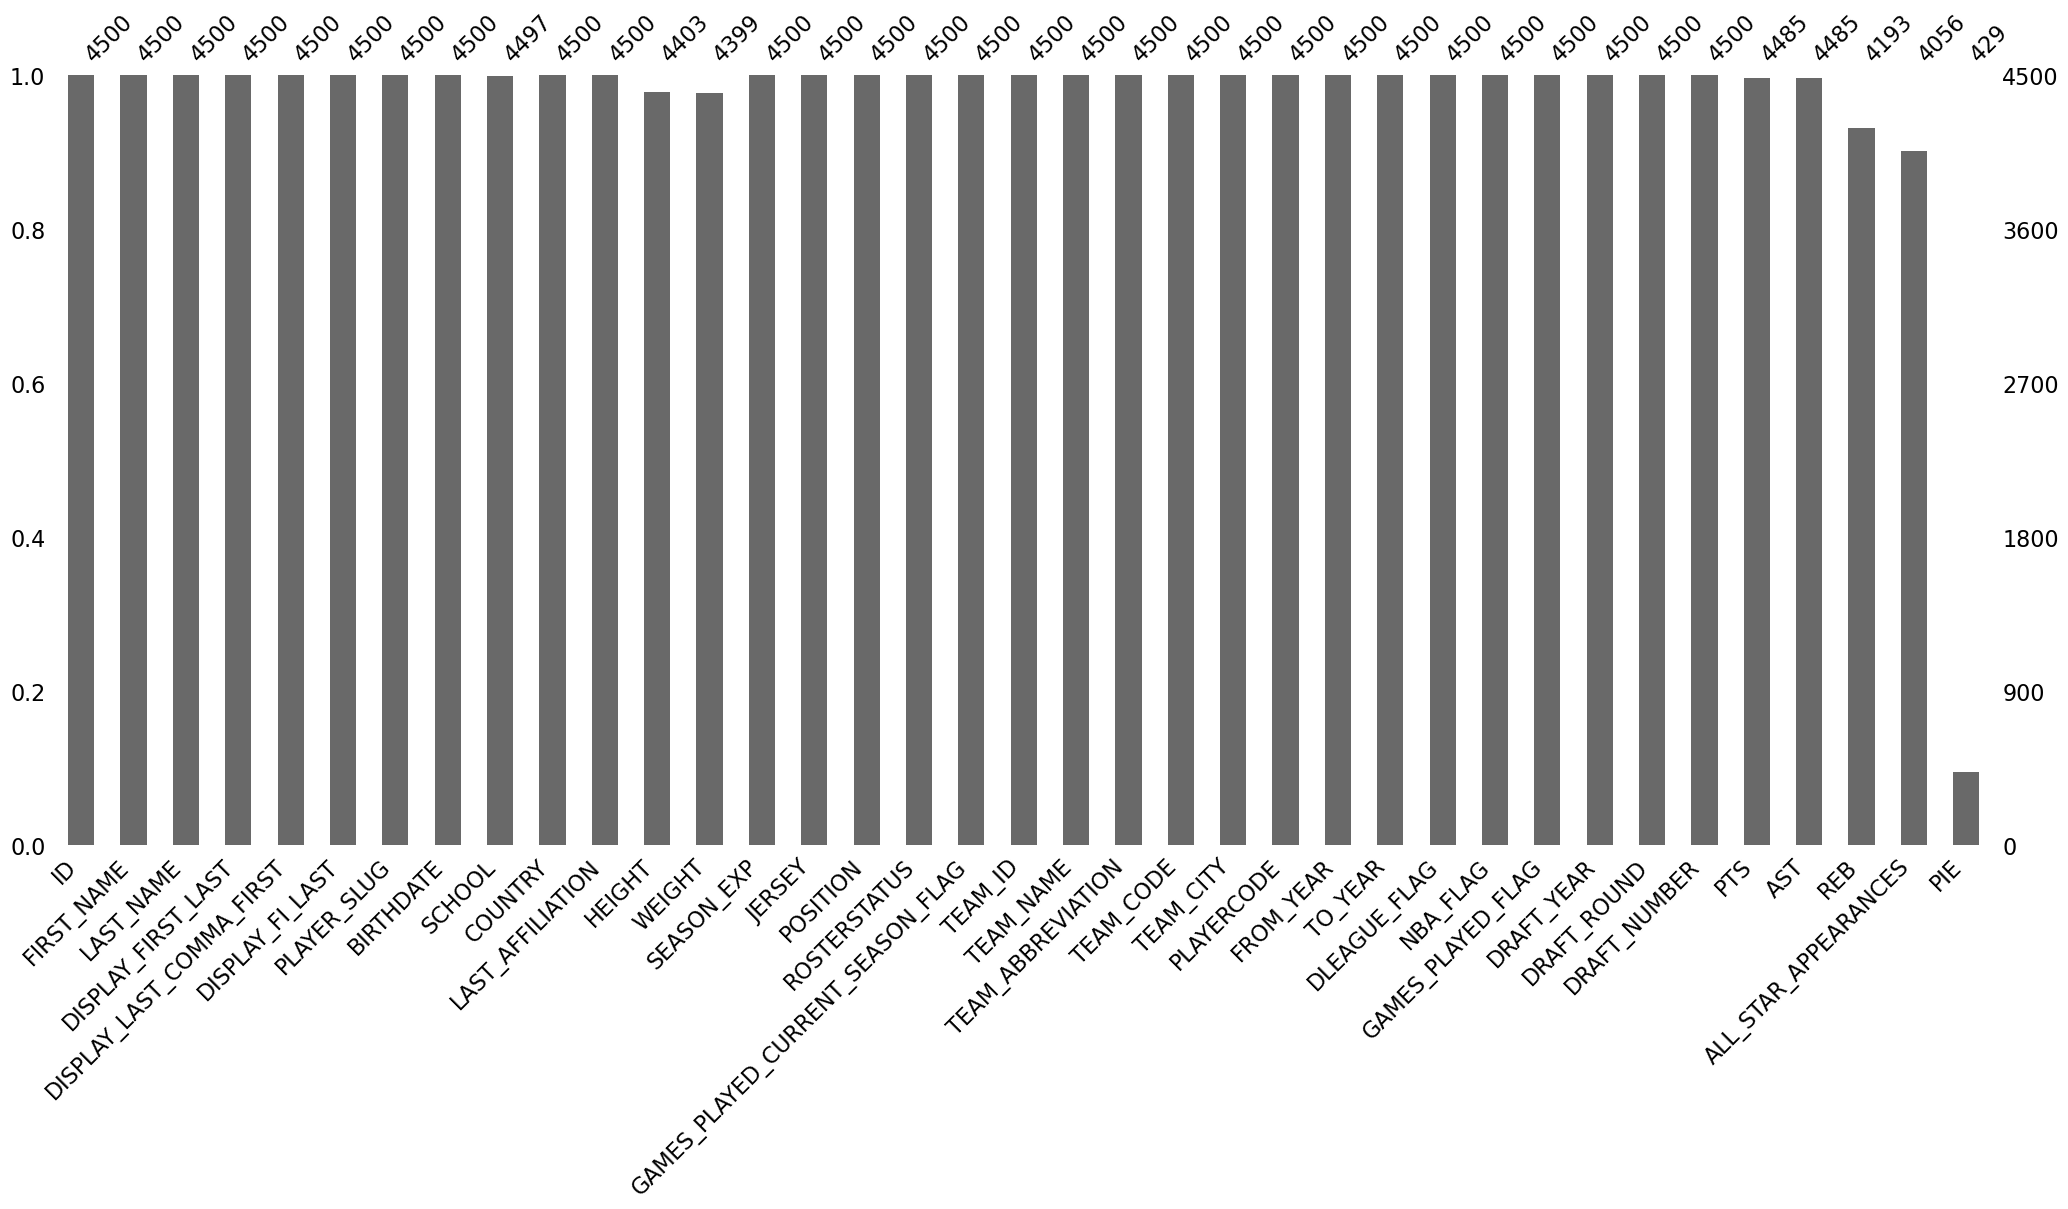

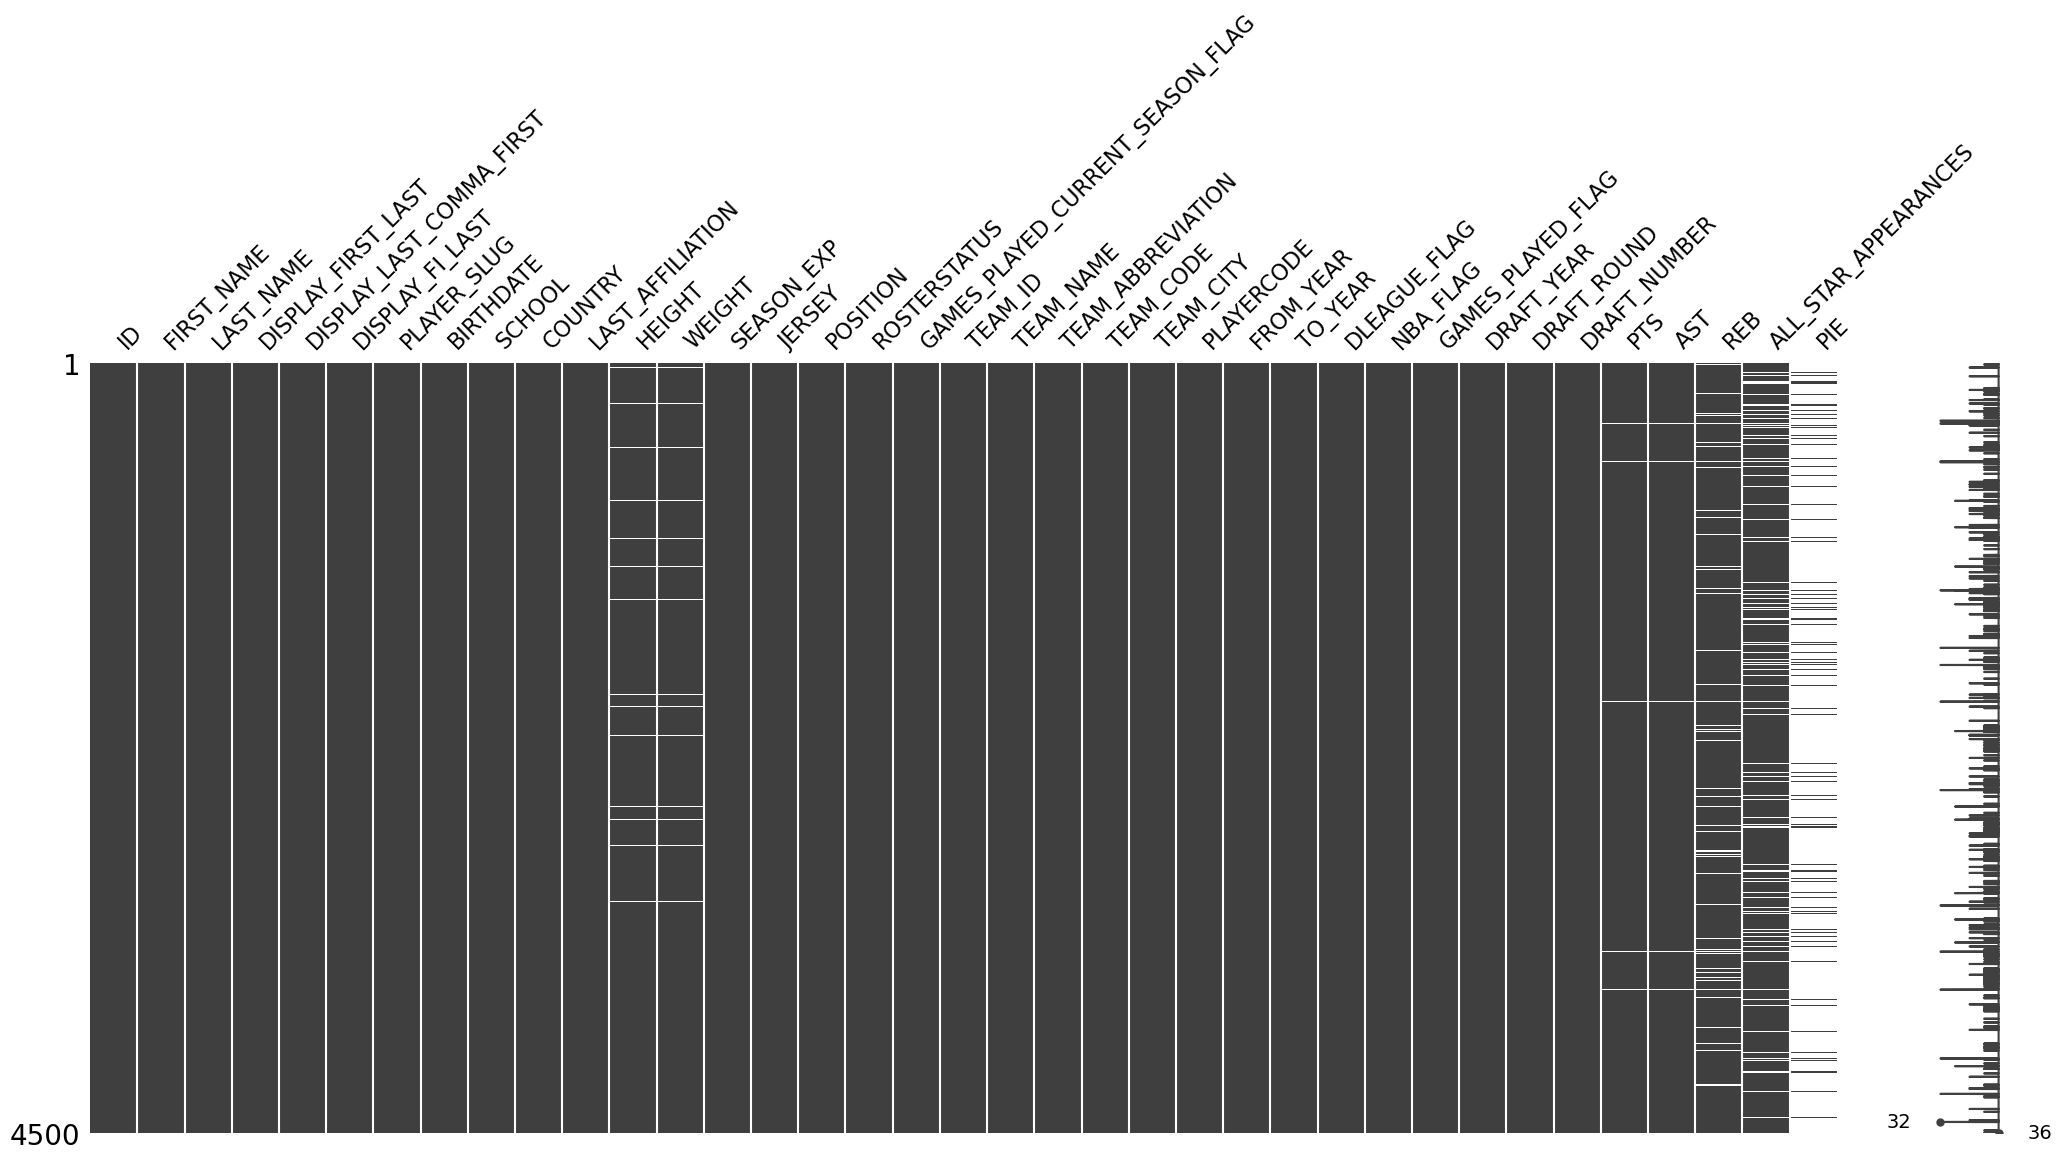

In [70]:
import missingno as msno
msno.bar(table_data["Player_Attributes"])
msno.matrix(table_data["Player_Attributes"])

In [74]:
Player_Attributes[["HEIGHT","WEIGHT","DRAFT_YEAR"]]

HEIGHT  WEIGHT DRAFT_YEAR
0       82.0   240.0       1990
1       81.0   235.0       1968
2       86.0   225.0       1969
3       73.0   162.0       1990
4       78.0   235.0       1997
...      ...     ...        ...
4495    82.0   266.0       2016
4496    85.0   240.0  Undrafted
4497    73.0   170.0       1970
4498    84.0   240.0       2016
4499    75.0   195.0       1947

[4500 rows x 3 columns]

## Moved to other NBA dataset

In [20]:
import sqlite3 as sql
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

def visualize_missing_data_for_all_tables(db_path='nba.sqlite'):
   
    connection = sql.connect(db_path)
    print("SQL database connected")
    
    # Query to get the list of all tables in the database
    tables_query = "SELECT name FROM sqlite_master WHERE type='table'"
    tables_df = pd.read_sql_query(tables_query, connection)
    table_names = tables_df['name'].tolist()
    print(f"Found {len(table_names)} tables: {table_names}")
    
    for table_name in table_names:
        try:
            print(f"\nProcessing table: {table_name}")
            
            query = f"SELECT * FROM {table_name}"
            table_data = pd.read_sql_query(query, connection)
            
            if table_data.empty:
                print(f"Table '{table_name}' is empty, skipping...")
                continue
        
            plt.figure(figsize=(10, 6))  
            msno.bar(table_data)
            plt.title(f'Missing Data Bar Chart for {table_name}')
            plt.savefig(f'missing_data_bar_{table_name}.png', bbox_inches='tight')
            plt.show()
            print(f"Saved Missing Data Bar Chart for {table_name} as 'missing_data_bar_{table_name}.png'")
            
    
            plt.figure(figsize=(10, 6))  
            msno.matrix(table_data)
            plt.title(f'Missing Data Matrix for {table_name}')
            plt.savefig(f'missing_data_matrix_{table_name}.png', bbox_inches='tight')
            plt.show()
            print(f"Saved Missing Data Matrix for {table_name} as 'missing_data_matrix_{table_name}.png'")
        
        except Exception as e:
            print(f"An error occurred while processing table '{table_name}': {e}")
    
    connection.close()
    print("SQL database connection closed")



SQL database connected
Found 16 tables: ['game', 'game_summary', 'other_stats', 'officials', 'inactive_players', 'game_info', 'line_score', 'play_by_play', 'player', 'team', 'common_player_info', 'team_details', 'team_history', 'draft_combine_stats', 'draft_history', 'team_info_common']

Processing table: game


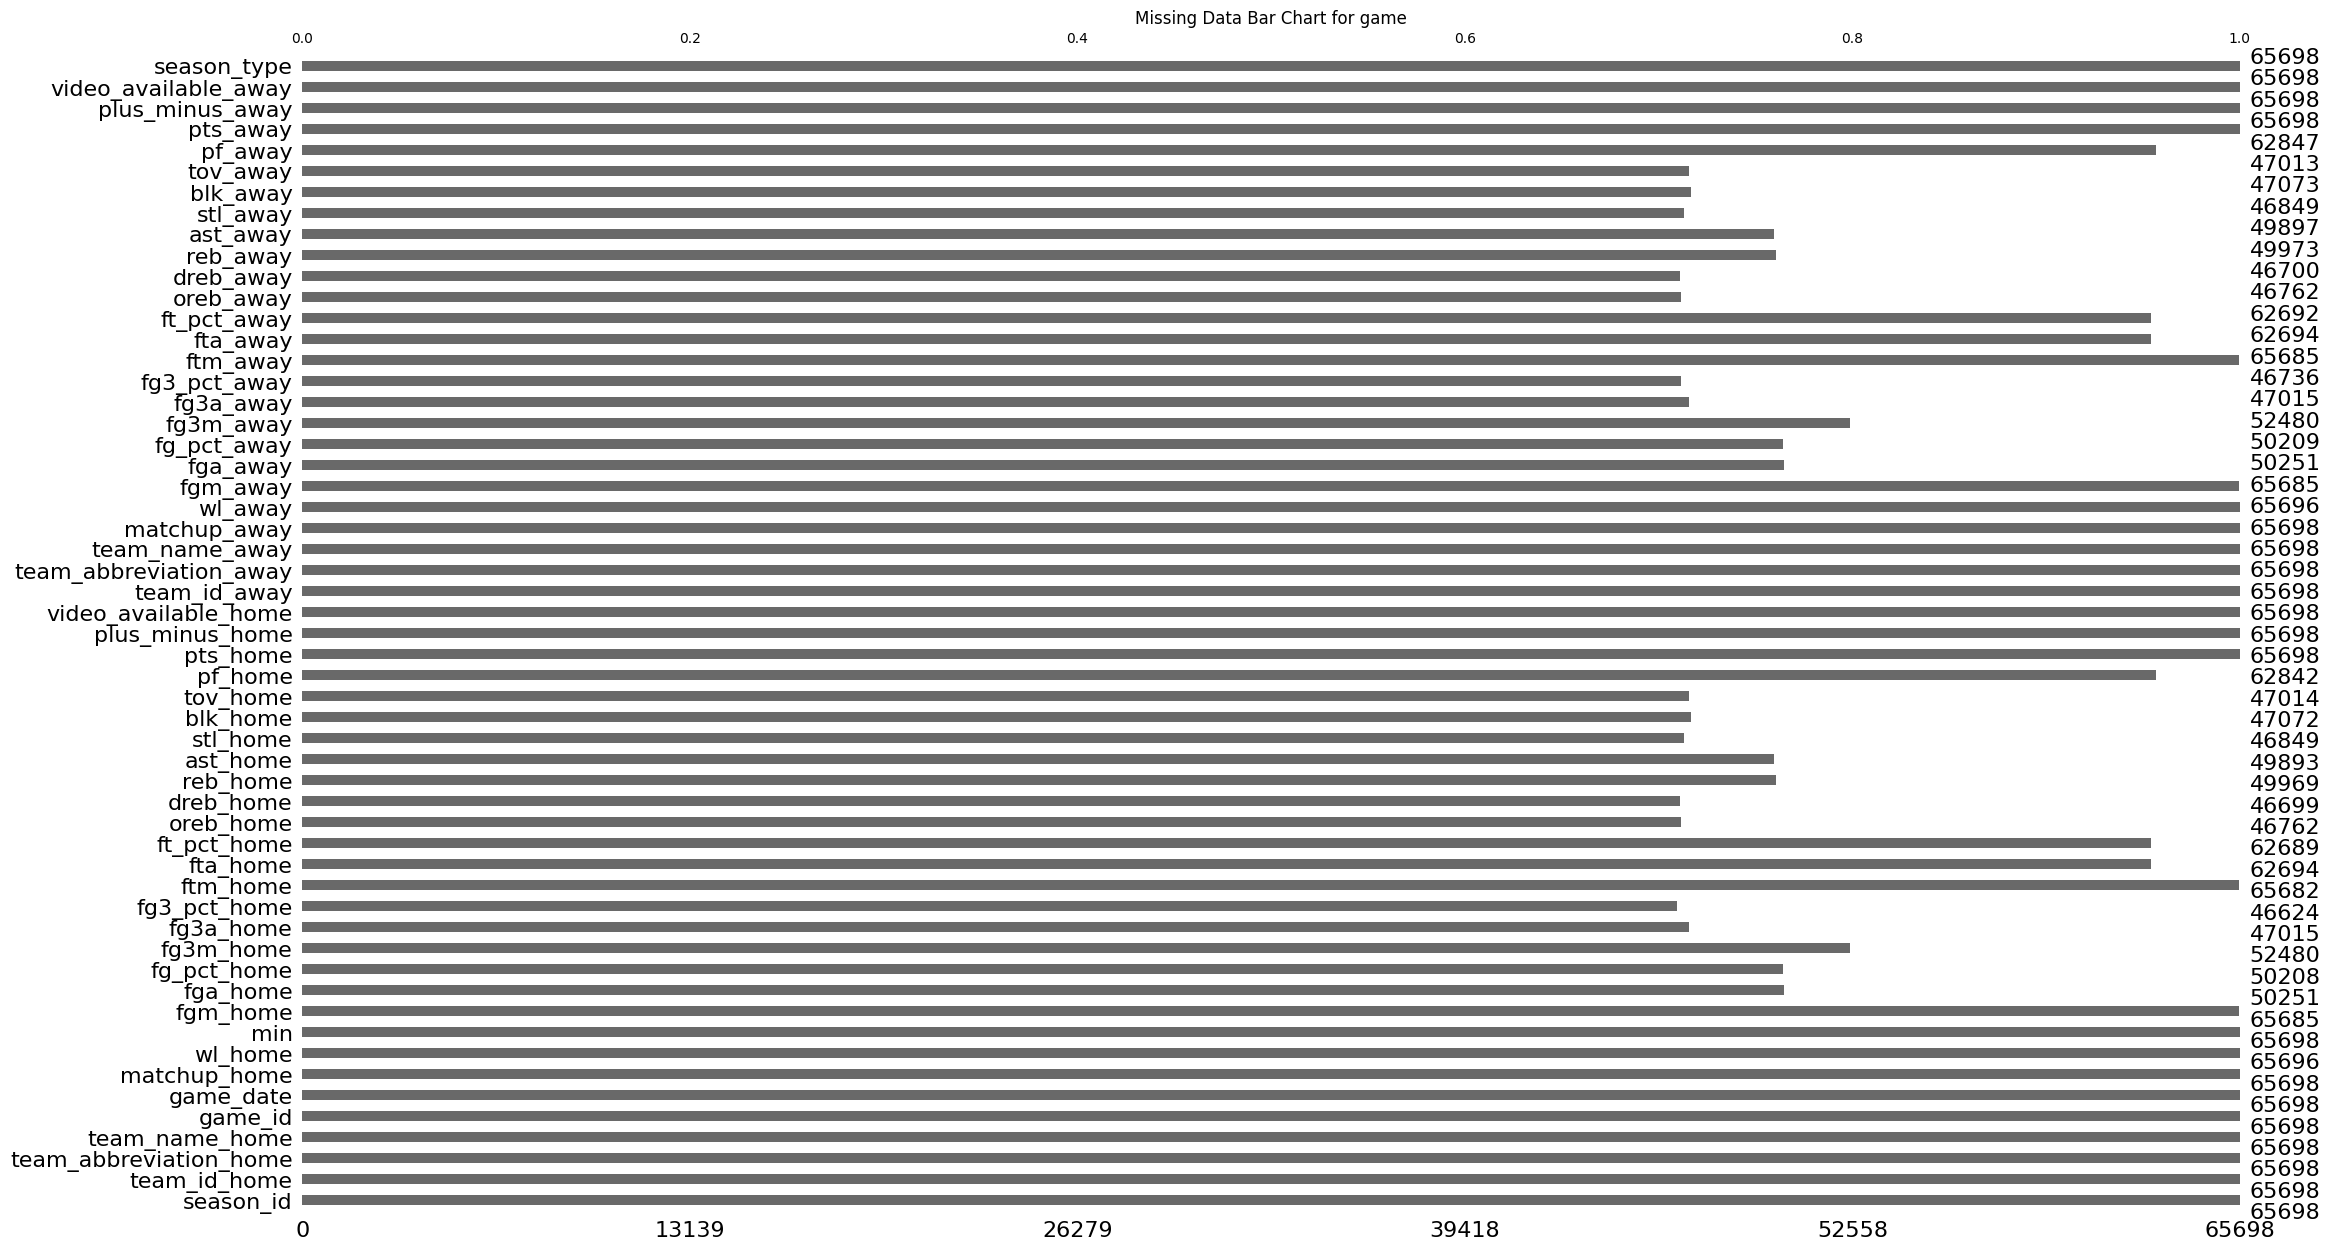

Saved Missing Data Bar Chart for game as 'missing_data_bar_game.png'


<Figure size 1000x600 with 0 Axes>

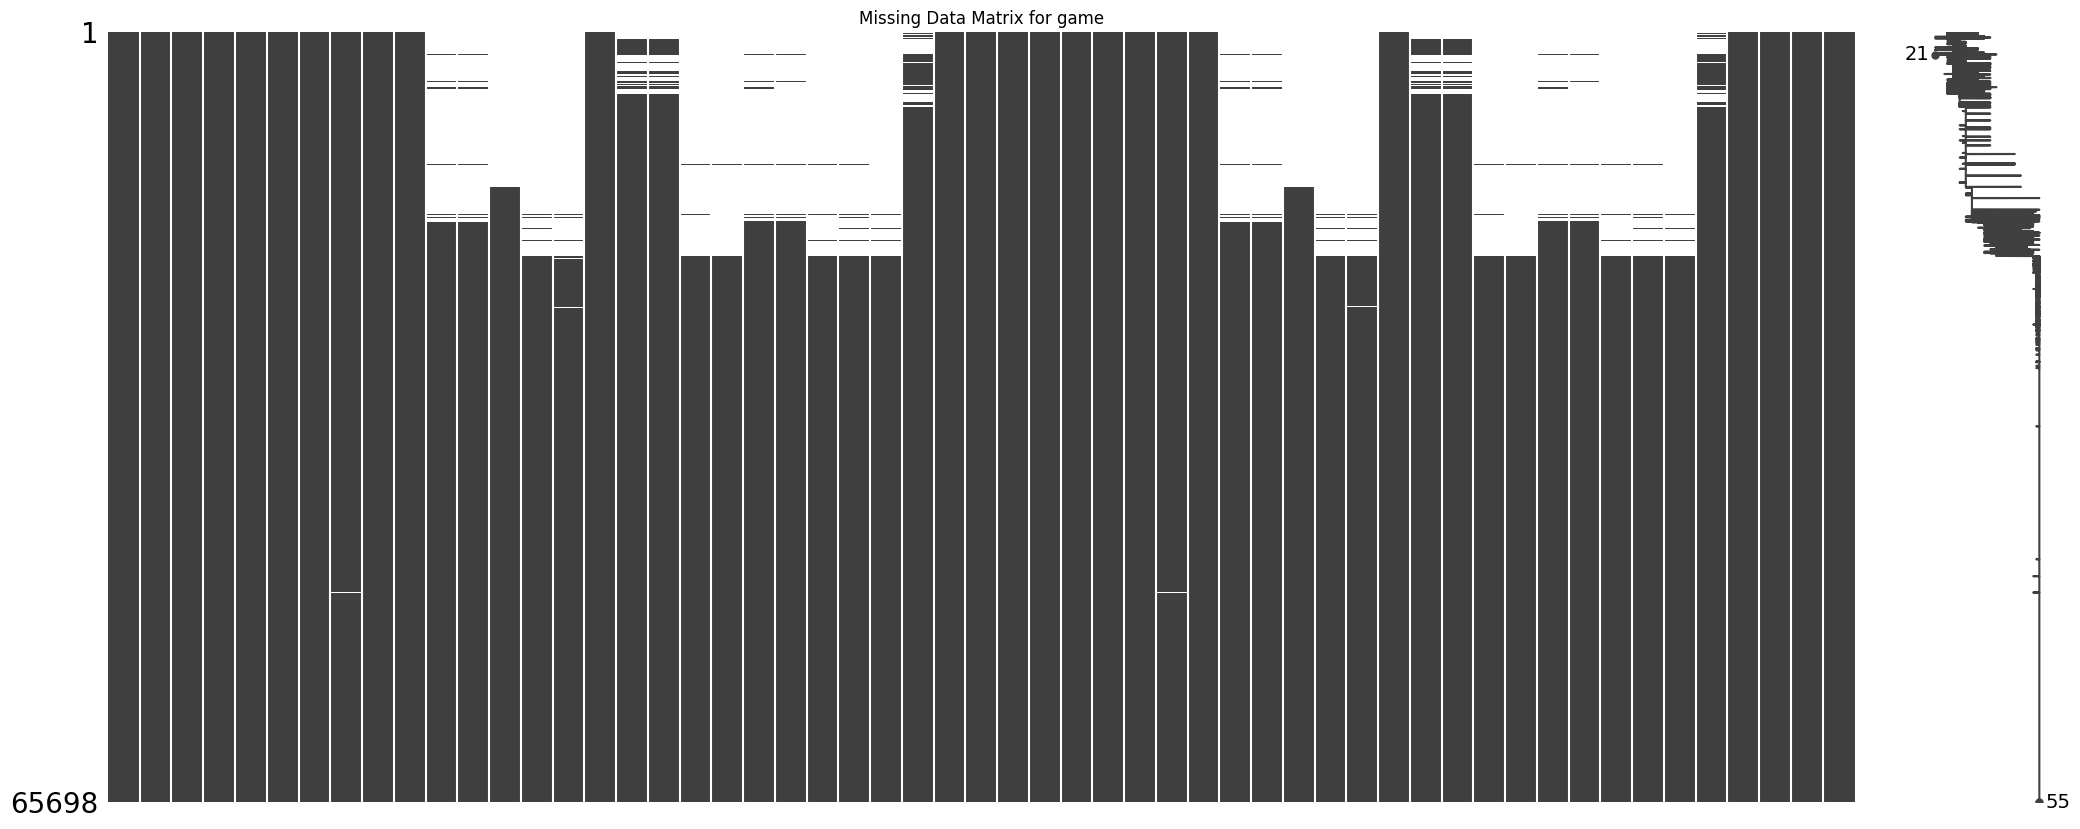

Saved Missing Data Matrix for game as 'missing_data_matrix_game.png'

Processing table: game_summary


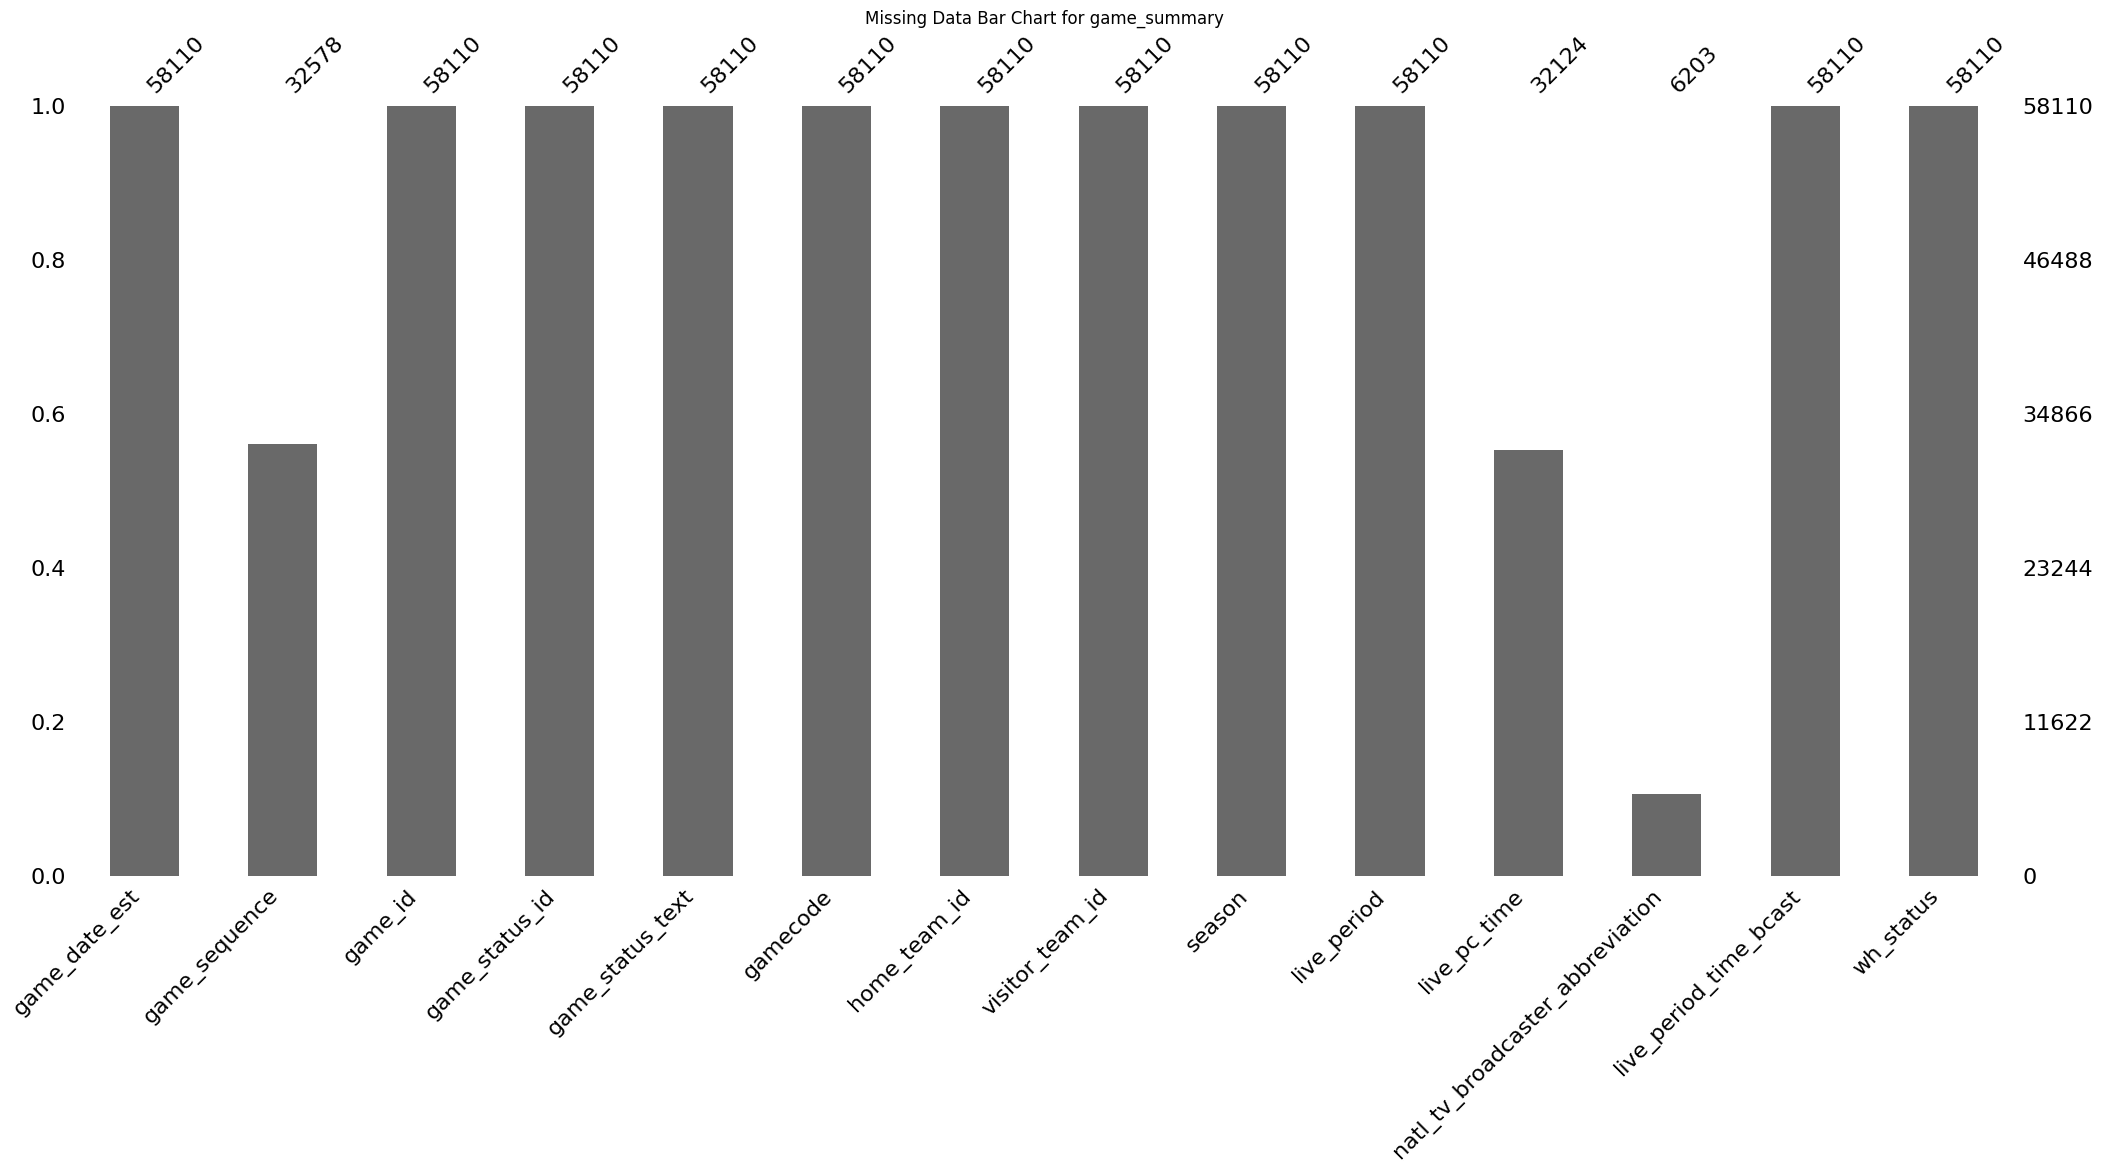

Saved Missing Data Bar Chart for game_summary as 'missing_data_bar_game_summary.png'


<Figure size 1000x600 with 0 Axes>

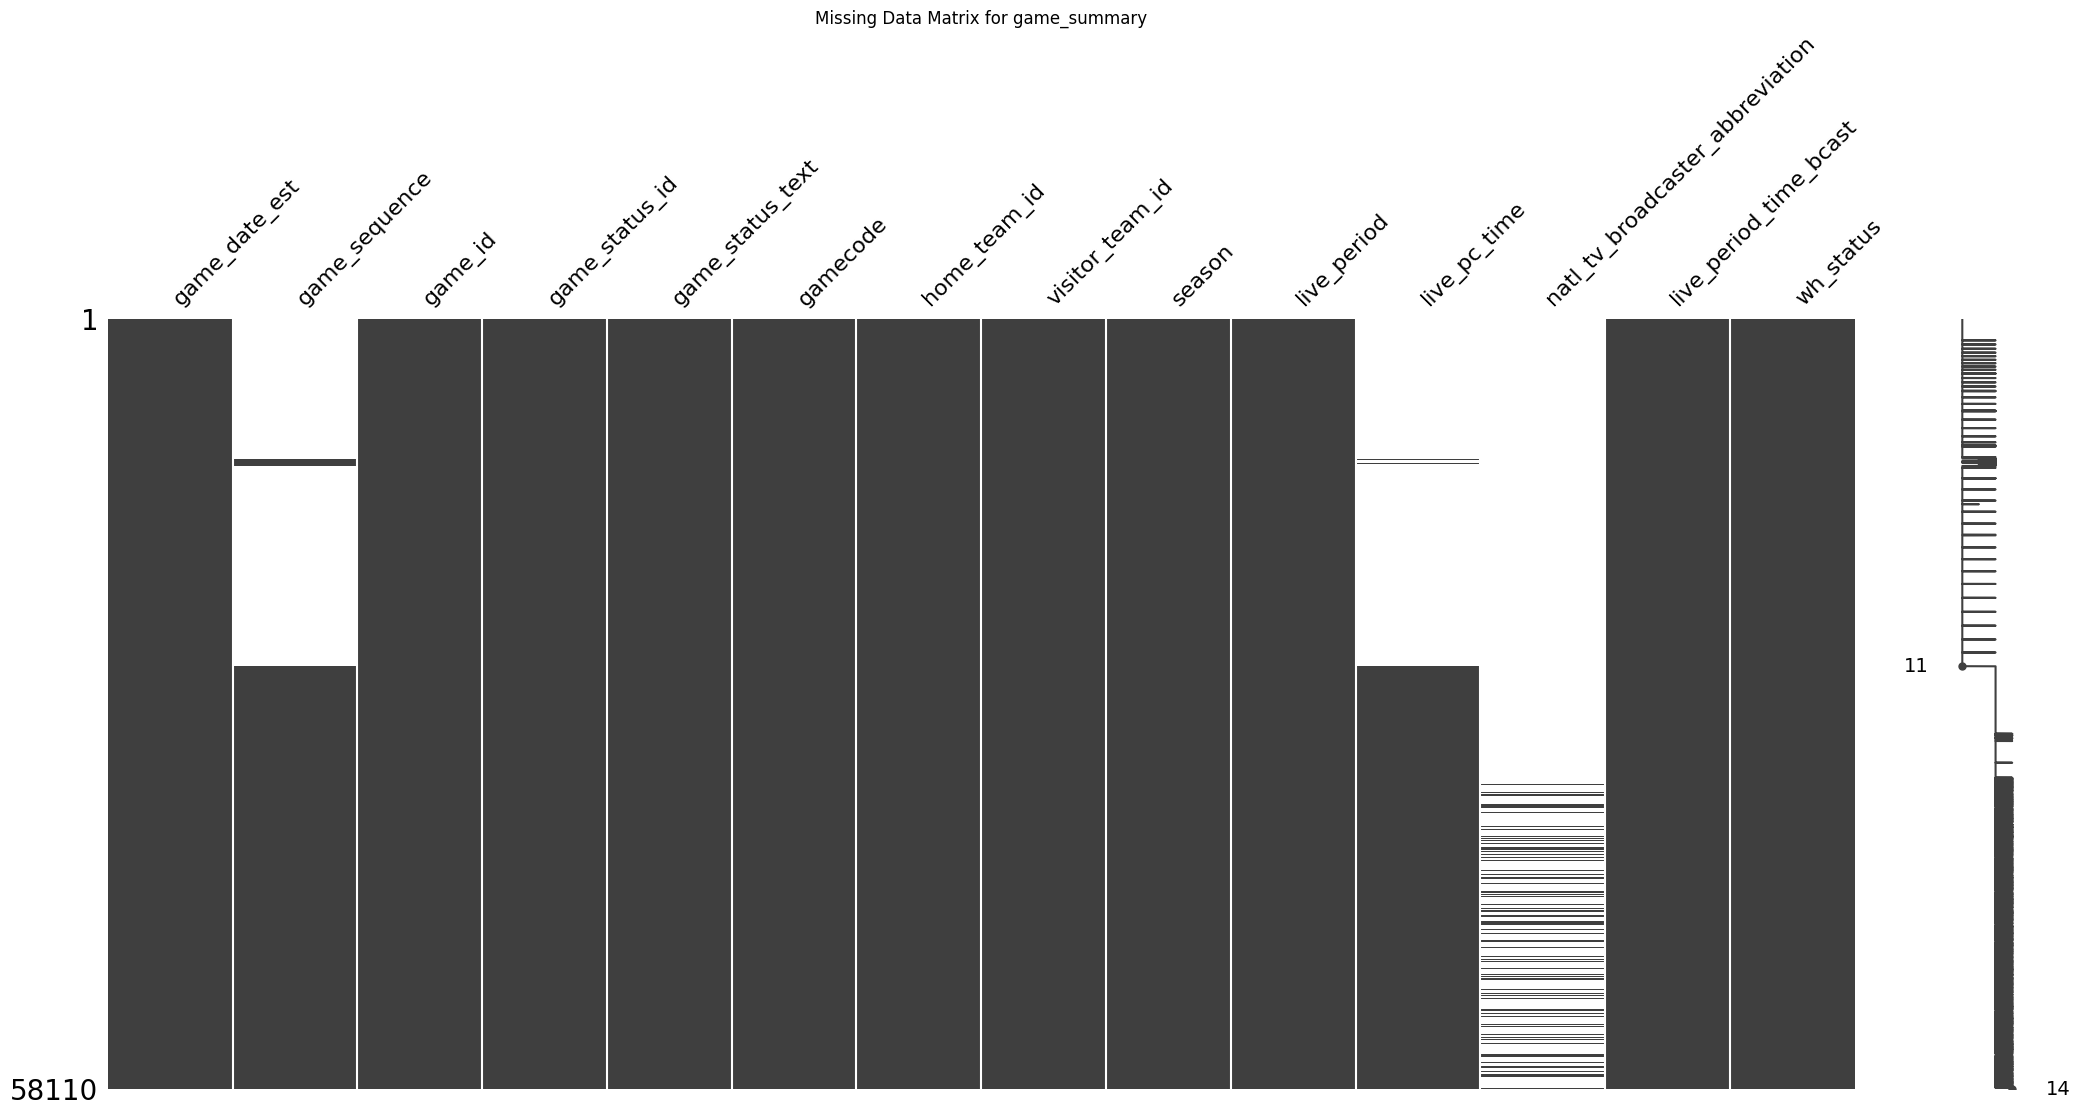

Saved Missing Data Matrix for game_summary as 'missing_data_matrix_game_summary.png'

Processing table: other_stats


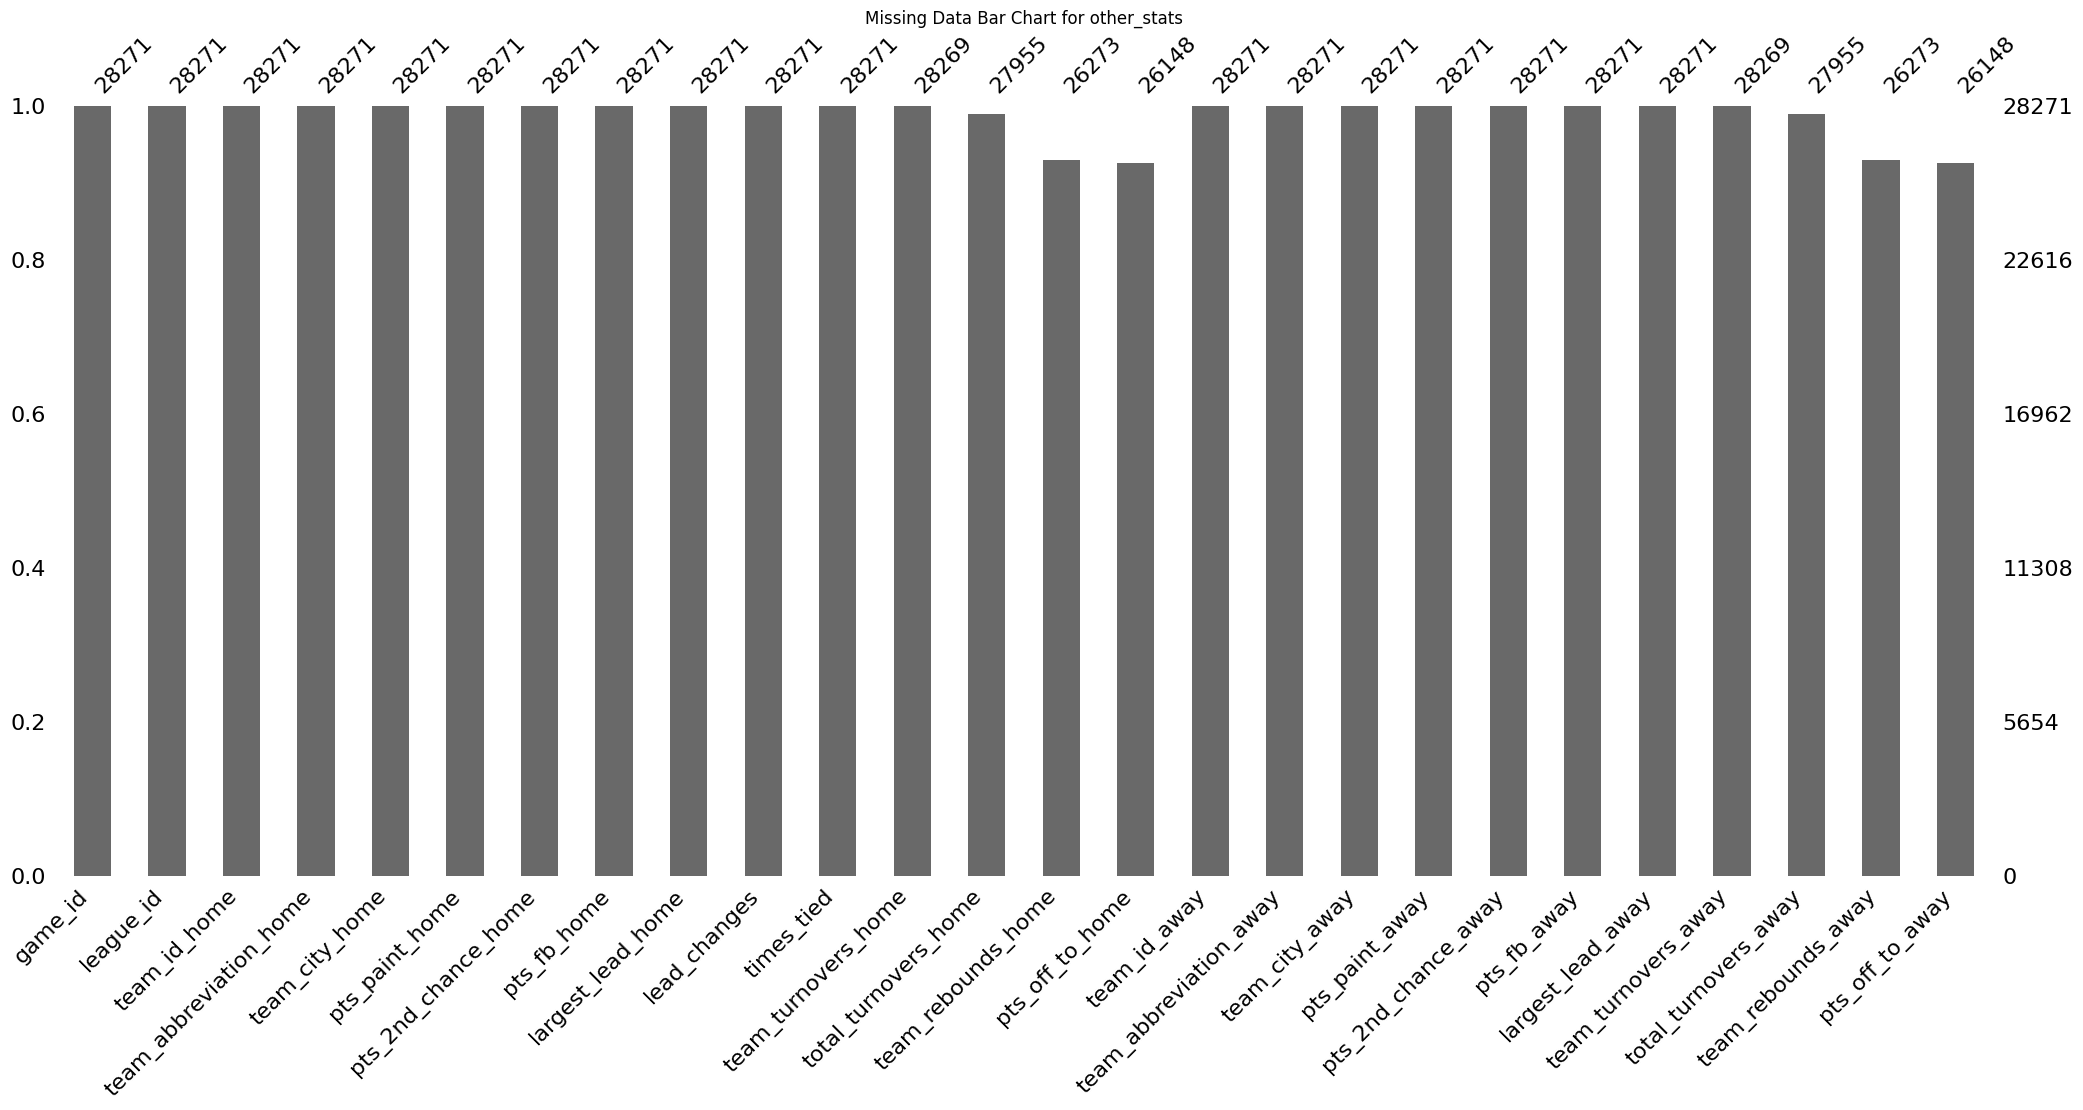

Saved Missing Data Bar Chart for other_stats as 'missing_data_bar_other_stats.png'


<Figure size 1000x600 with 0 Axes>

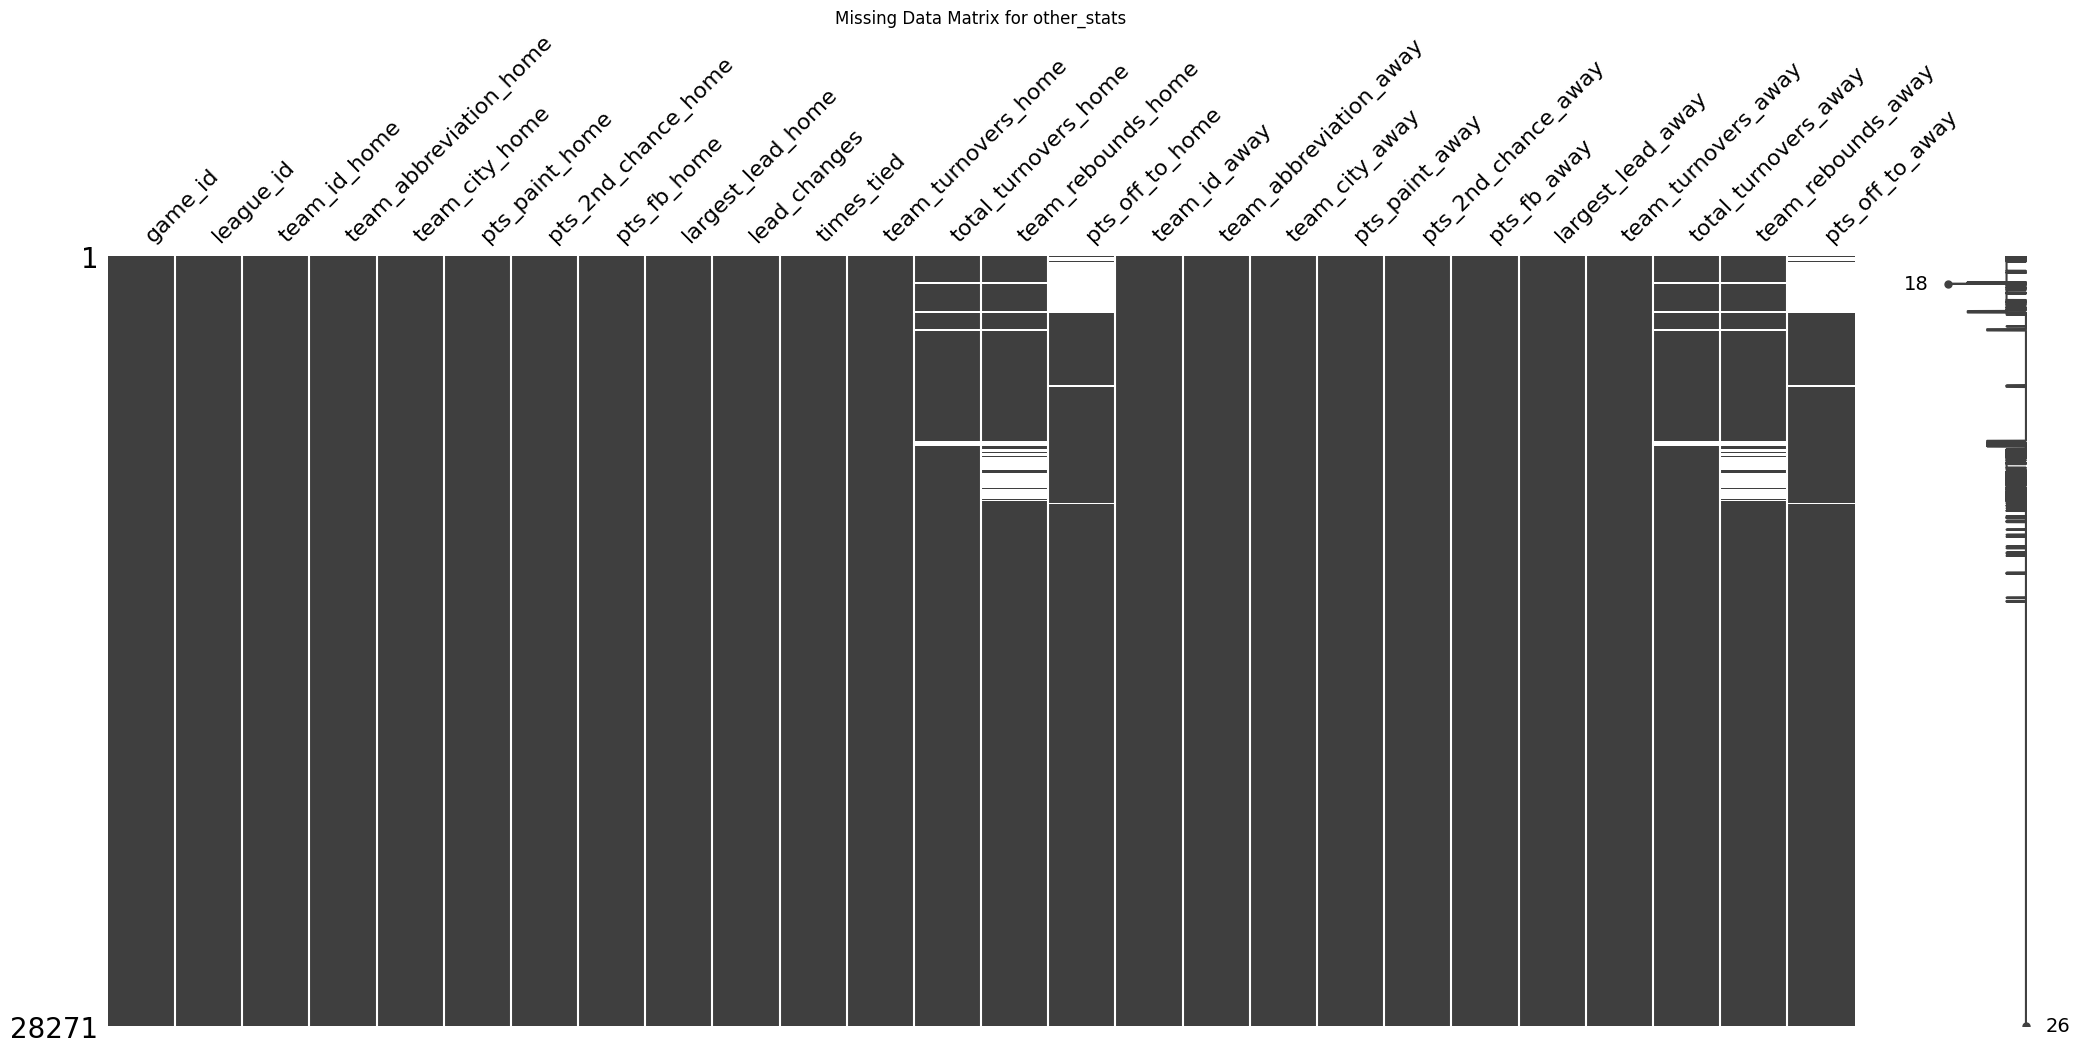

Saved Missing Data Matrix for other_stats as 'missing_data_matrix_other_stats.png'

Processing table: officials


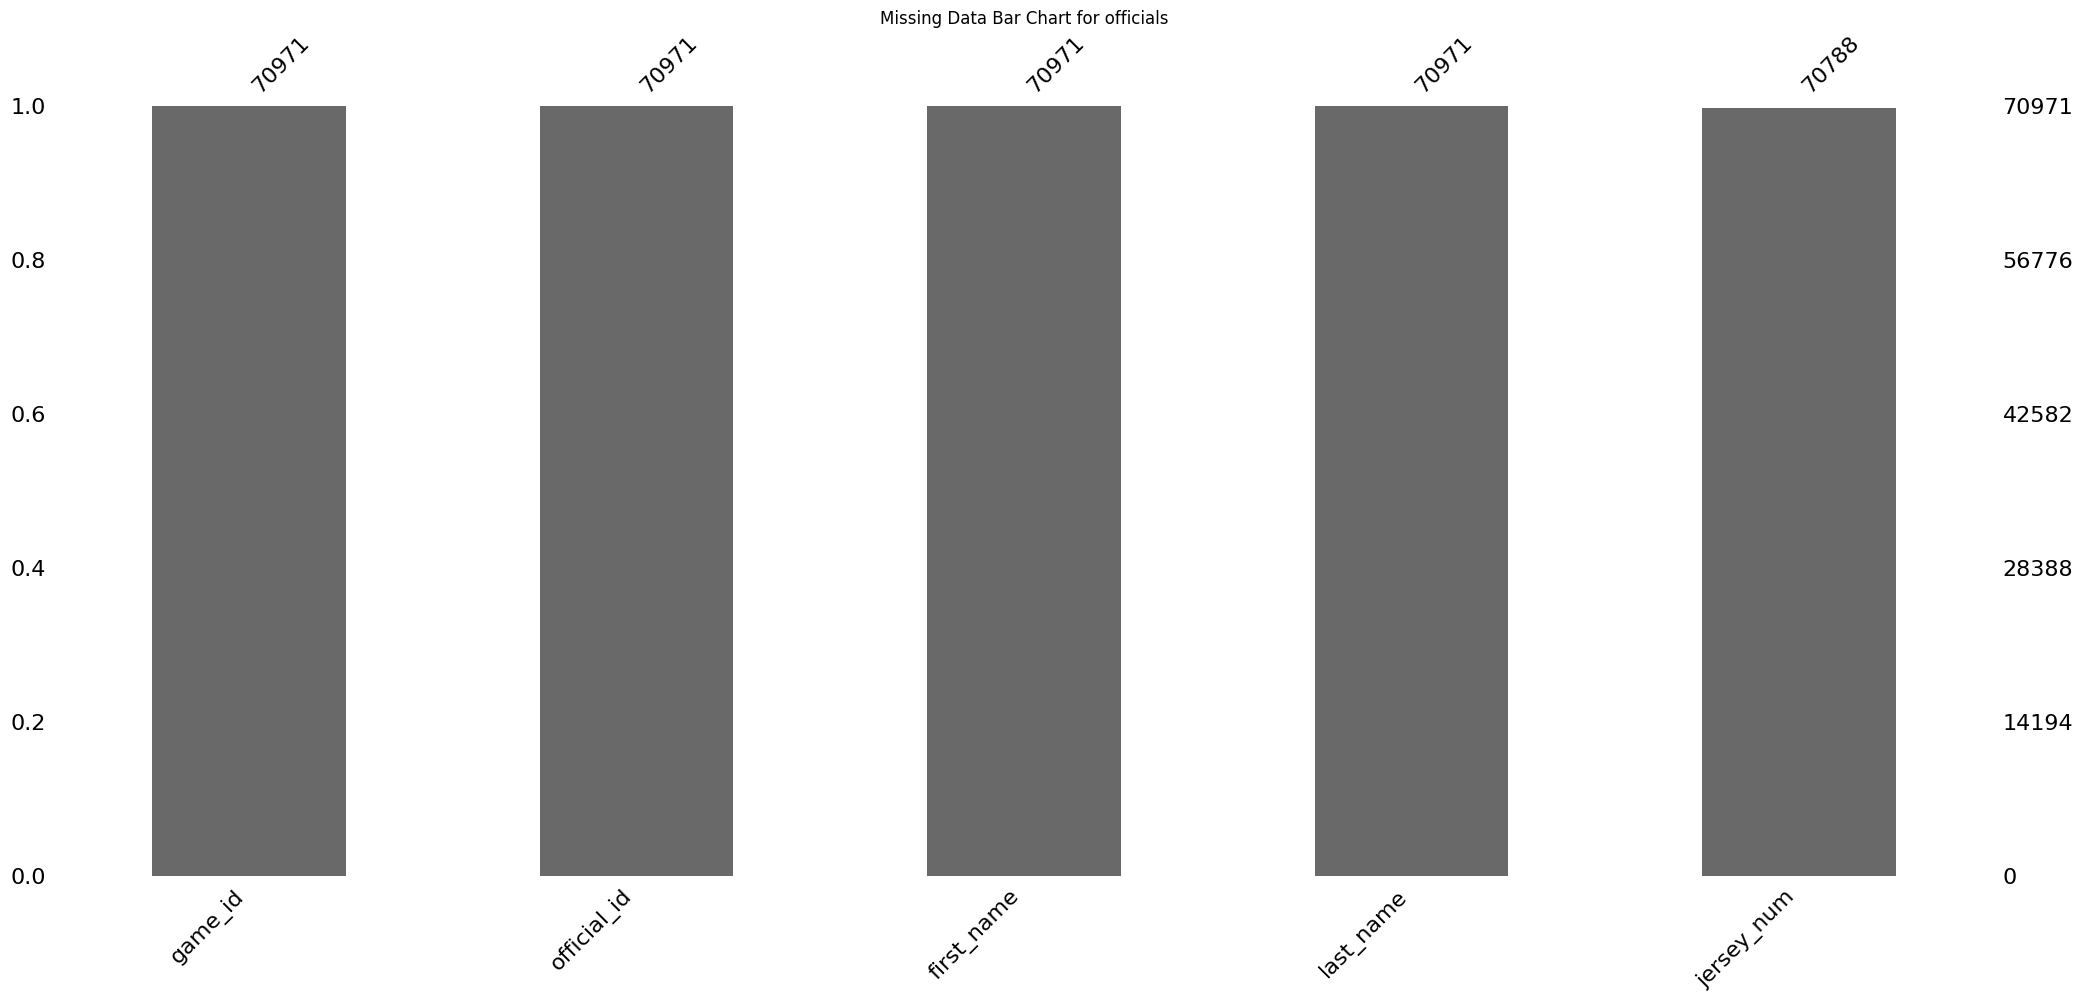

Saved Missing Data Bar Chart for officials as 'missing_data_bar_officials.png'


<Figure size 1000x600 with 0 Axes>

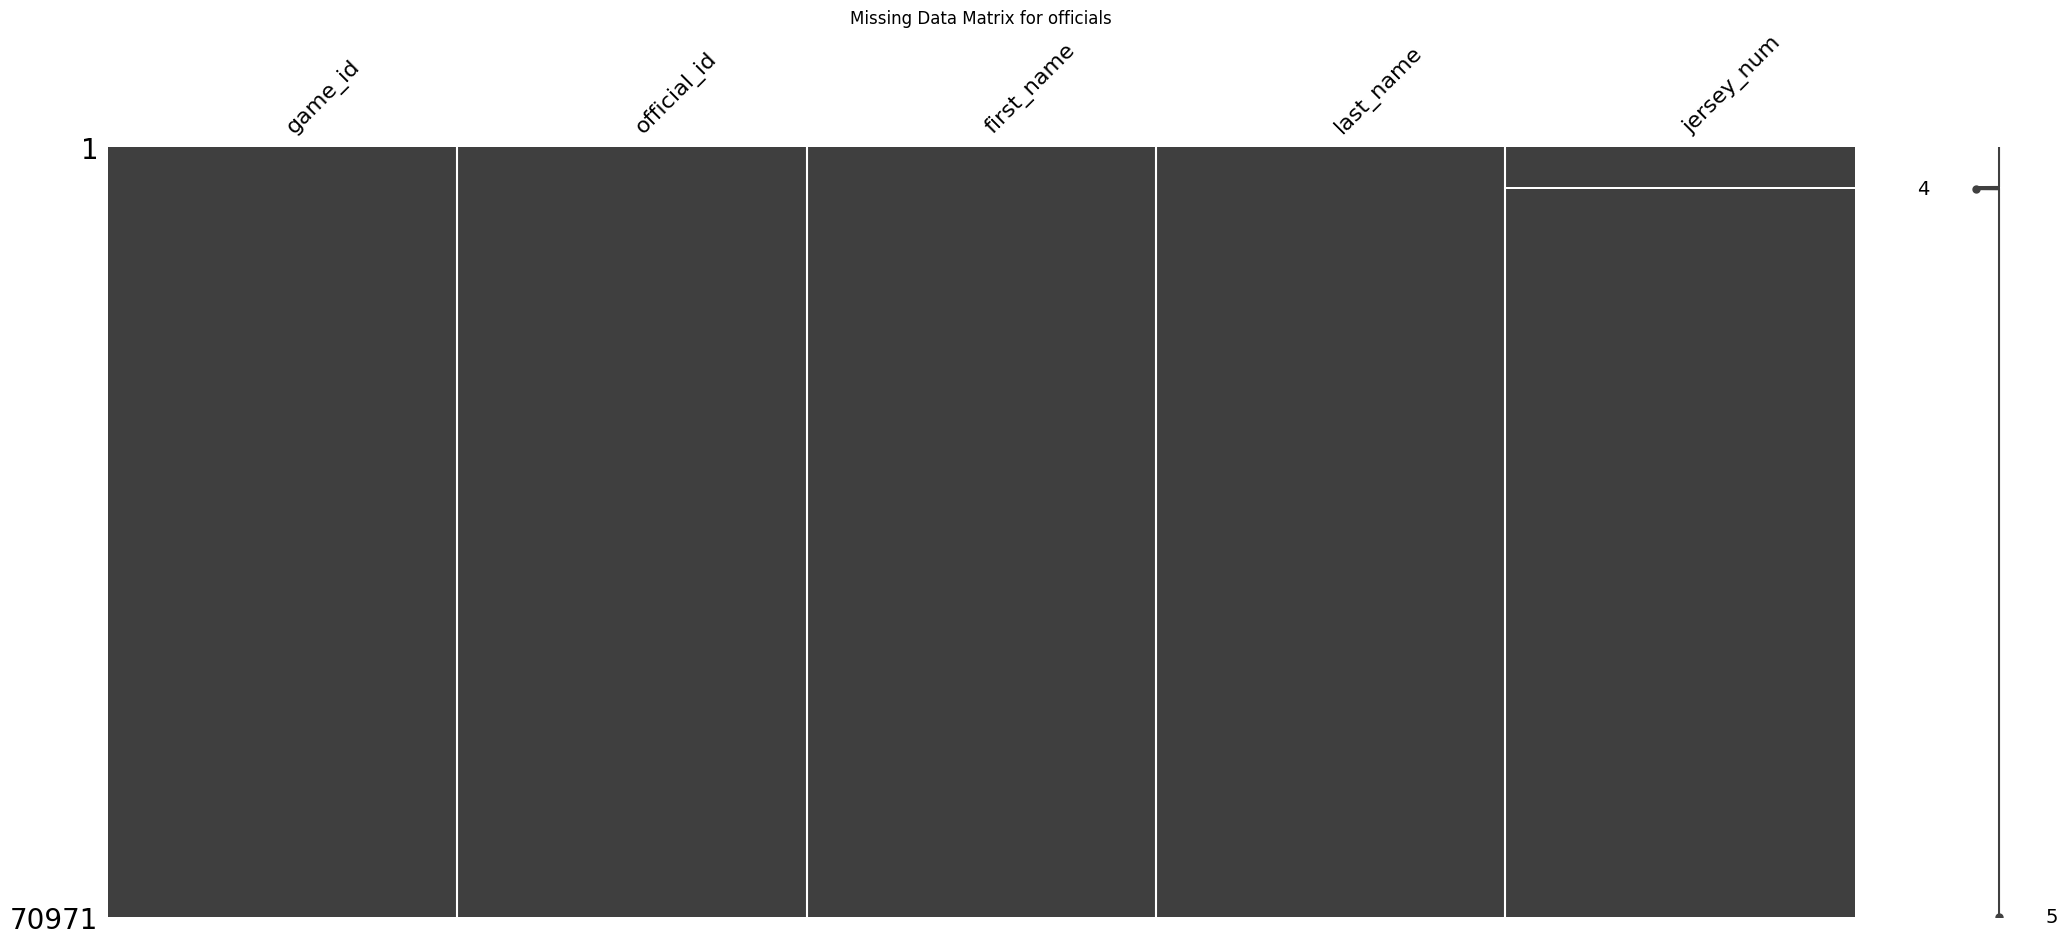

Saved Missing Data Matrix for officials as 'missing_data_matrix_officials.png'

Processing table: inactive_players


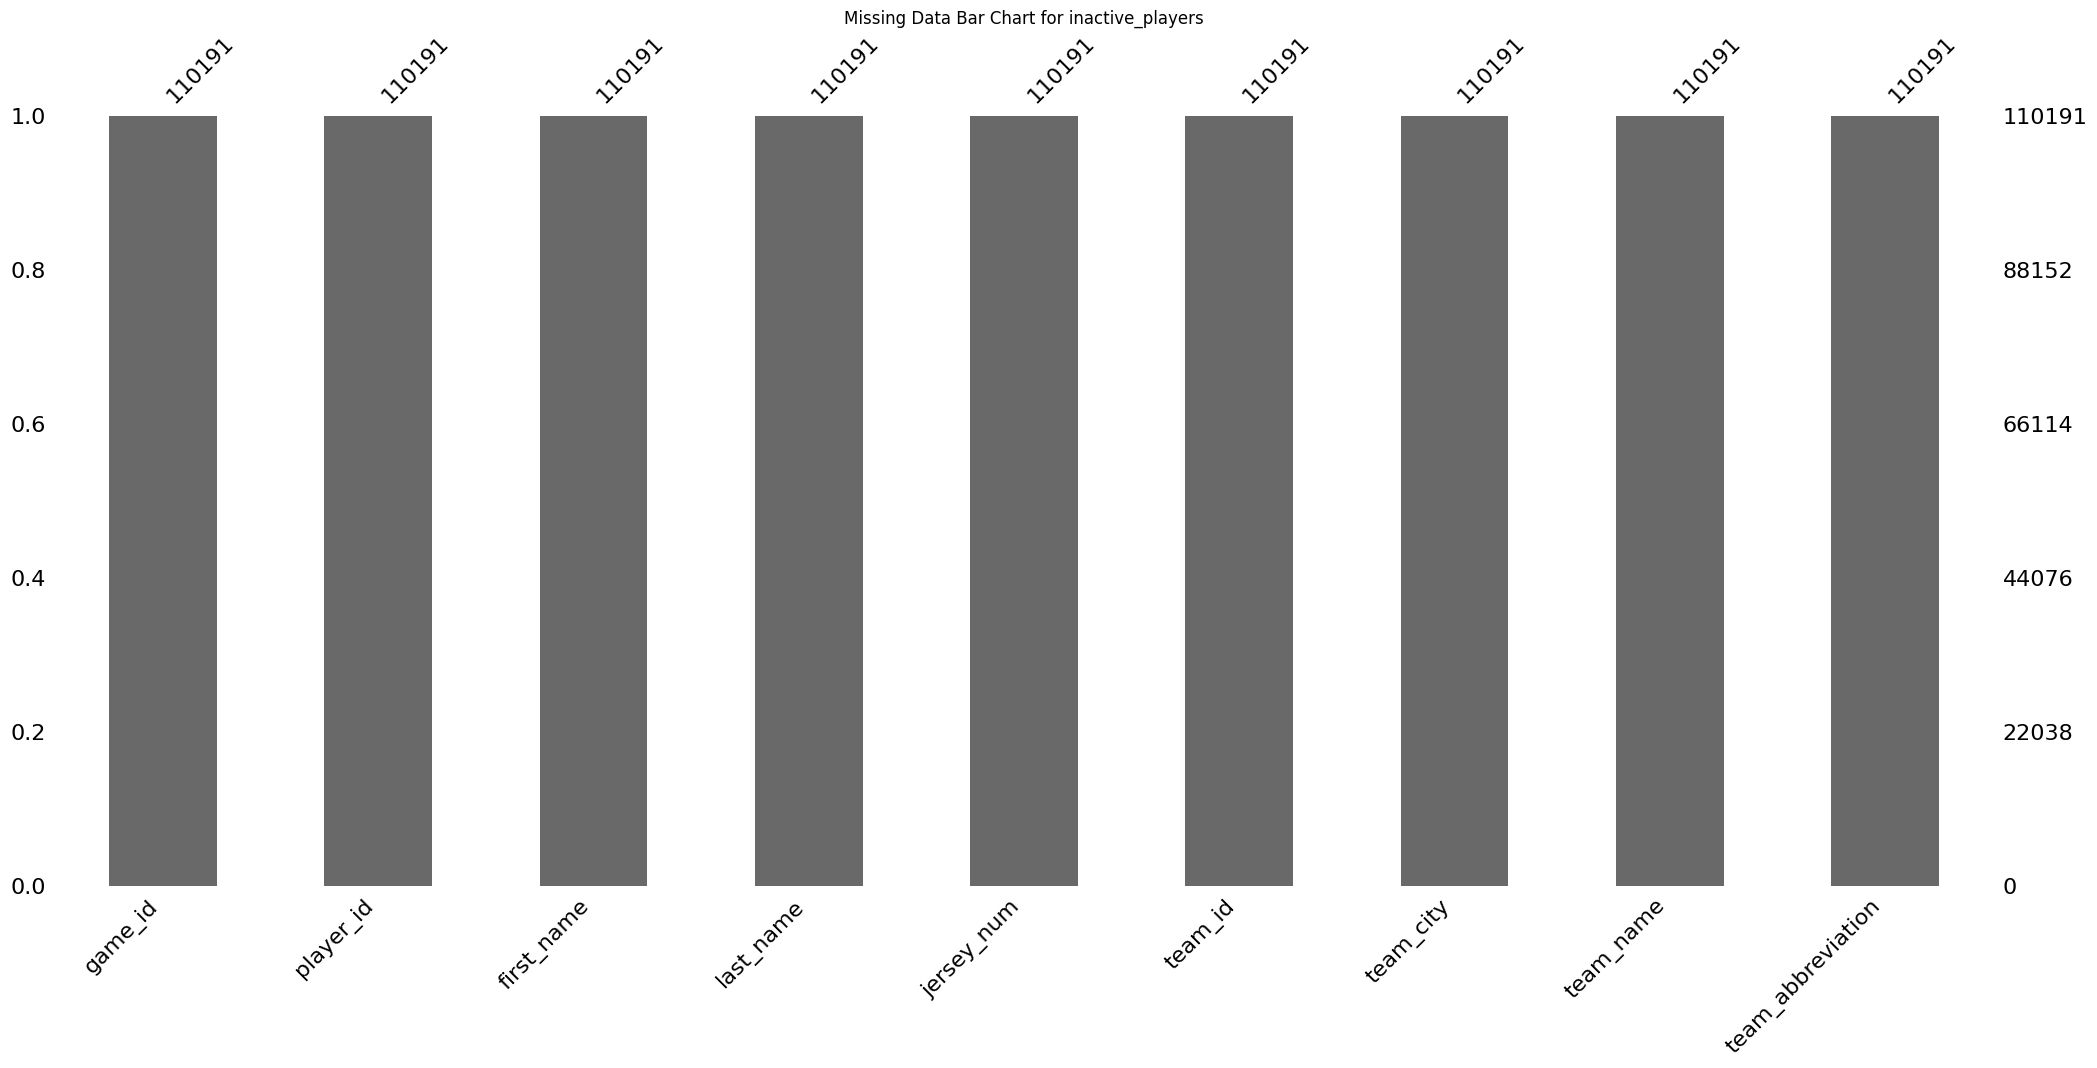

Saved Missing Data Bar Chart for inactive_players as 'missing_data_bar_inactive_players.png'


<Figure size 1000x600 with 0 Axes>

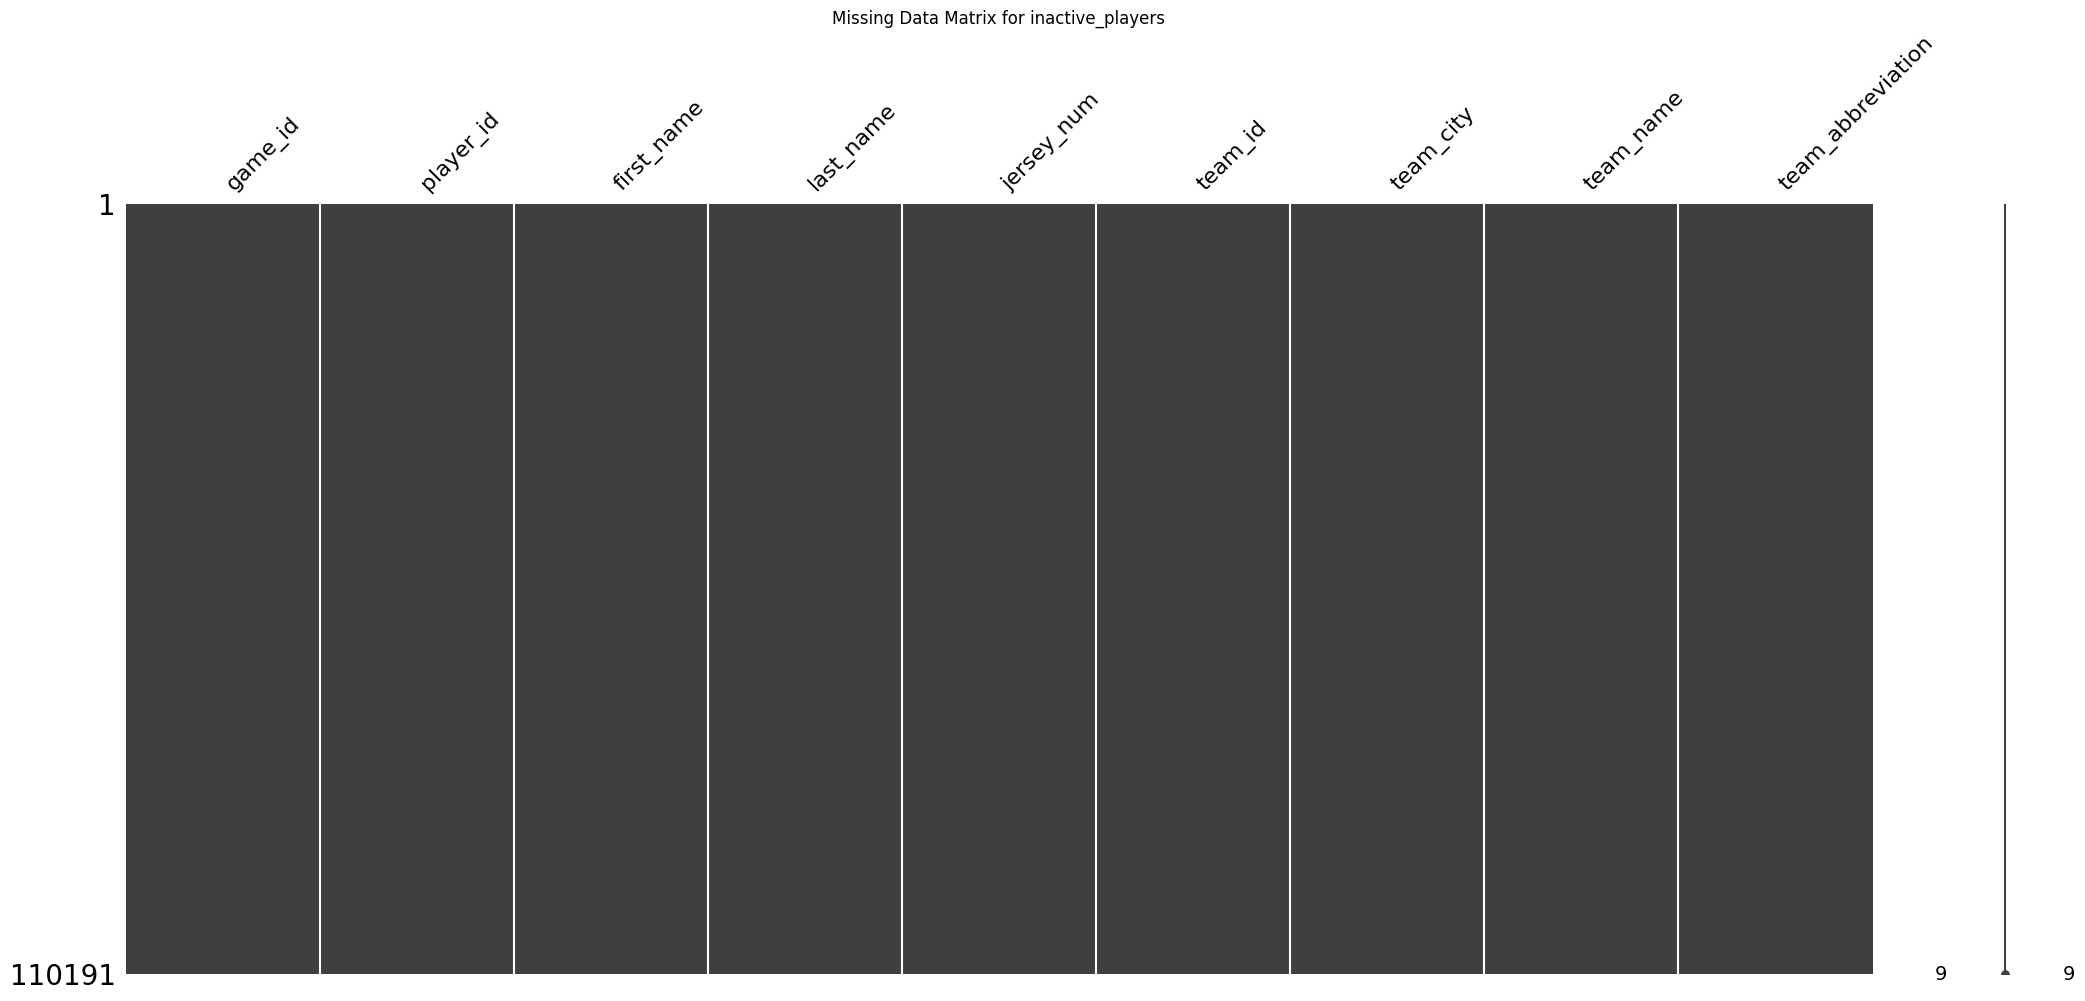

Saved Missing Data Matrix for inactive_players as 'missing_data_matrix_inactive_players.png'

Processing table: game_info


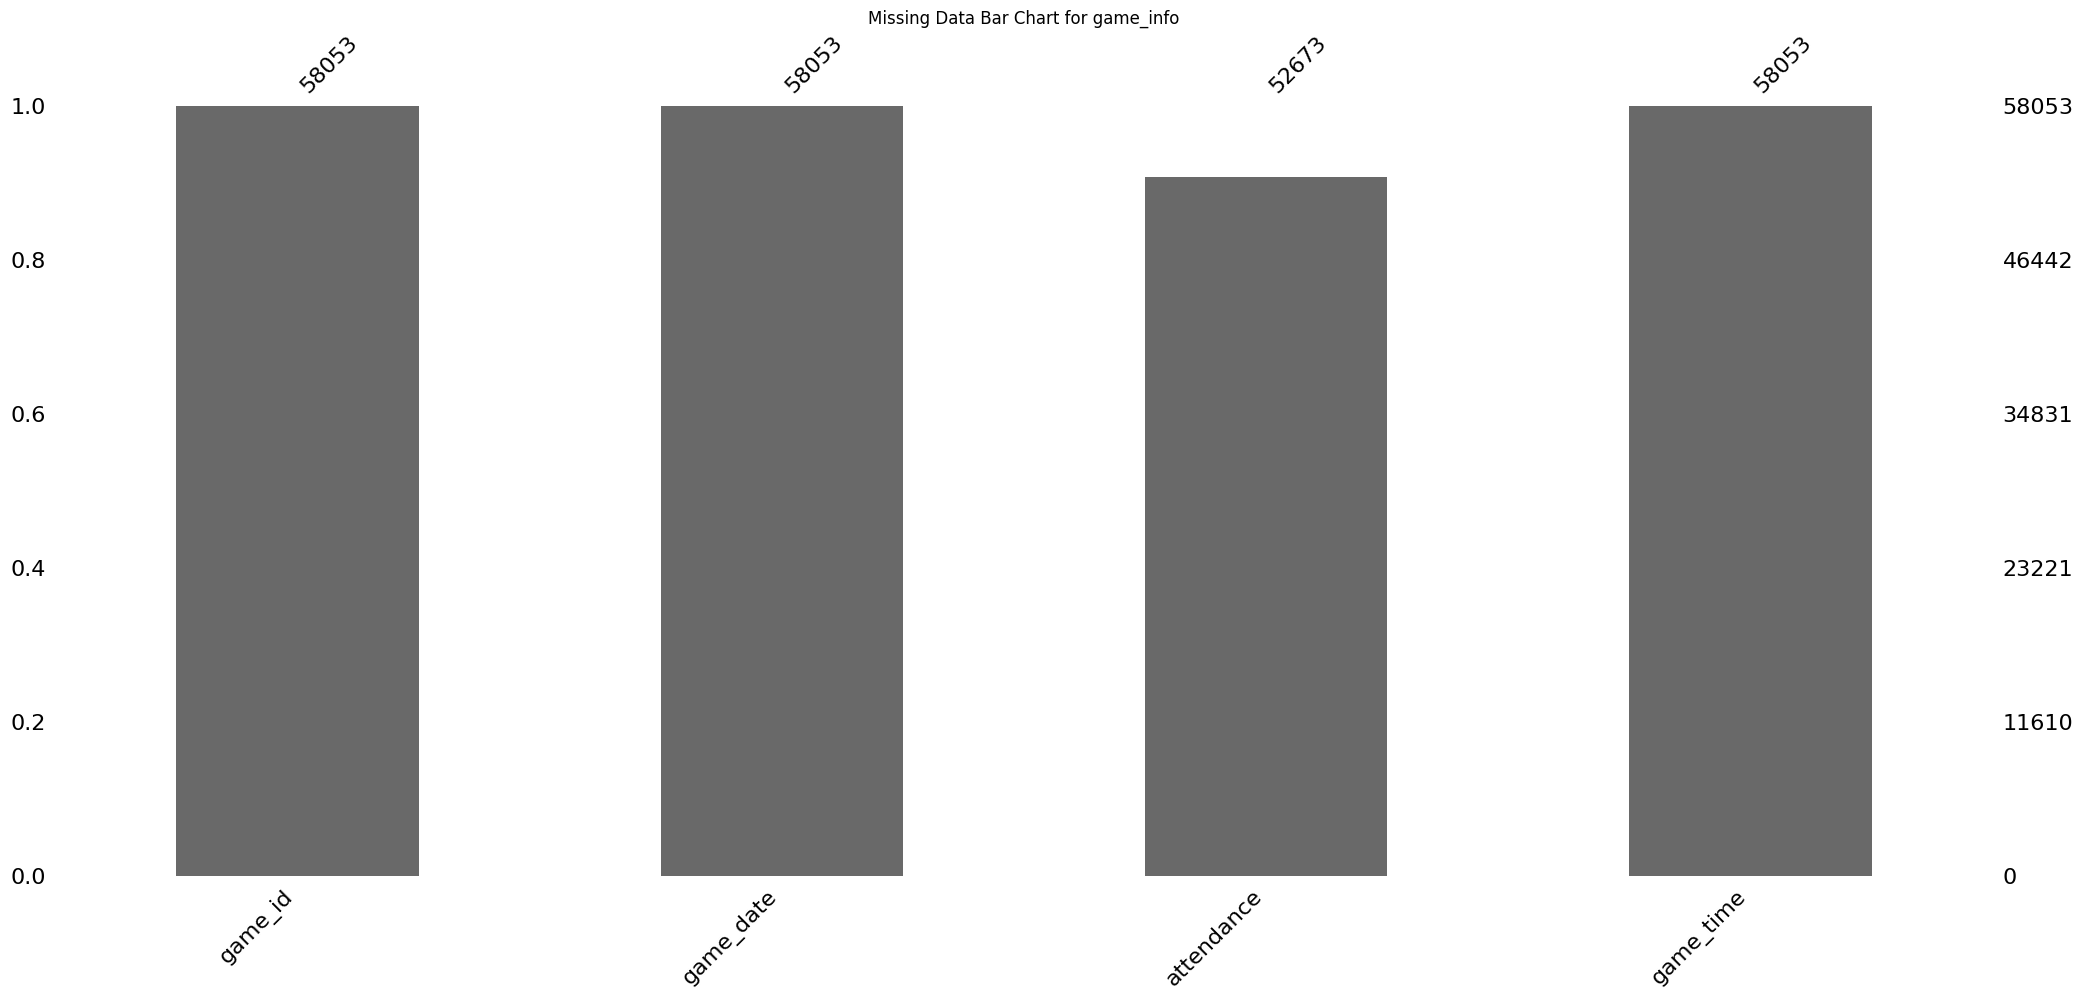

Saved Missing Data Bar Chart for game_info as 'missing_data_bar_game_info.png'


<Figure size 1000x600 with 0 Axes>

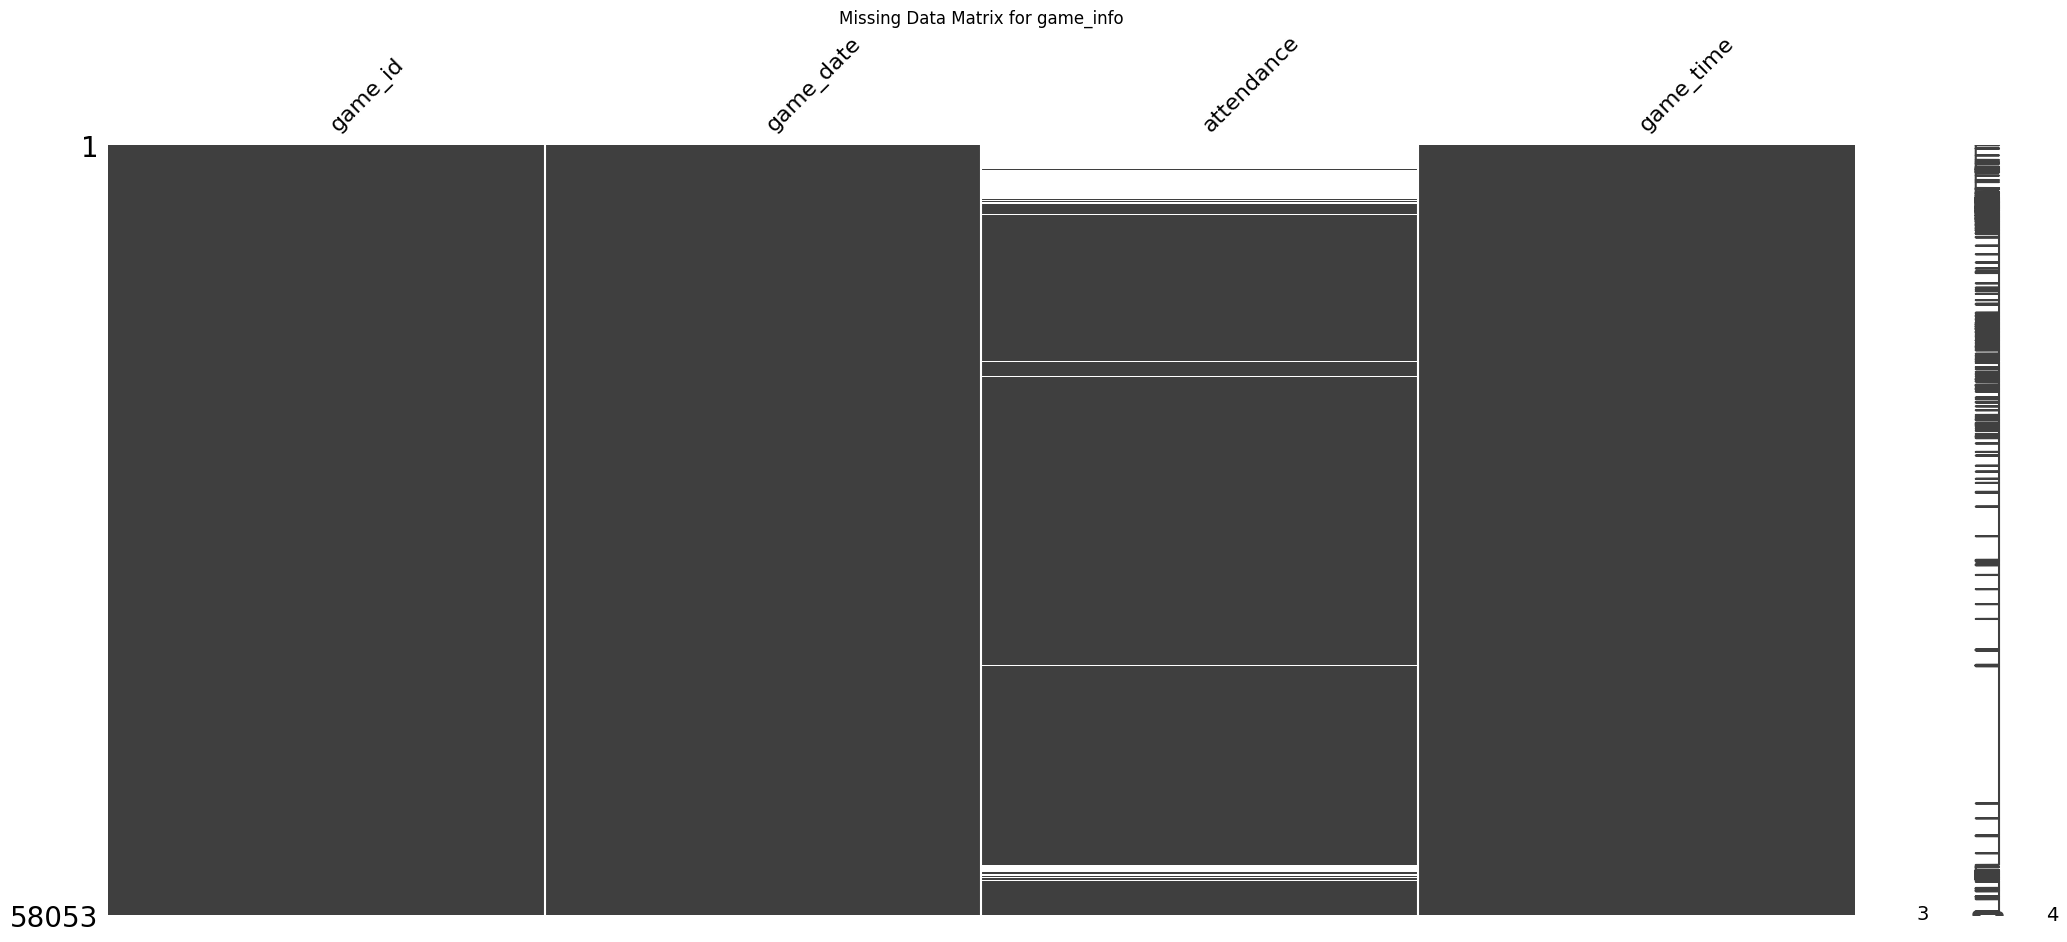

Saved Missing Data Matrix for game_info as 'missing_data_matrix_game_info.png'

Processing table: line_score


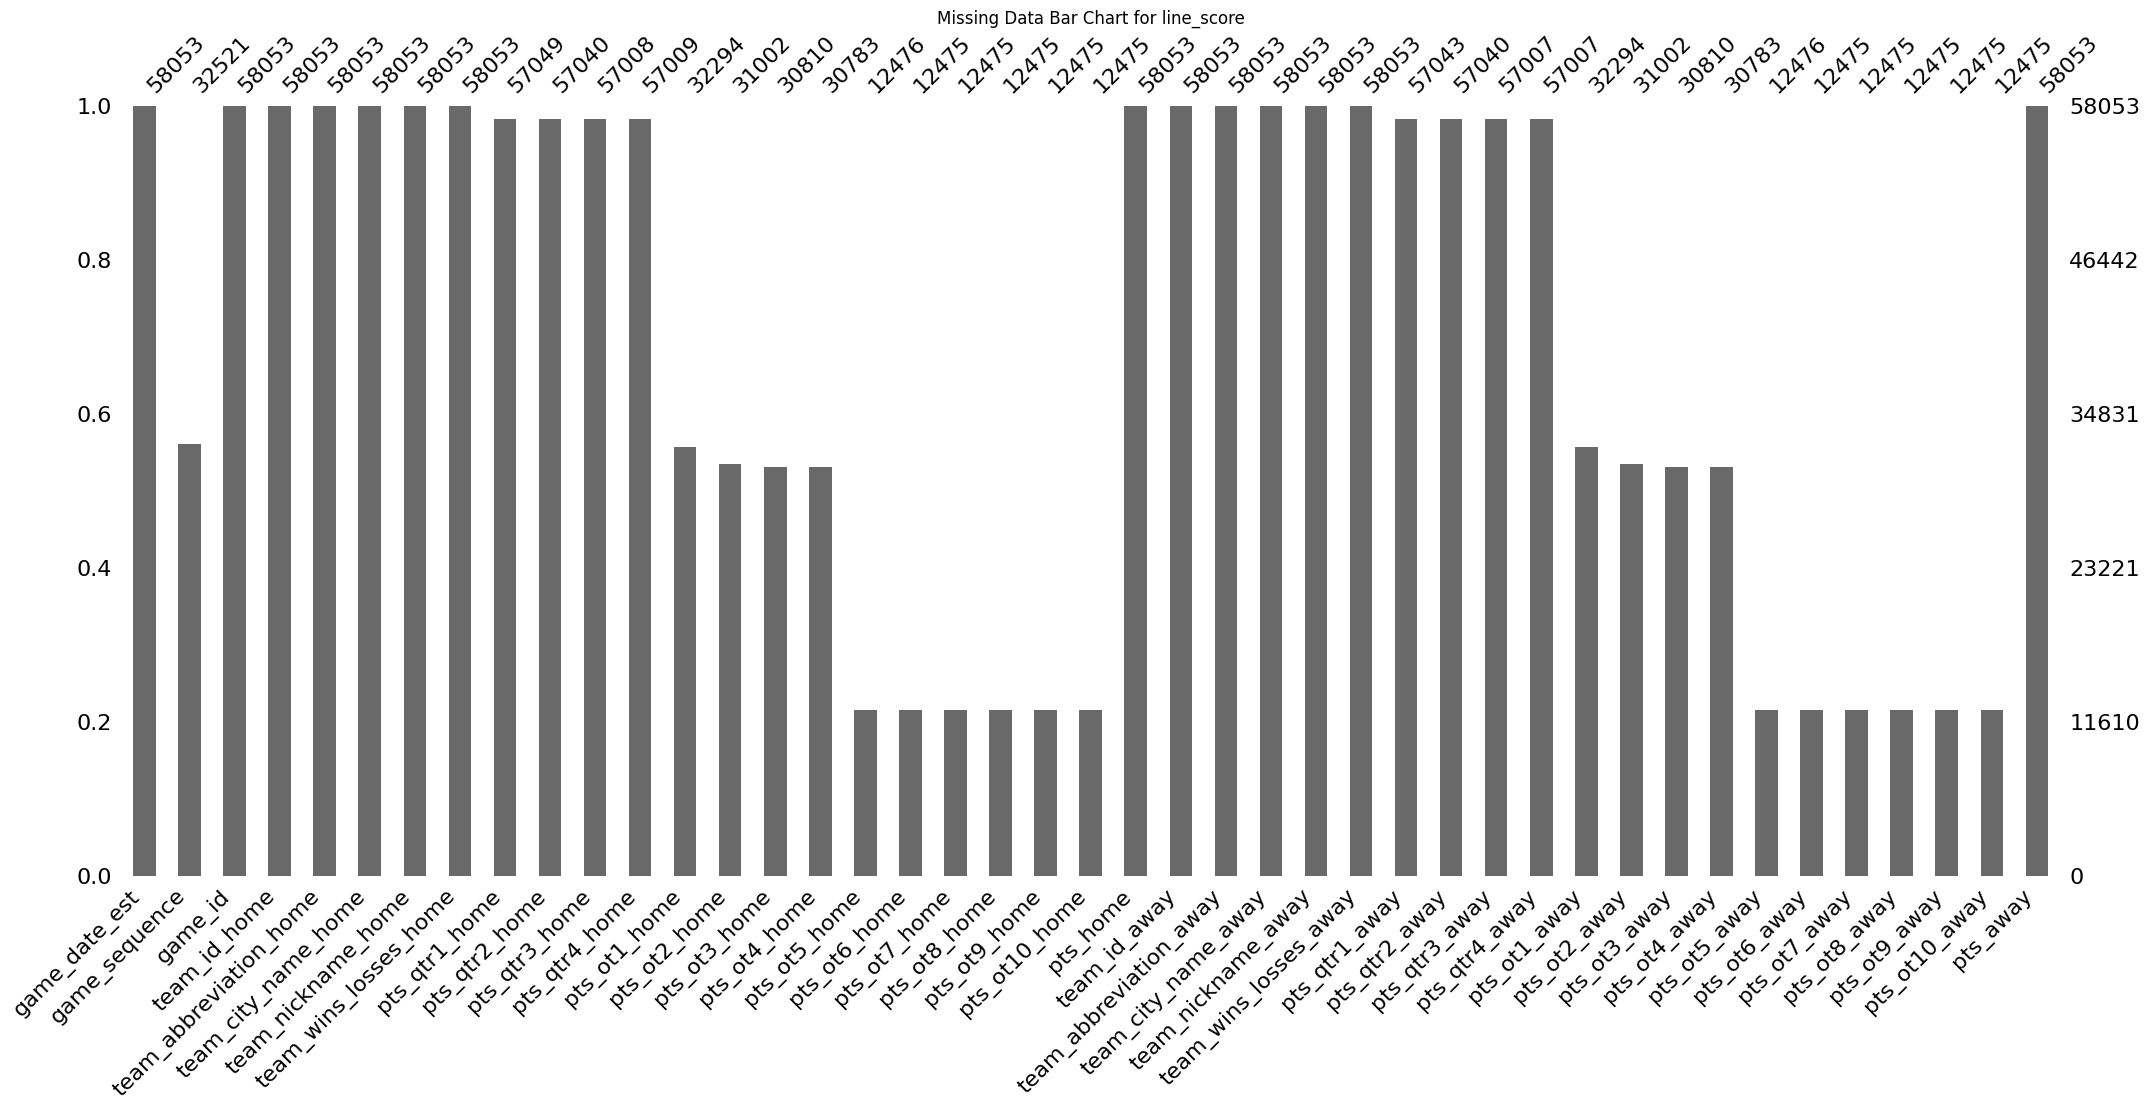

Saved Missing Data Bar Chart for line_score as 'missing_data_bar_line_score.png'


<Figure size 1000x600 with 0 Axes>

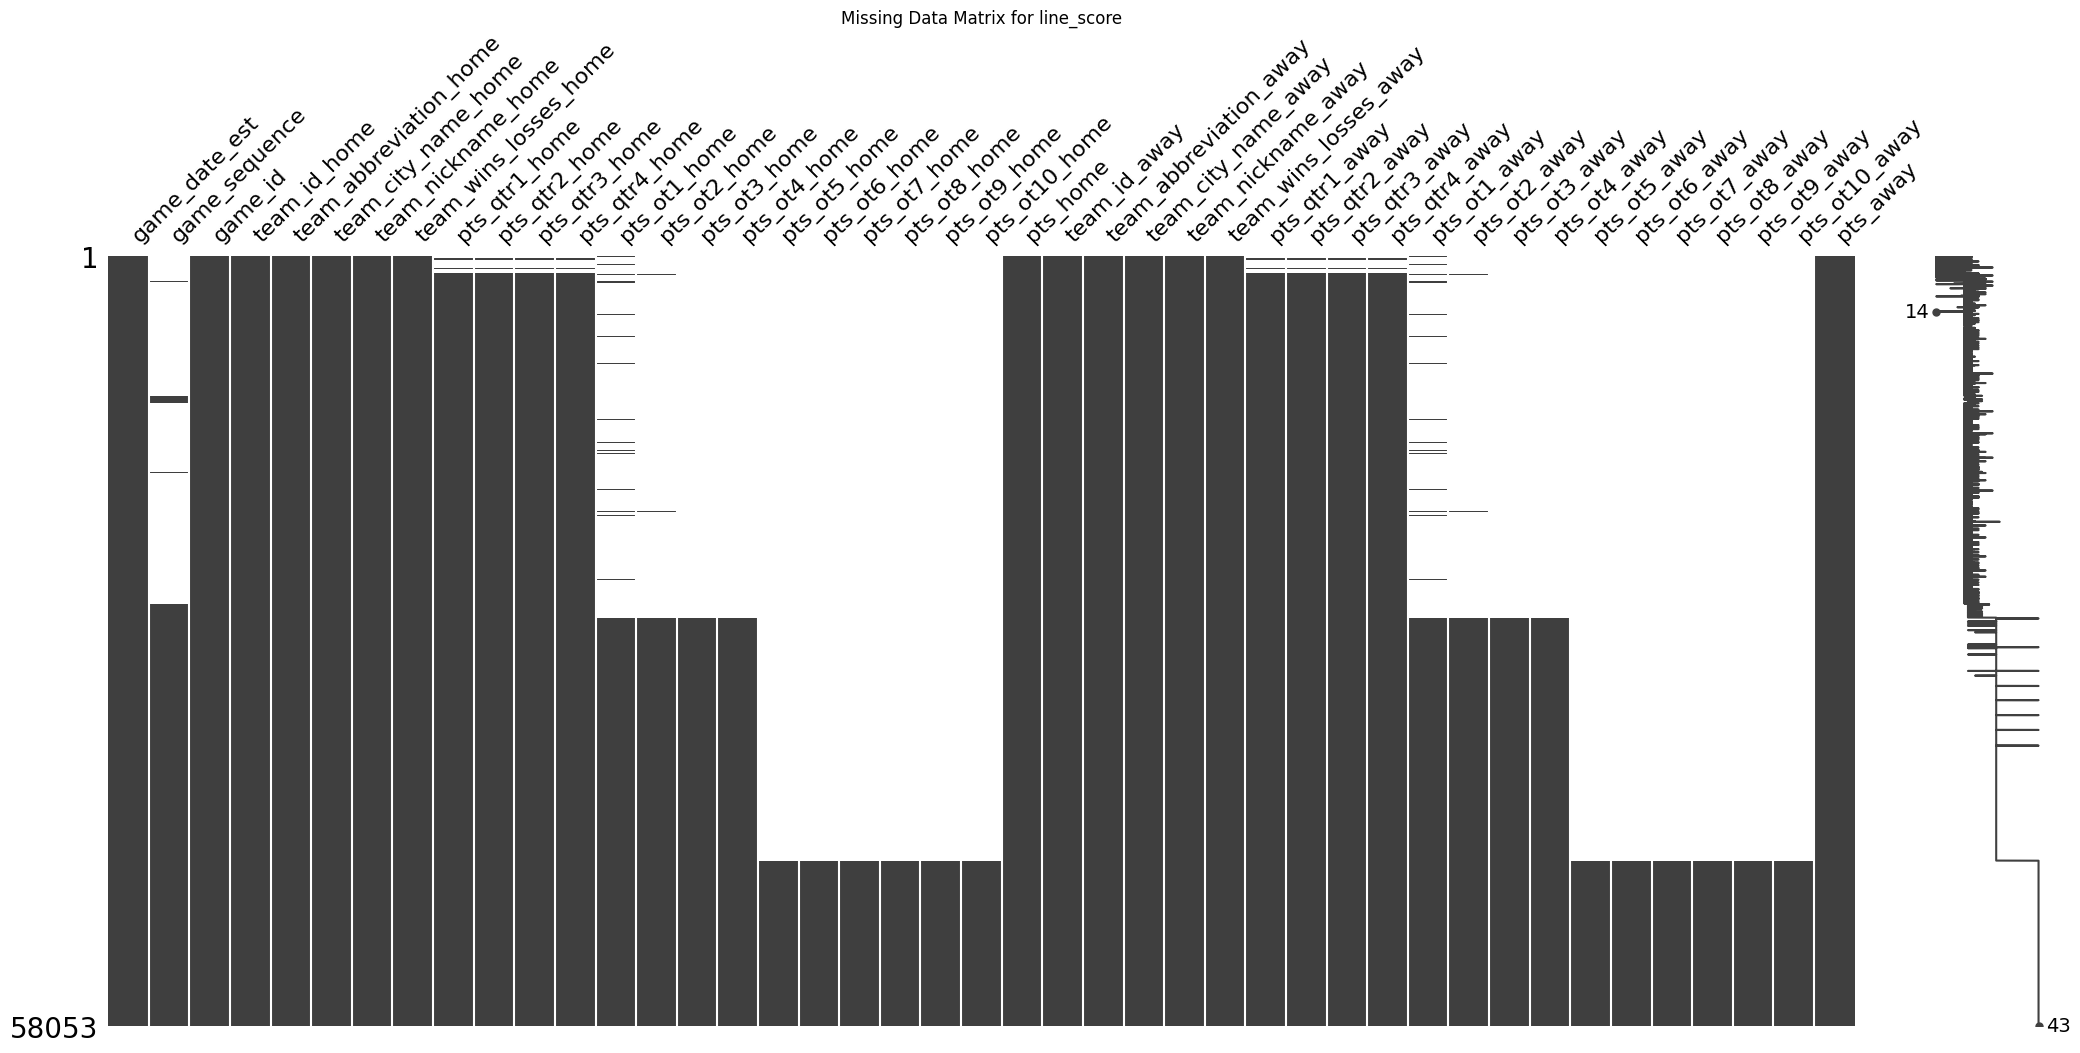

Saved Missing Data Matrix for line_score as 'missing_data_matrix_line_score.png'

Processing table: play_by_play


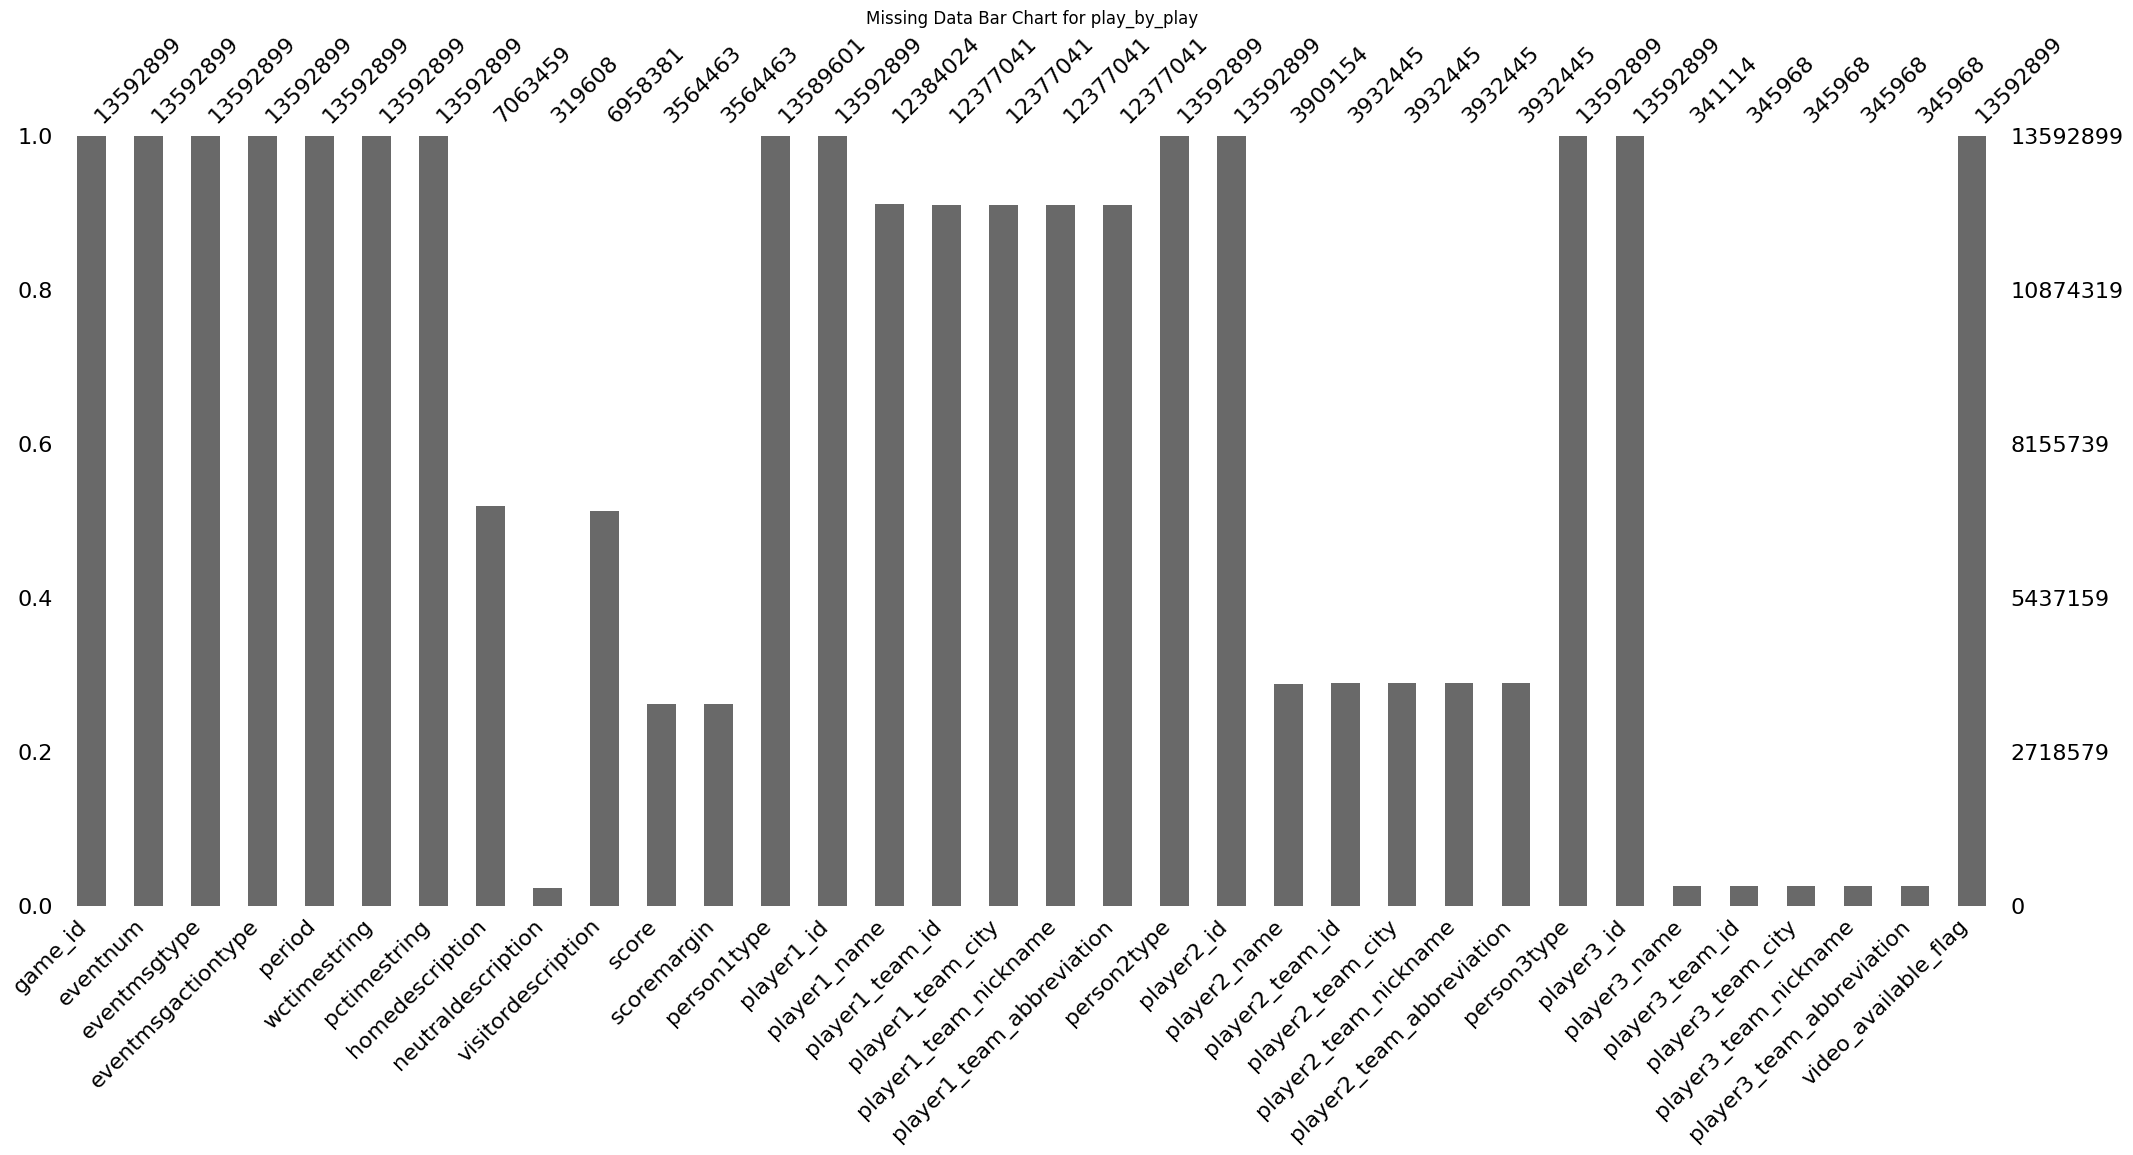

Saved Missing Data Bar Chart for play_by_play as 'missing_data_bar_play_by_play.png'


<Figure size 1000x600 with 0 Axes>

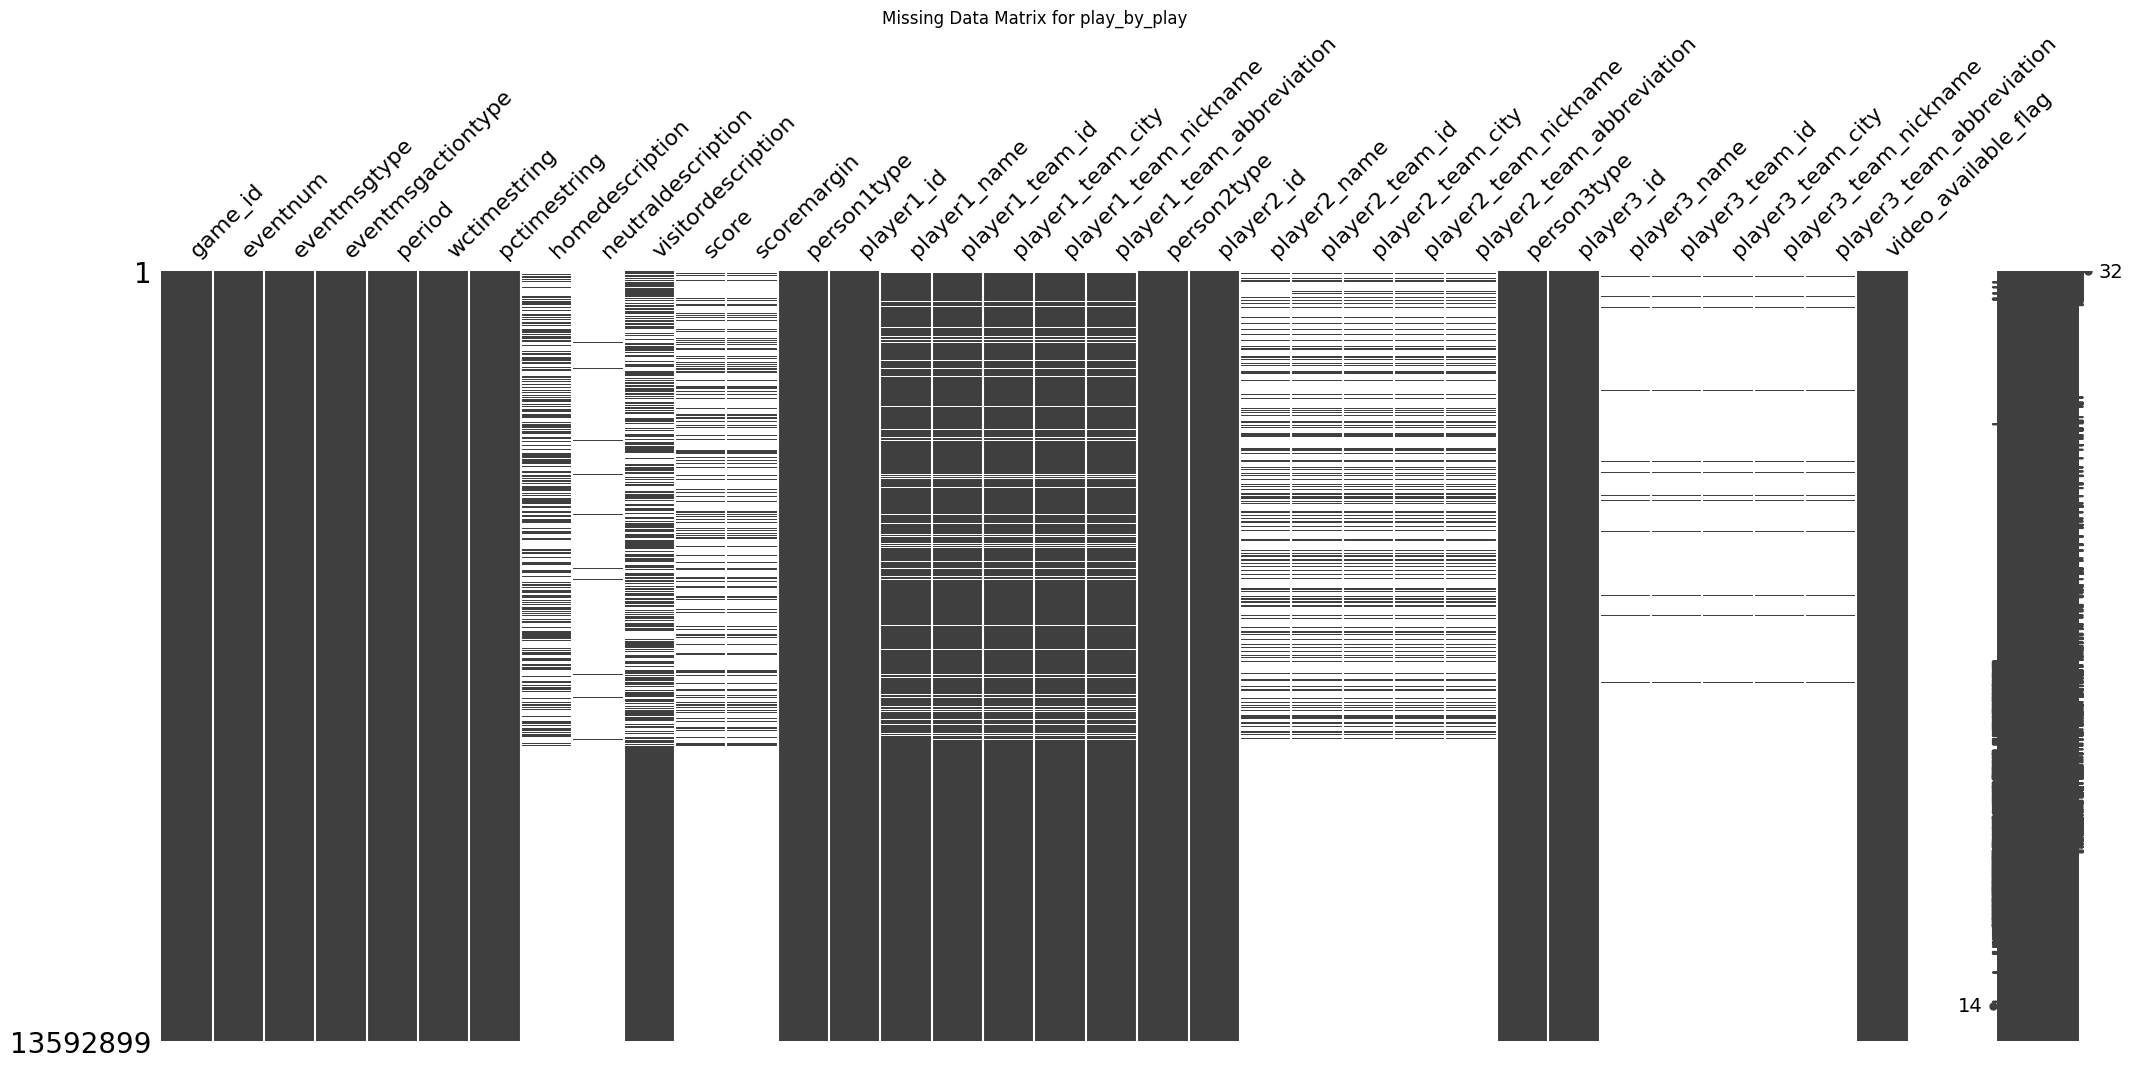

Saved Missing Data Matrix for play_by_play as 'missing_data_matrix_play_by_play.png'

Processing table: player


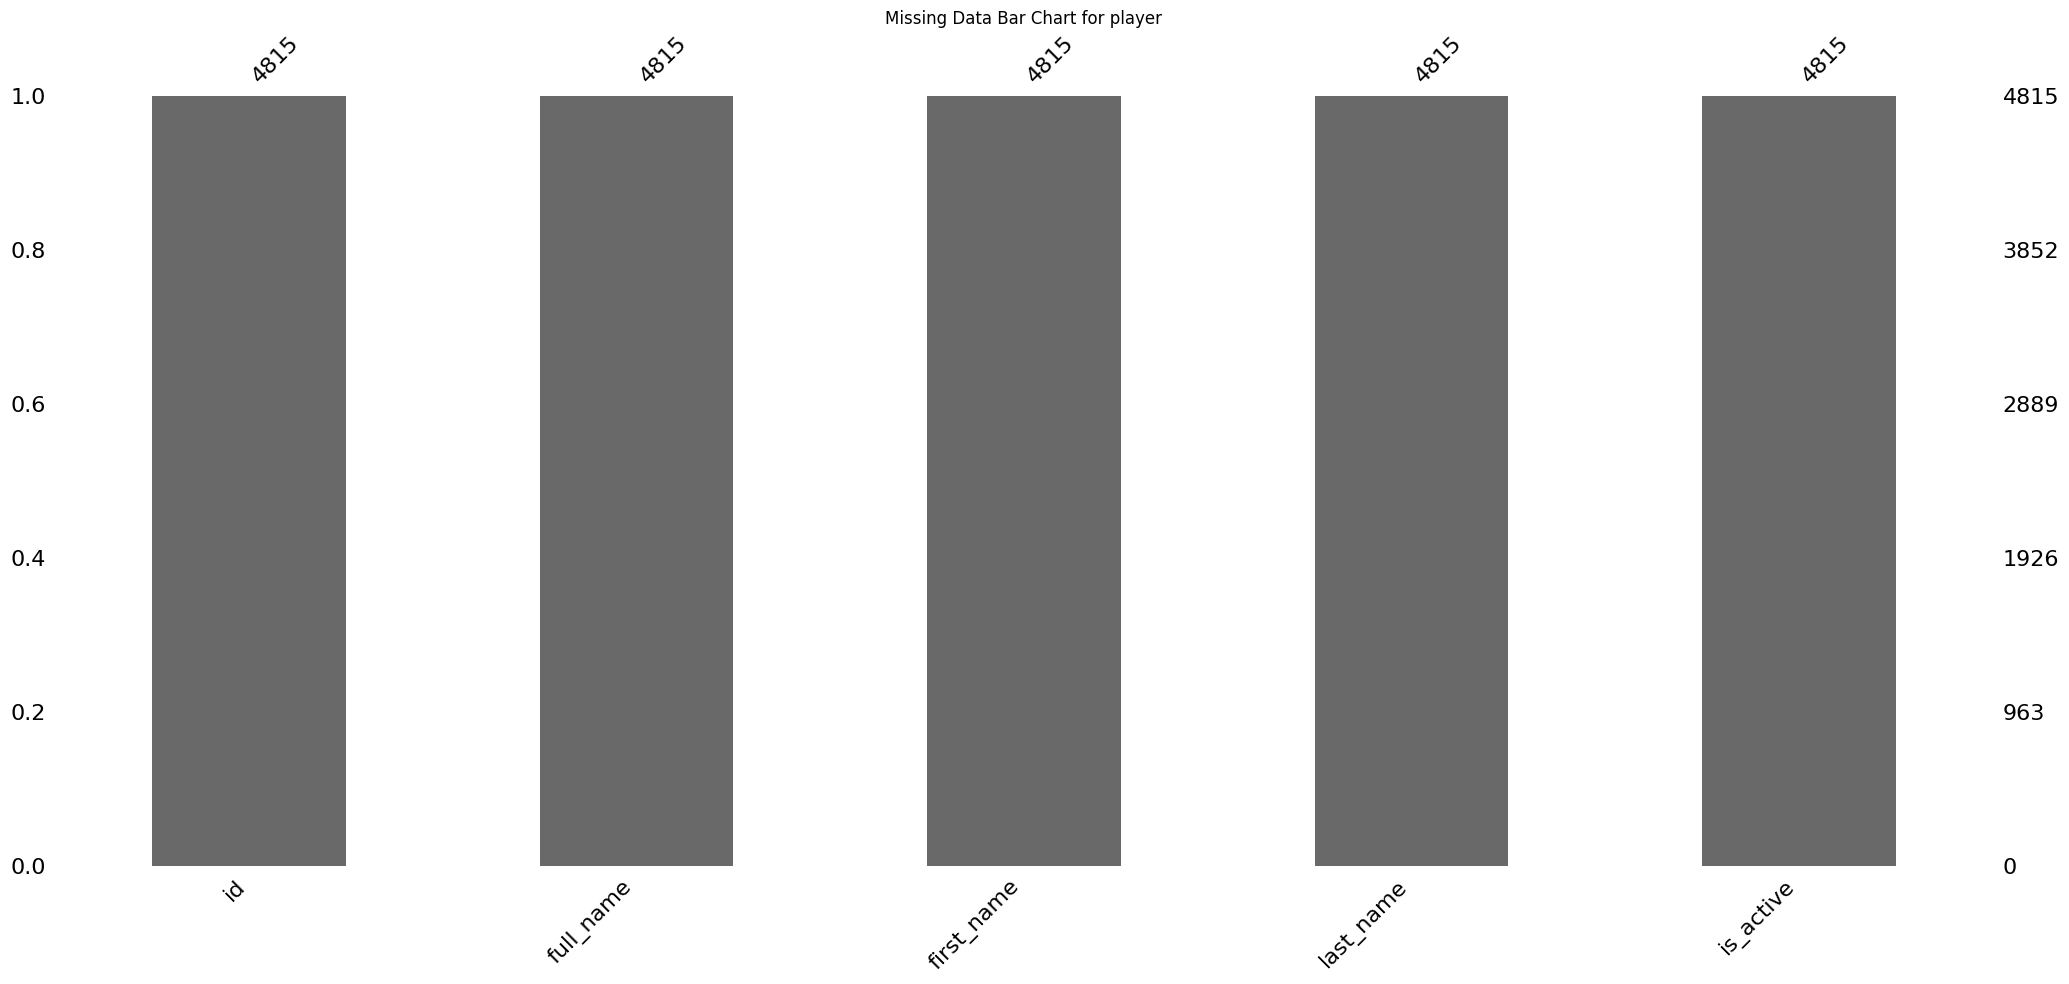

Saved Missing Data Bar Chart for player as 'missing_data_bar_player.png'


<Figure size 1000x600 with 0 Axes>

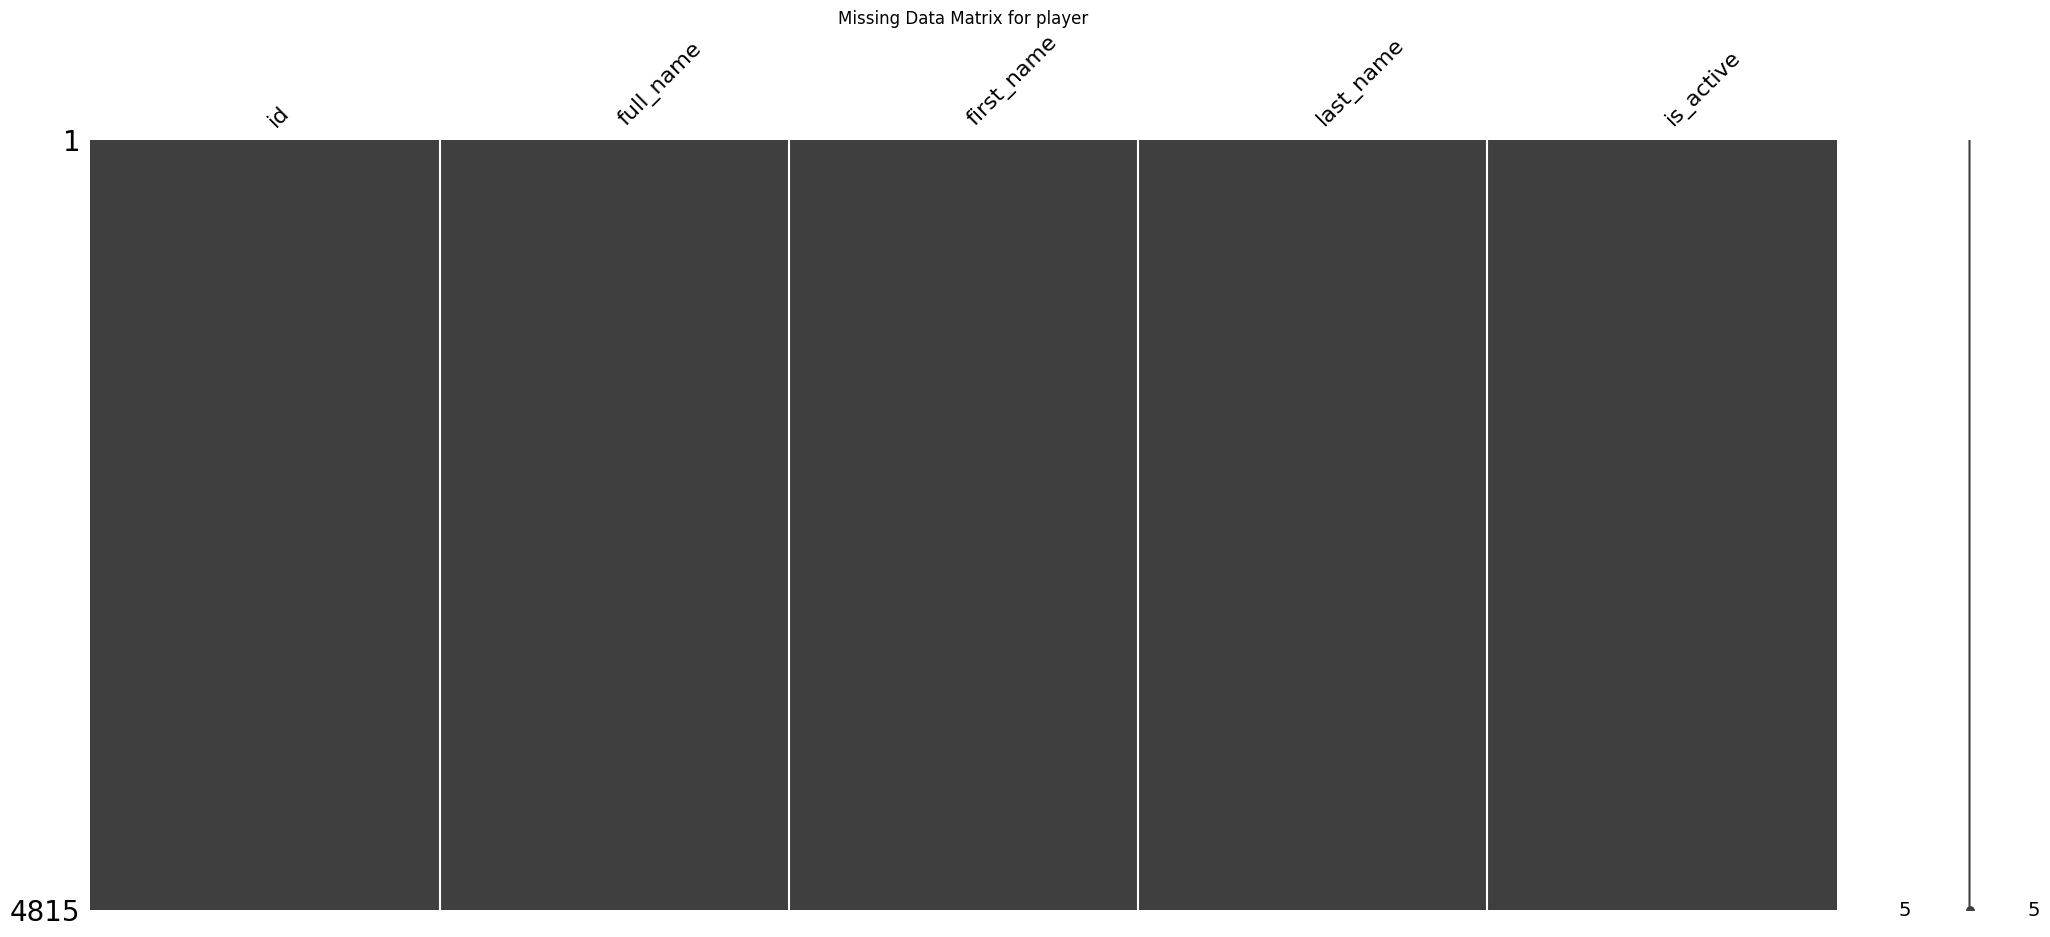

Saved Missing Data Matrix for player as 'missing_data_matrix_player.png'

Processing table: team


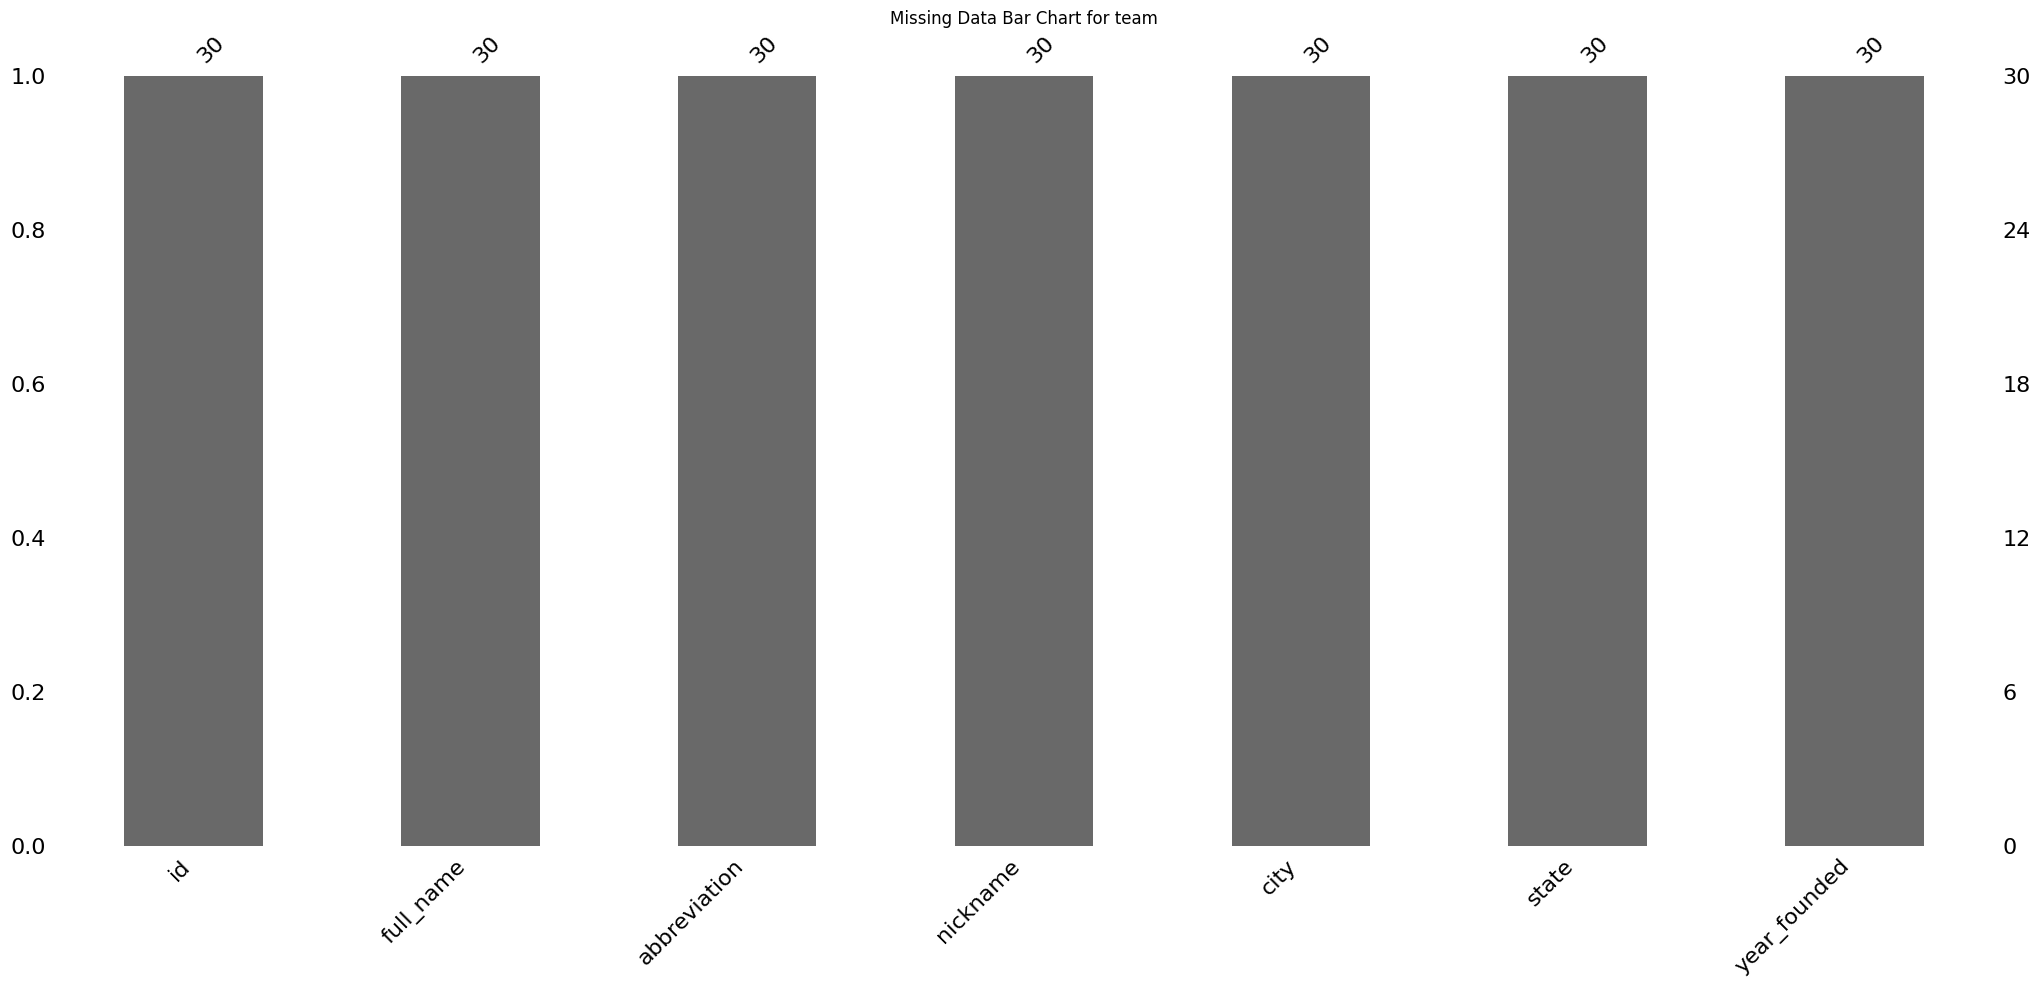

Saved Missing Data Bar Chart for team as 'missing_data_bar_team.png'


<Figure size 1000x600 with 0 Axes>

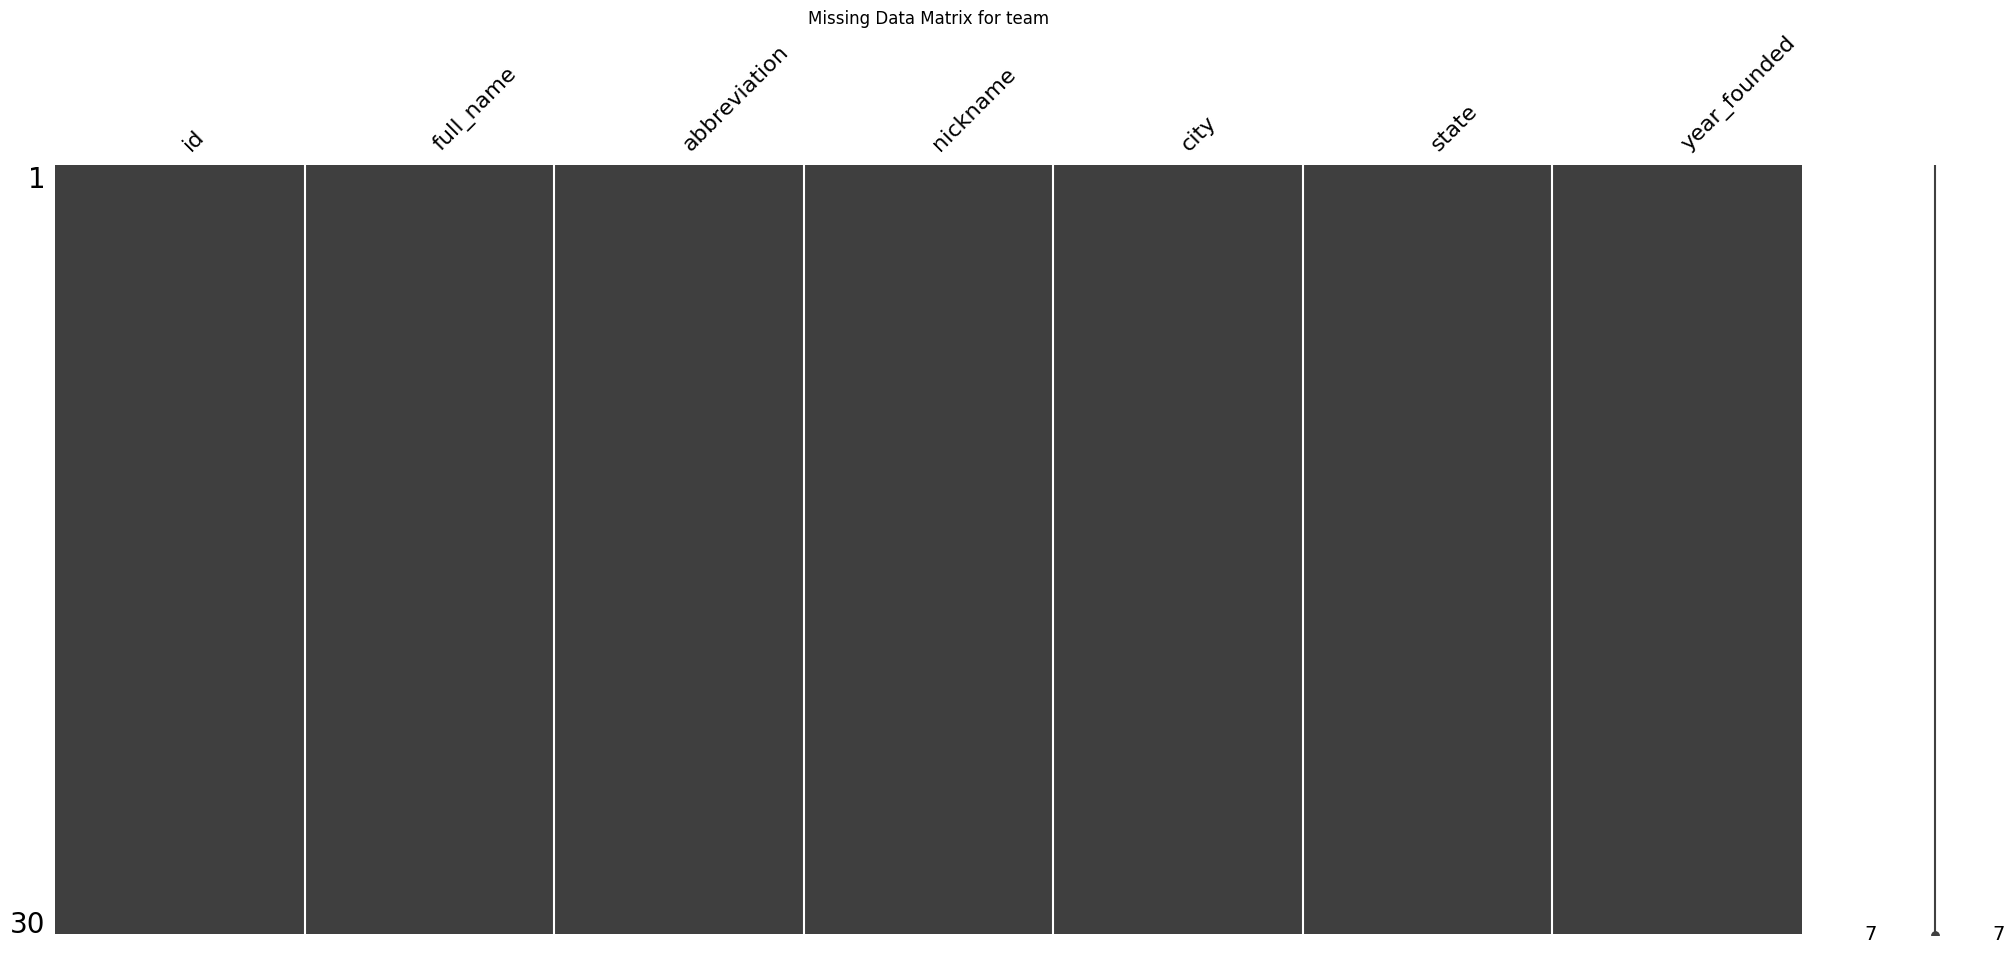

Saved Missing Data Matrix for team as 'missing_data_matrix_team.png'

Processing table: common_player_info


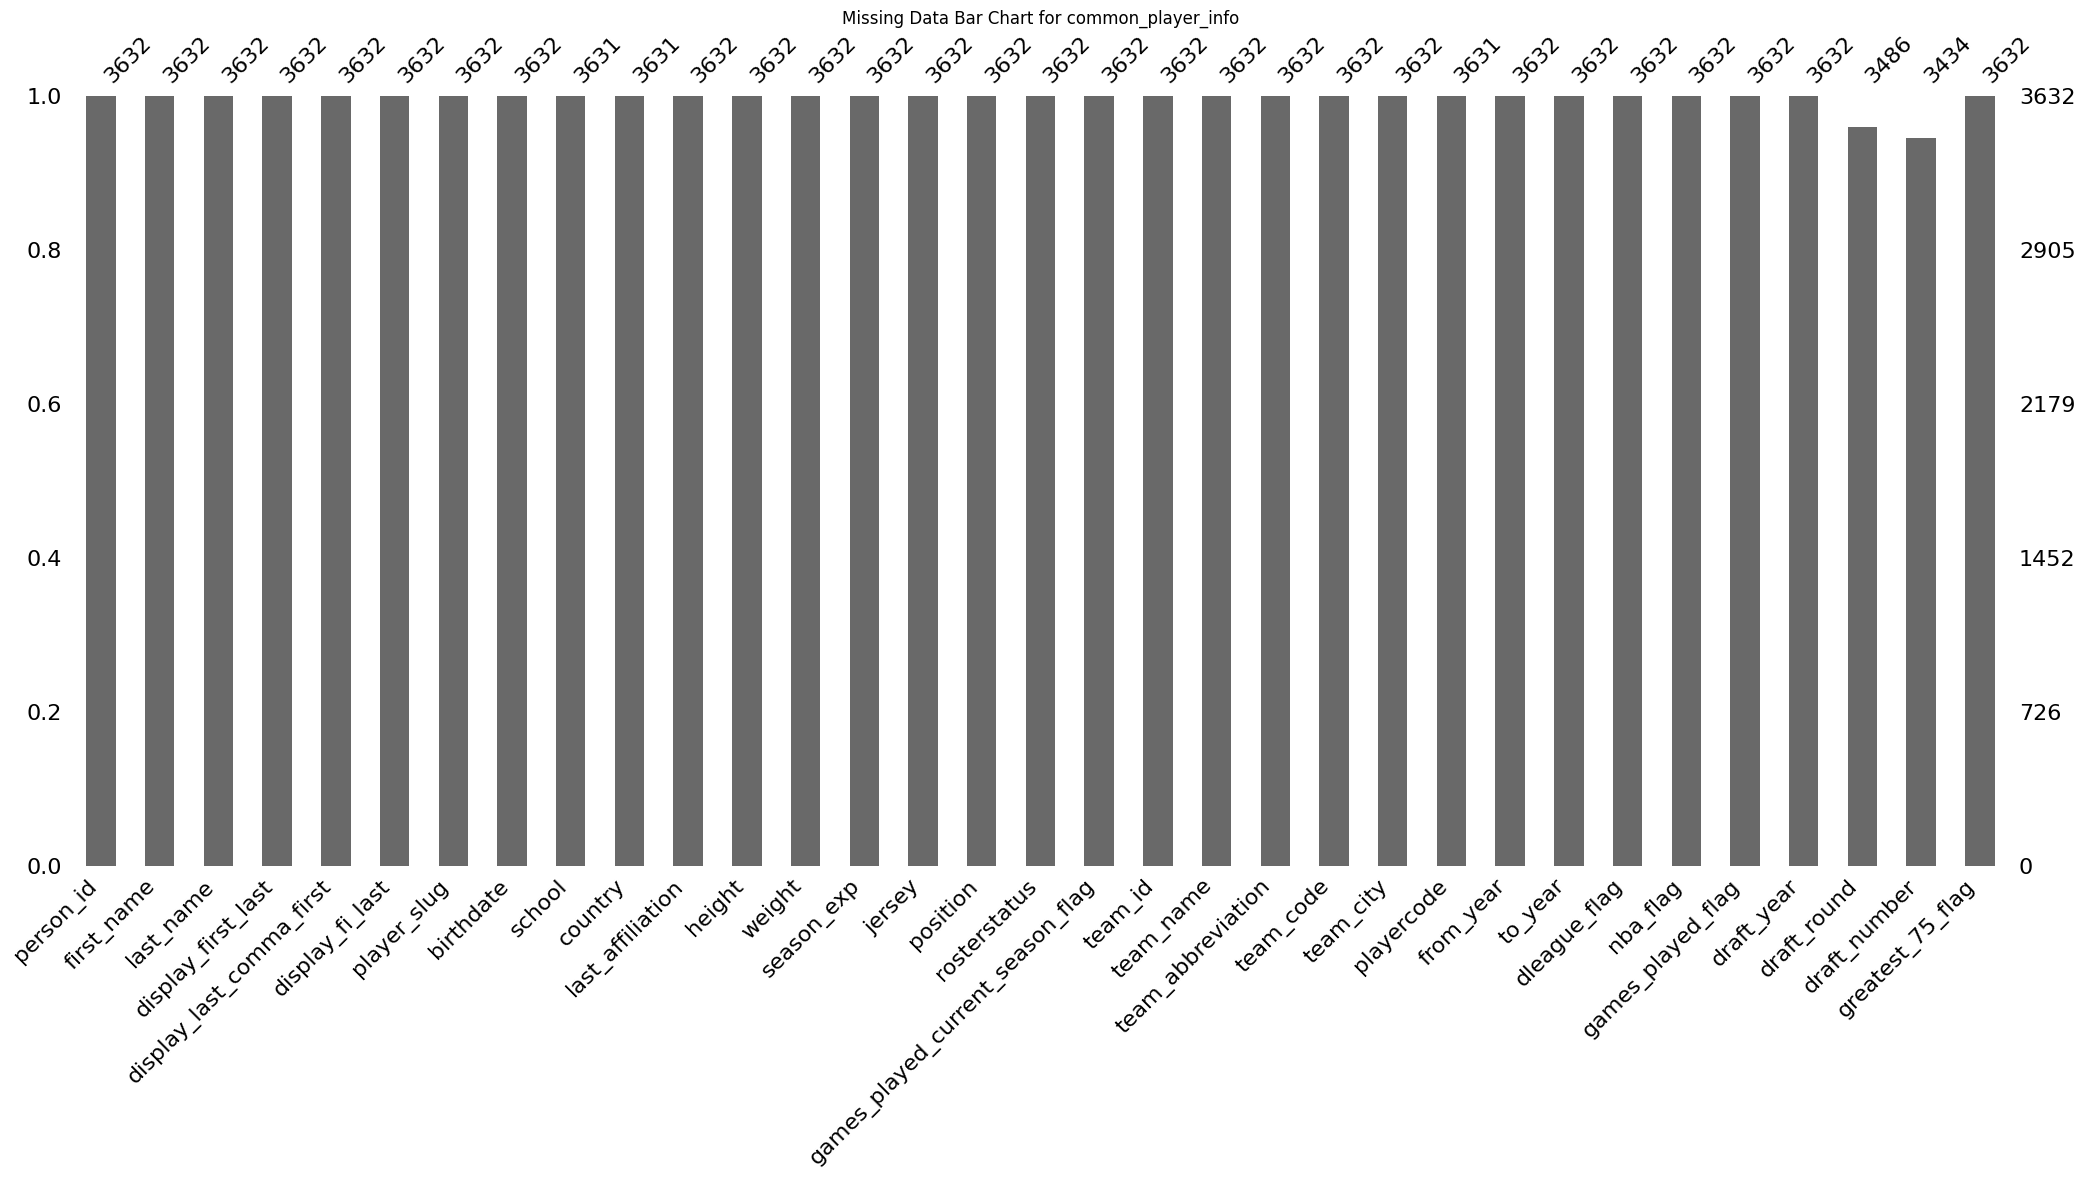

Saved Missing Data Bar Chart for common_player_info as 'missing_data_bar_common_player_info.png'


<Figure size 1000x600 with 0 Axes>

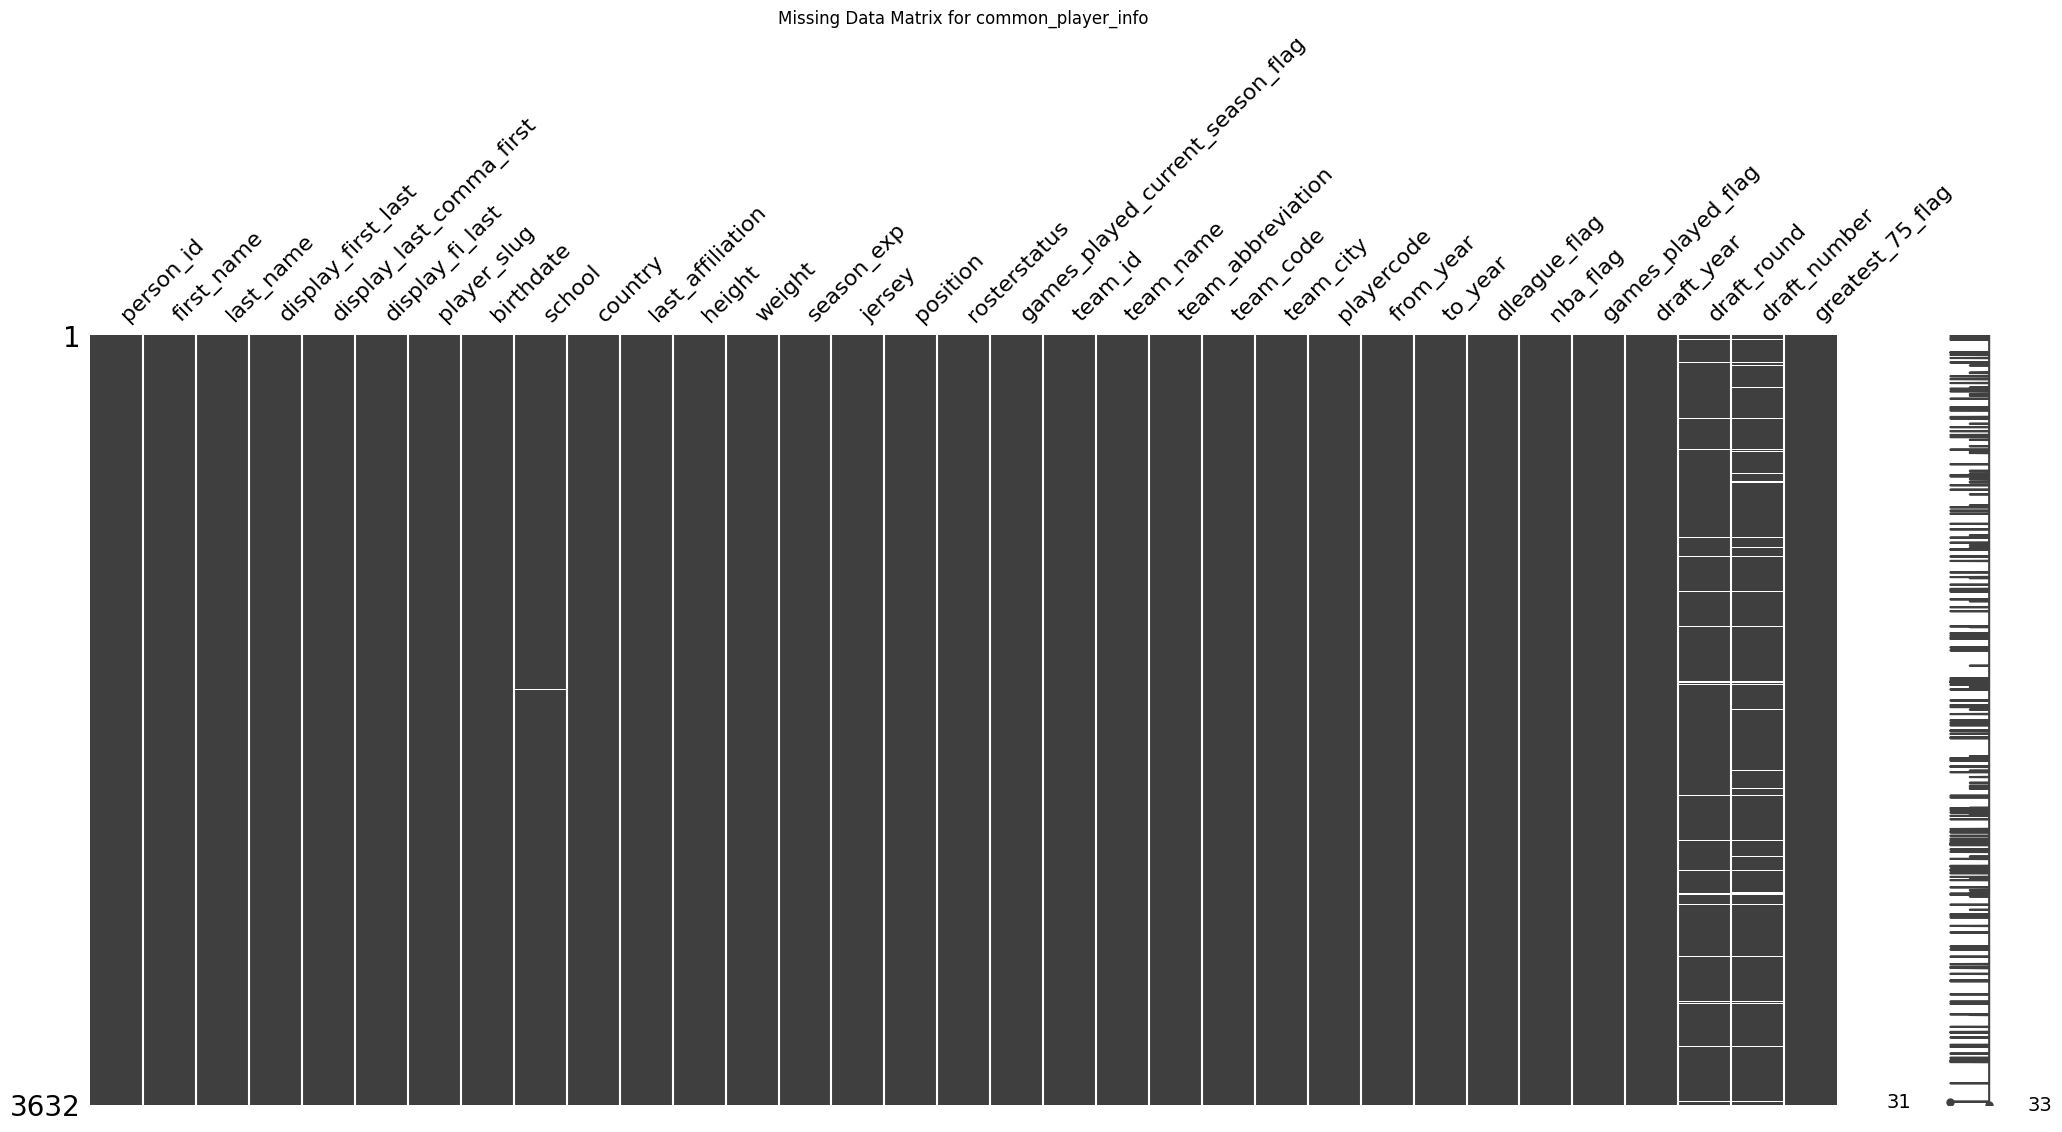

Saved Missing Data Matrix for common_player_info as 'missing_data_matrix_common_player_info.png'

Processing table: team_details


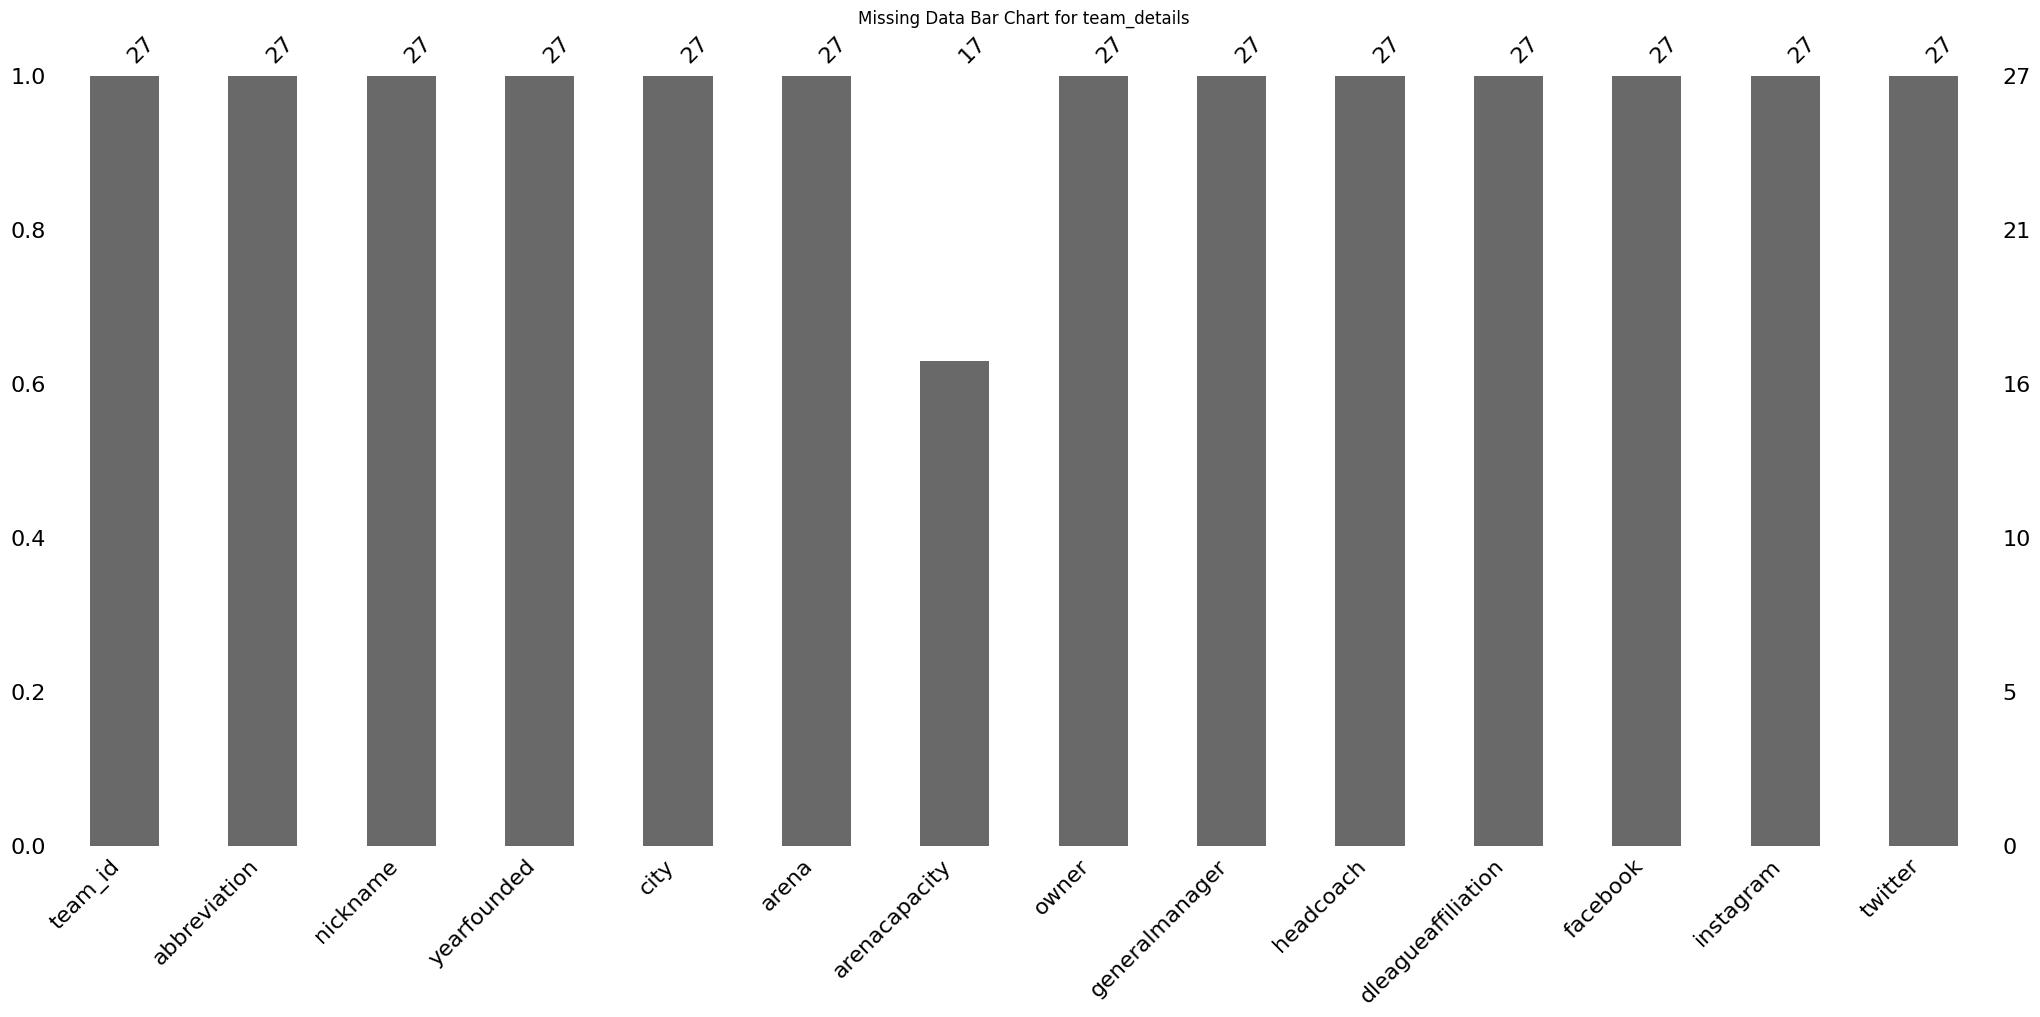

Saved Missing Data Bar Chart for team_details as 'missing_data_bar_team_details.png'


<Figure size 1000x600 with 0 Axes>

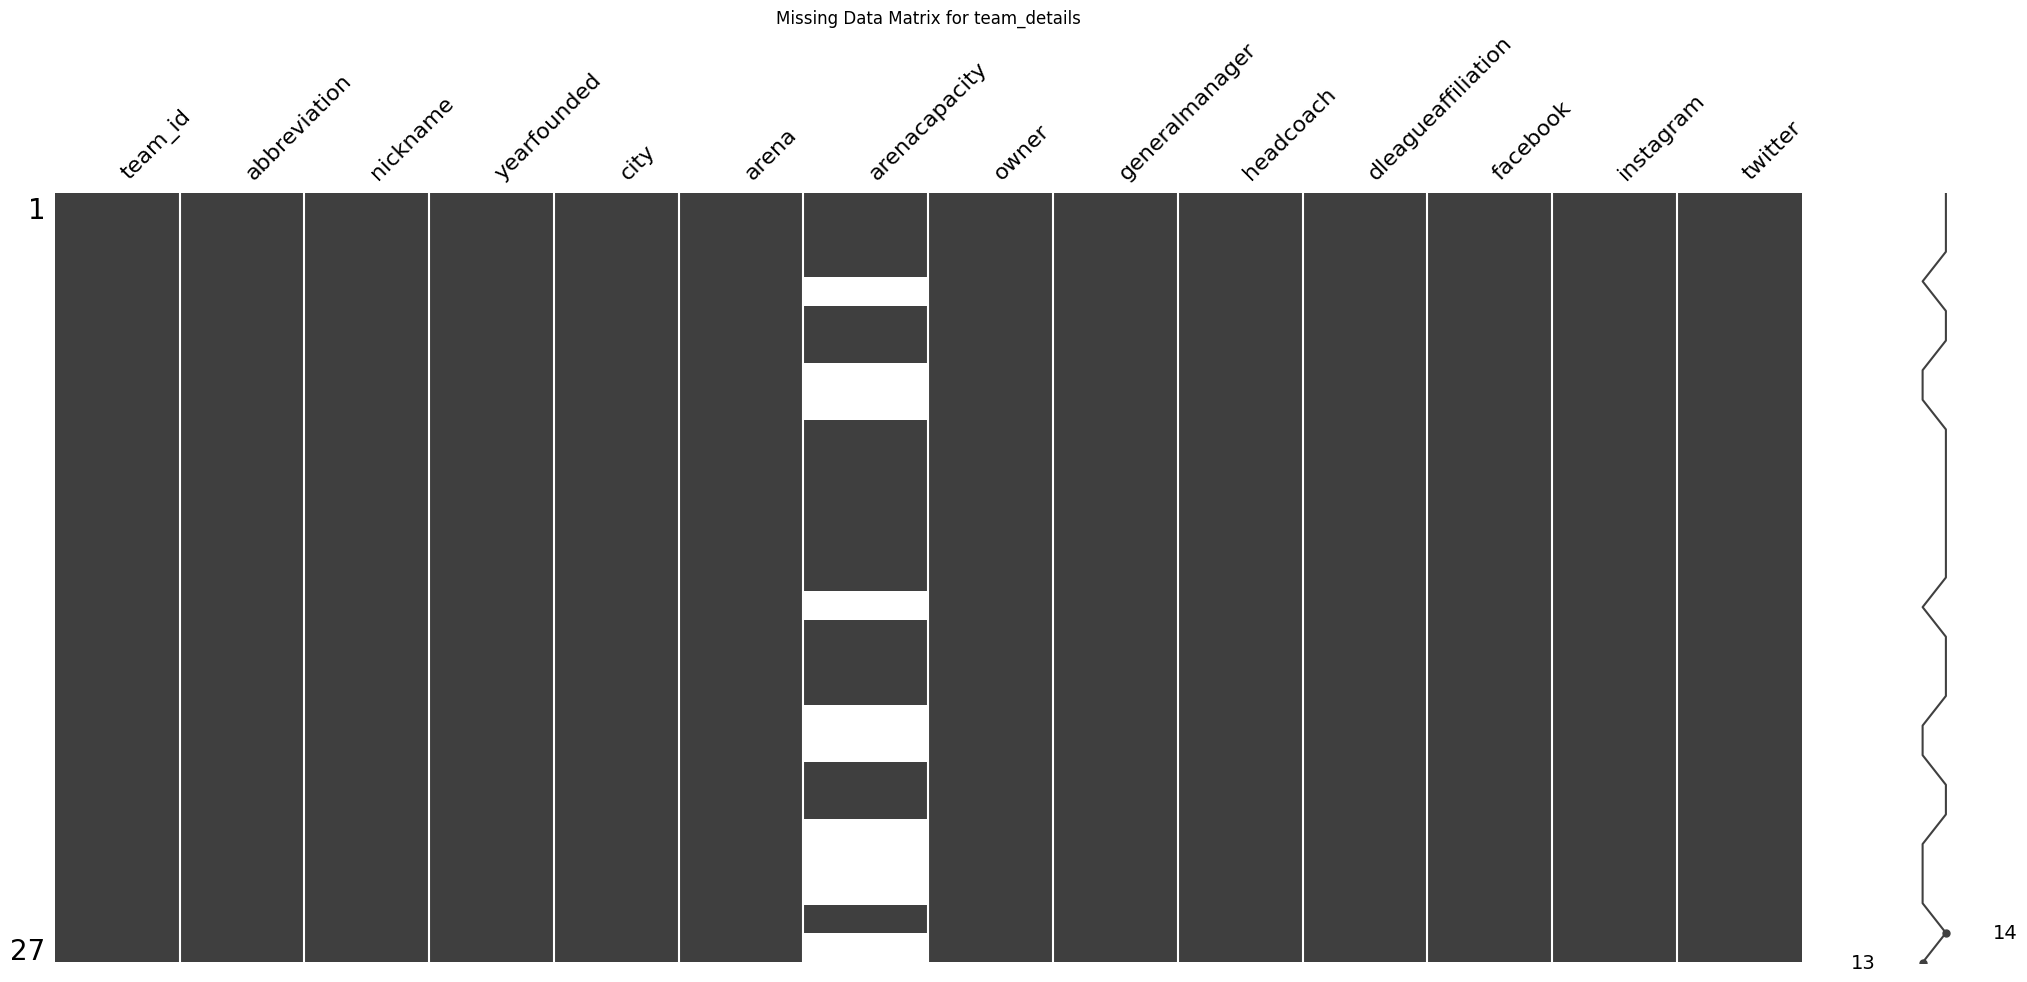

Saved Missing Data Matrix for team_details as 'missing_data_matrix_team_details.png'

Processing table: team_history


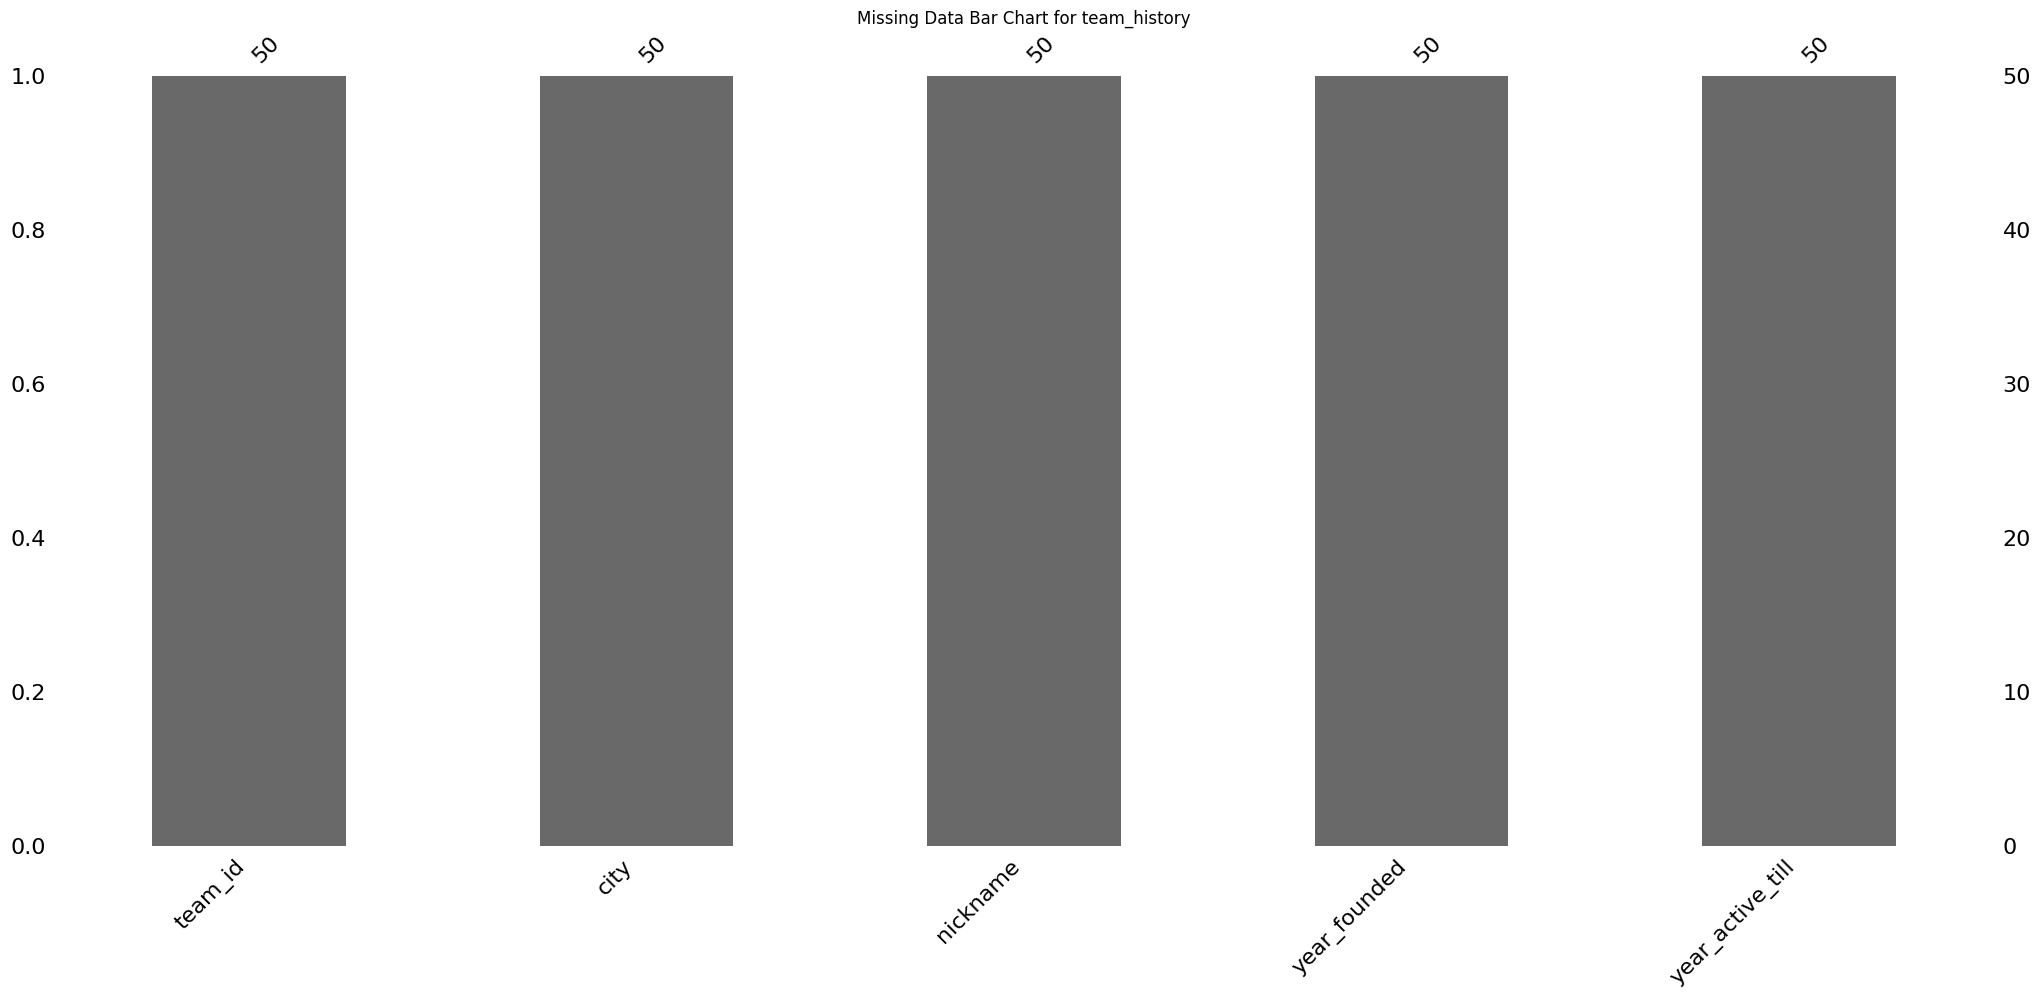

Saved Missing Data Bar Chart for team_history as 'missing_data_bar_team_history.png'


<Figure size 1000x600 with 0 Axes>

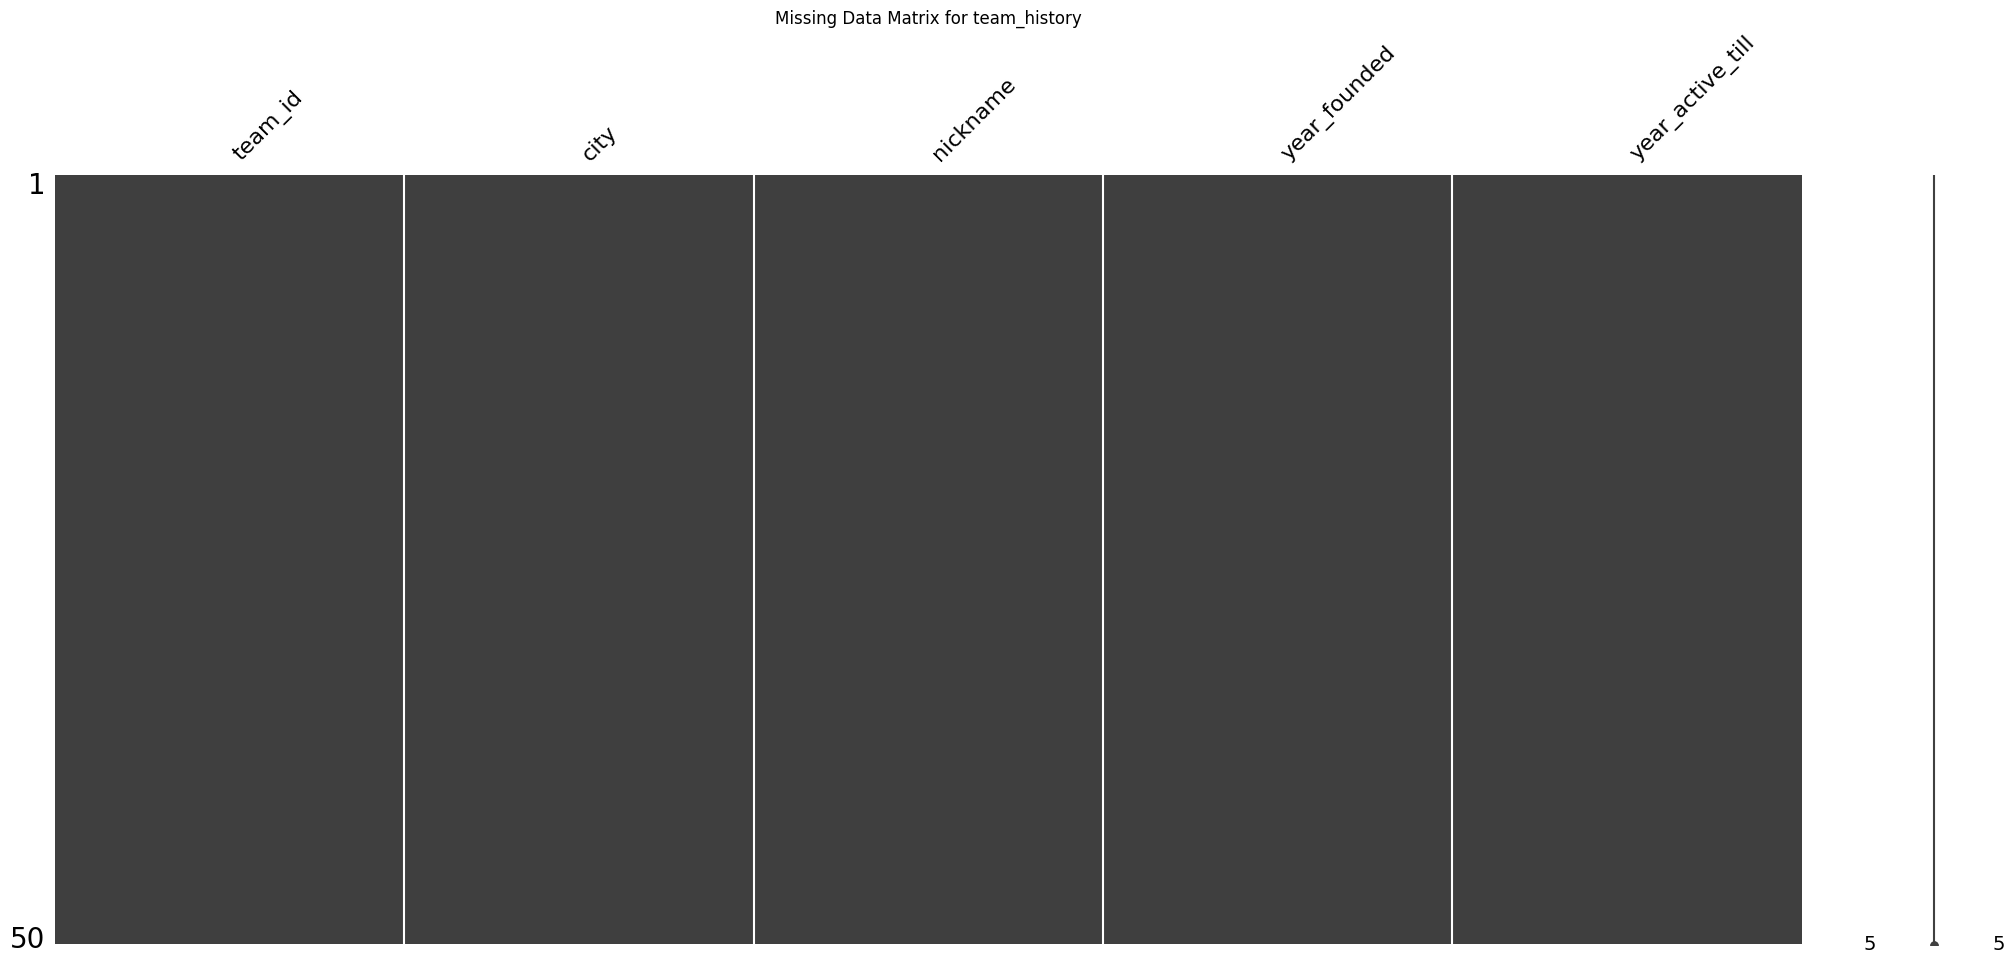

Saved Missing Data Matrix for team_history as 'missing_data_matrix_team_history.png'

Processing table: draft_combine_stats


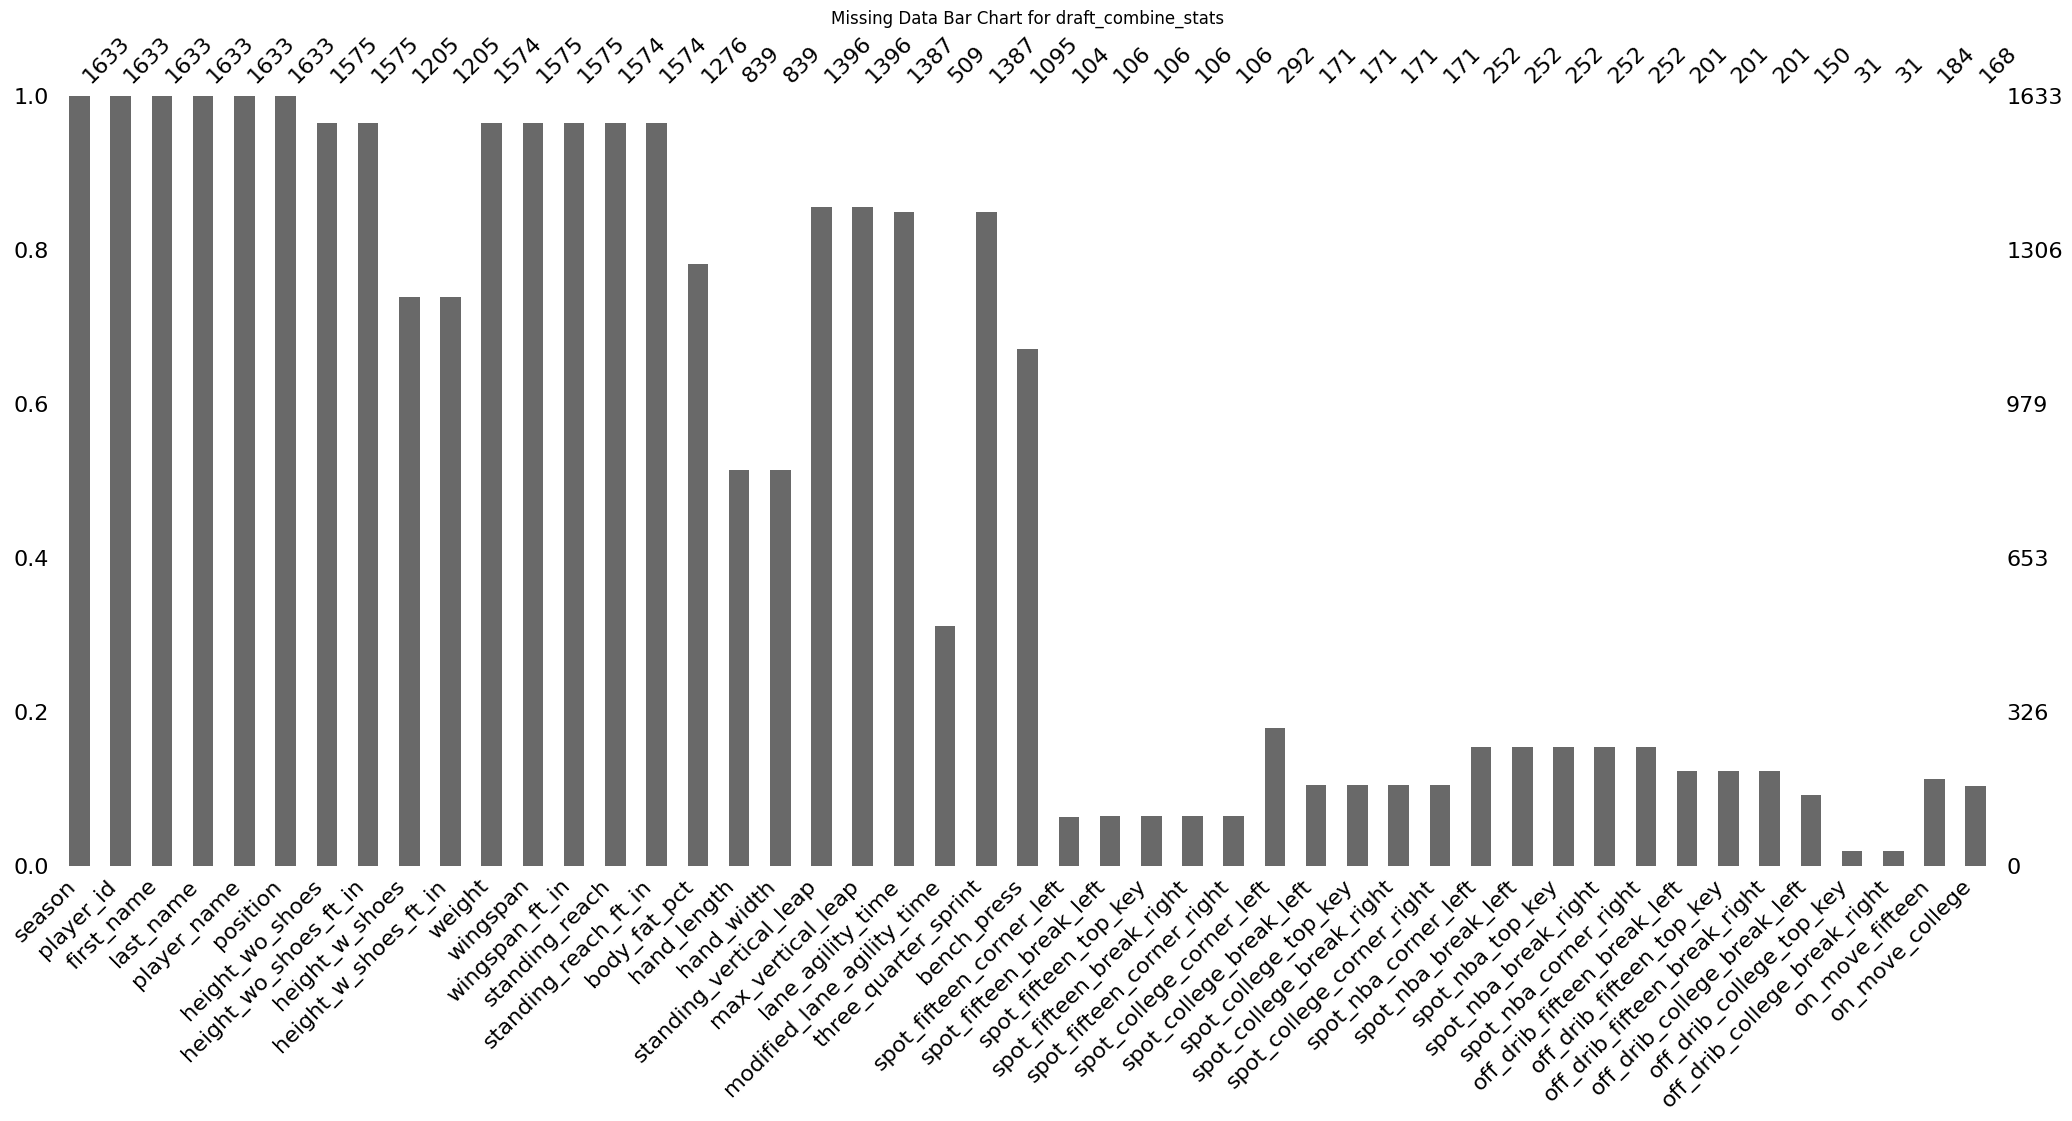

Saved Missing Data Bar Chart for draft_combine_stats as 'missing_data_bar_draft_combine_stats.png'


<Figure size 1000x600 with 0 Axes>

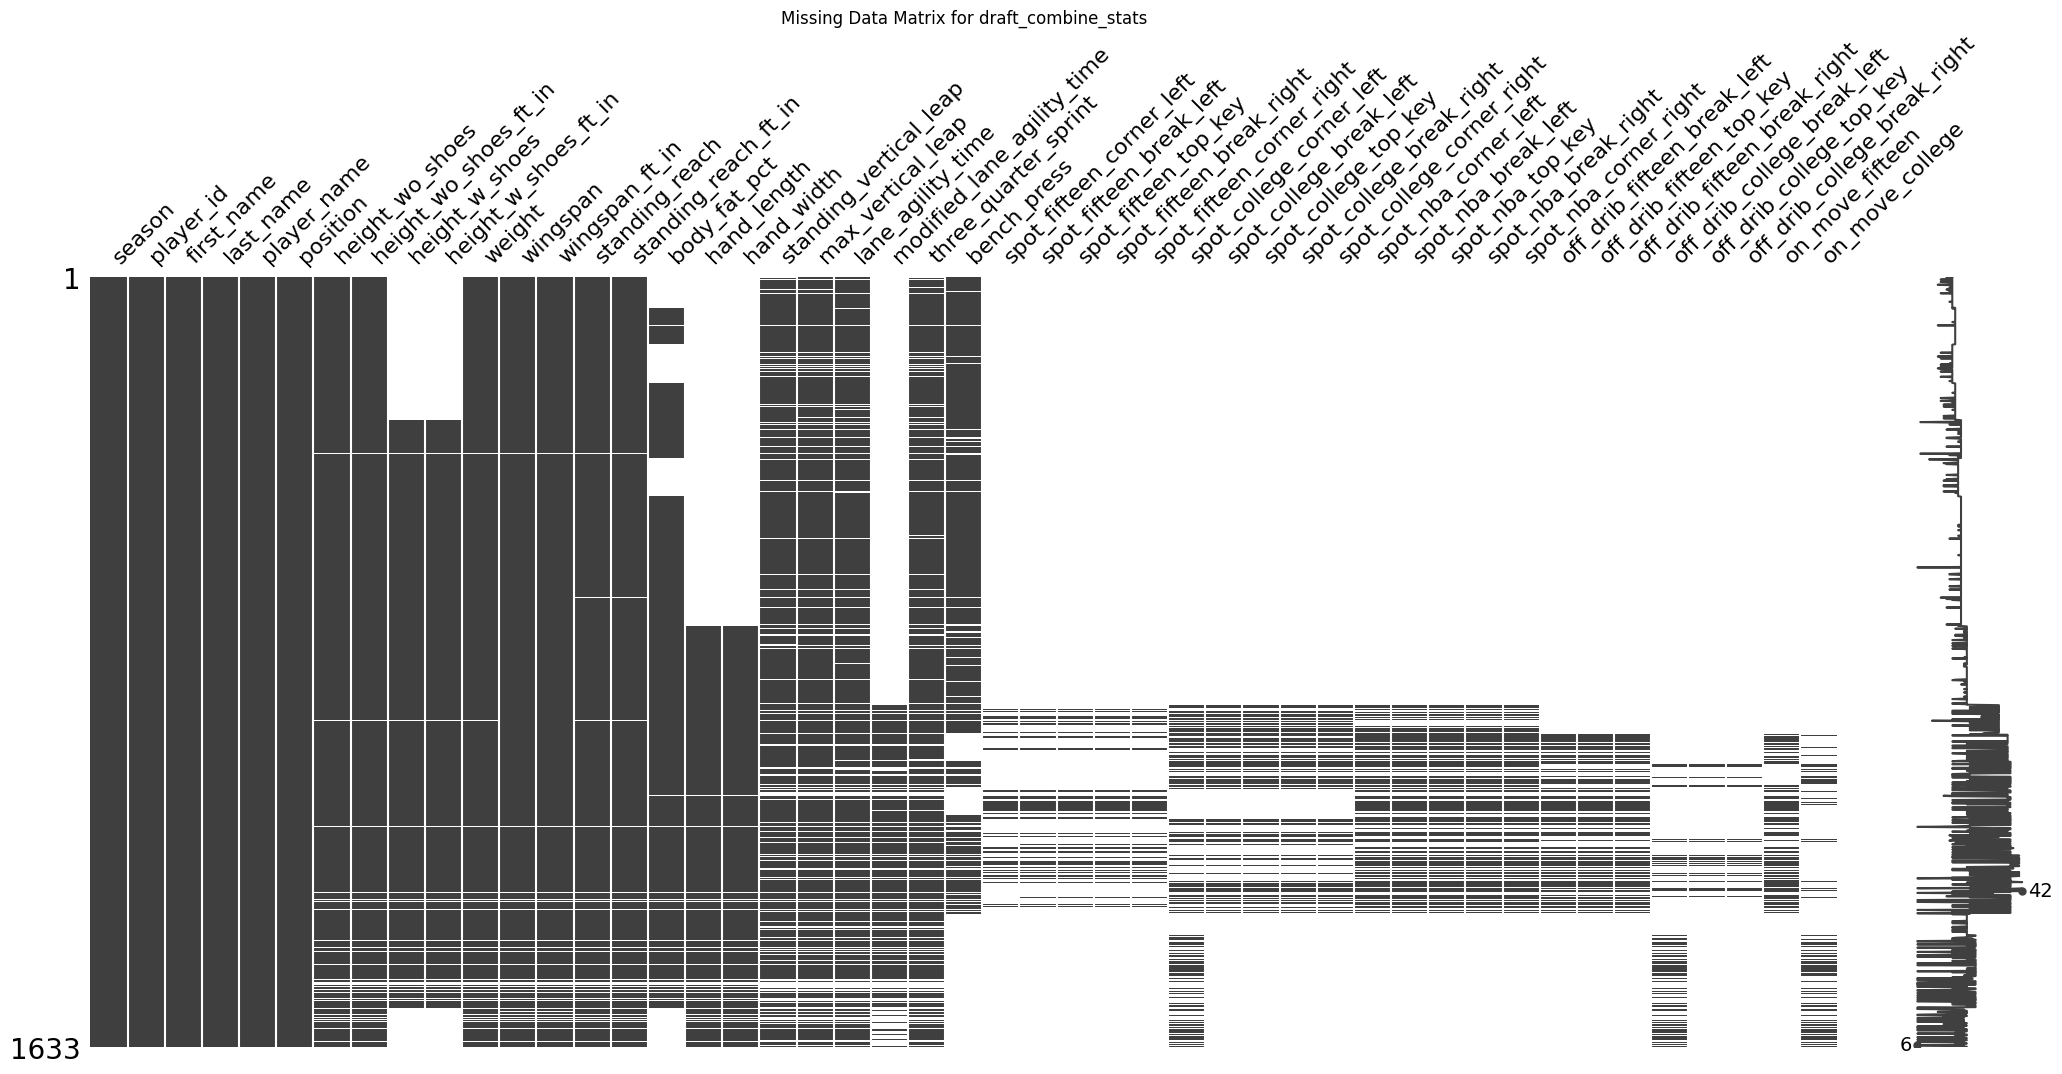

Saved Missing Data Matrix for draft_combine_stats as 'missing_data_matrix_draft_combine_stats.png'

Processing table: draft_history


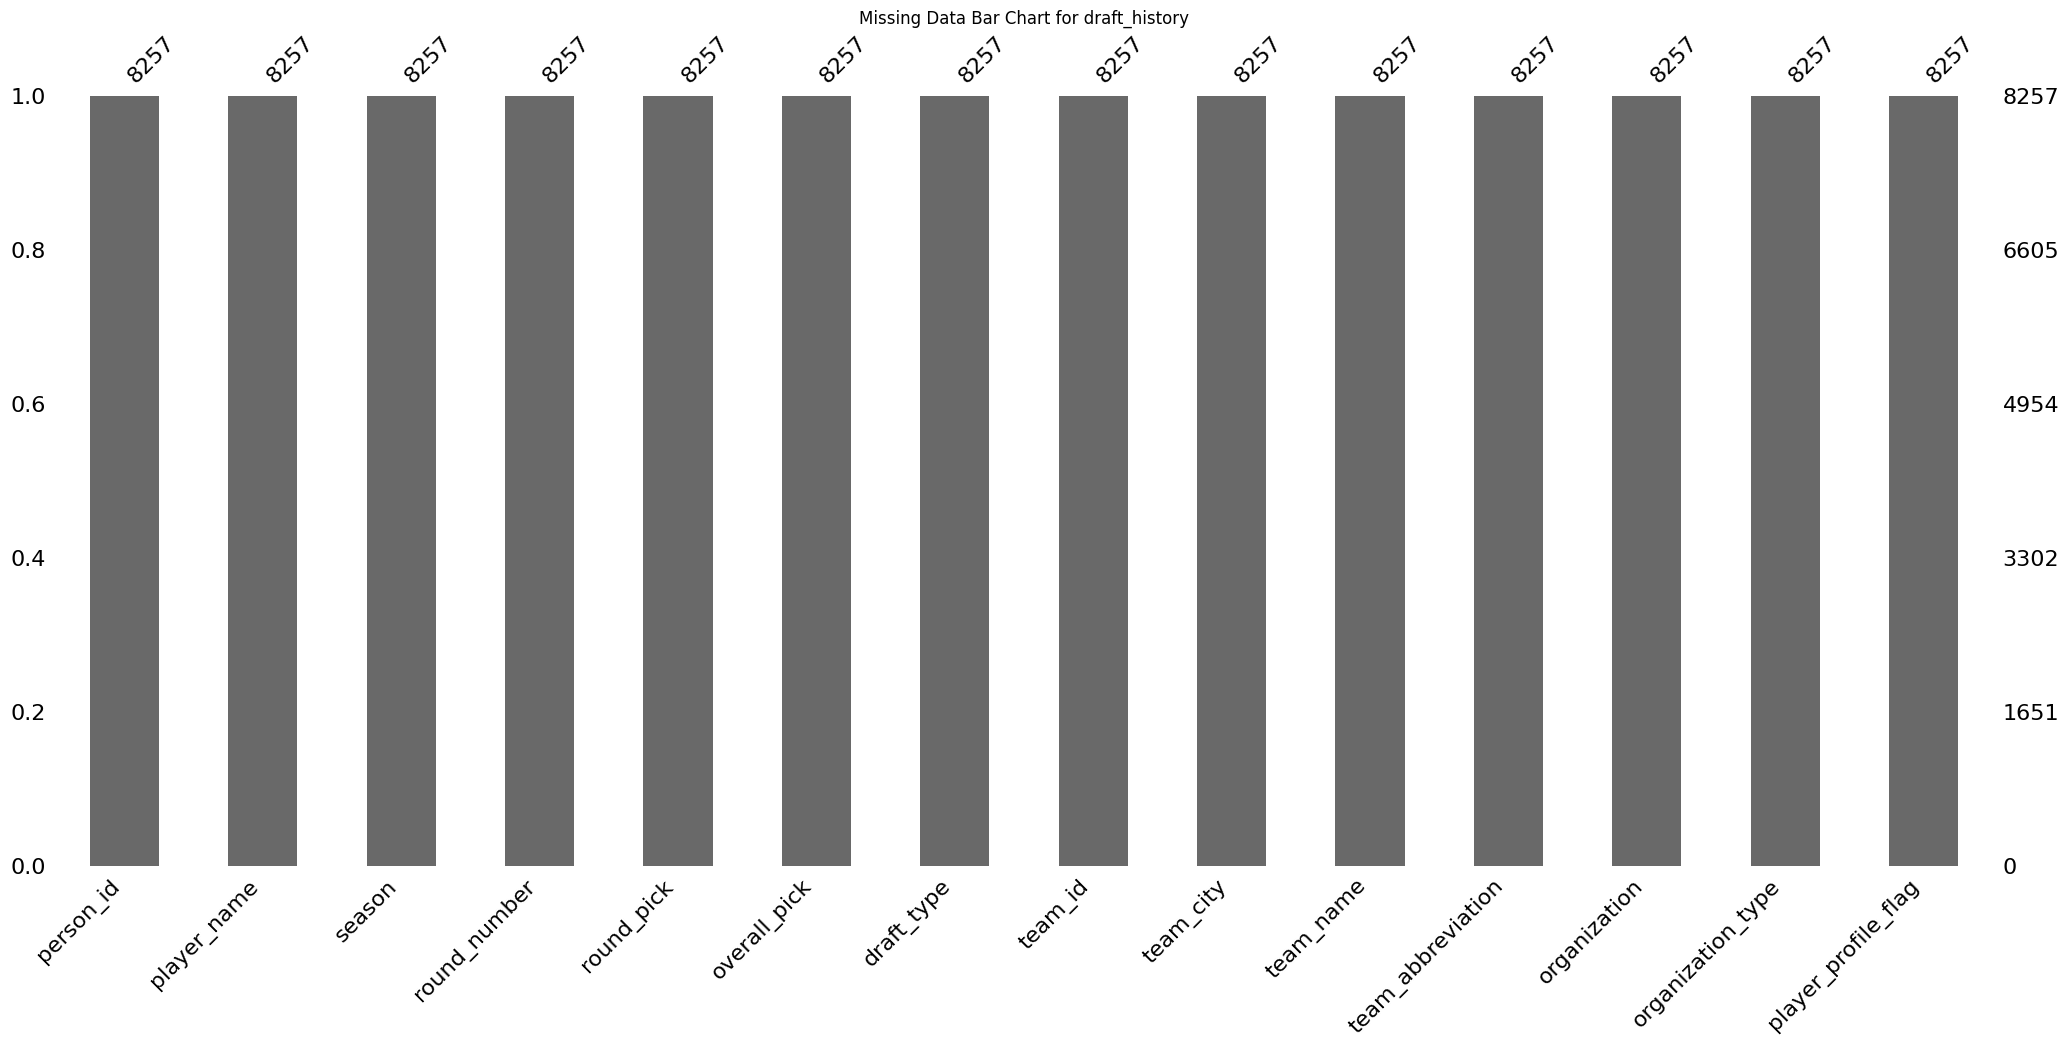

Saved Missing Data Bar Chart for draft_history as 'missing_data_bar_draft_history.png'


<Figure size 1000x600 with 0 Axes>

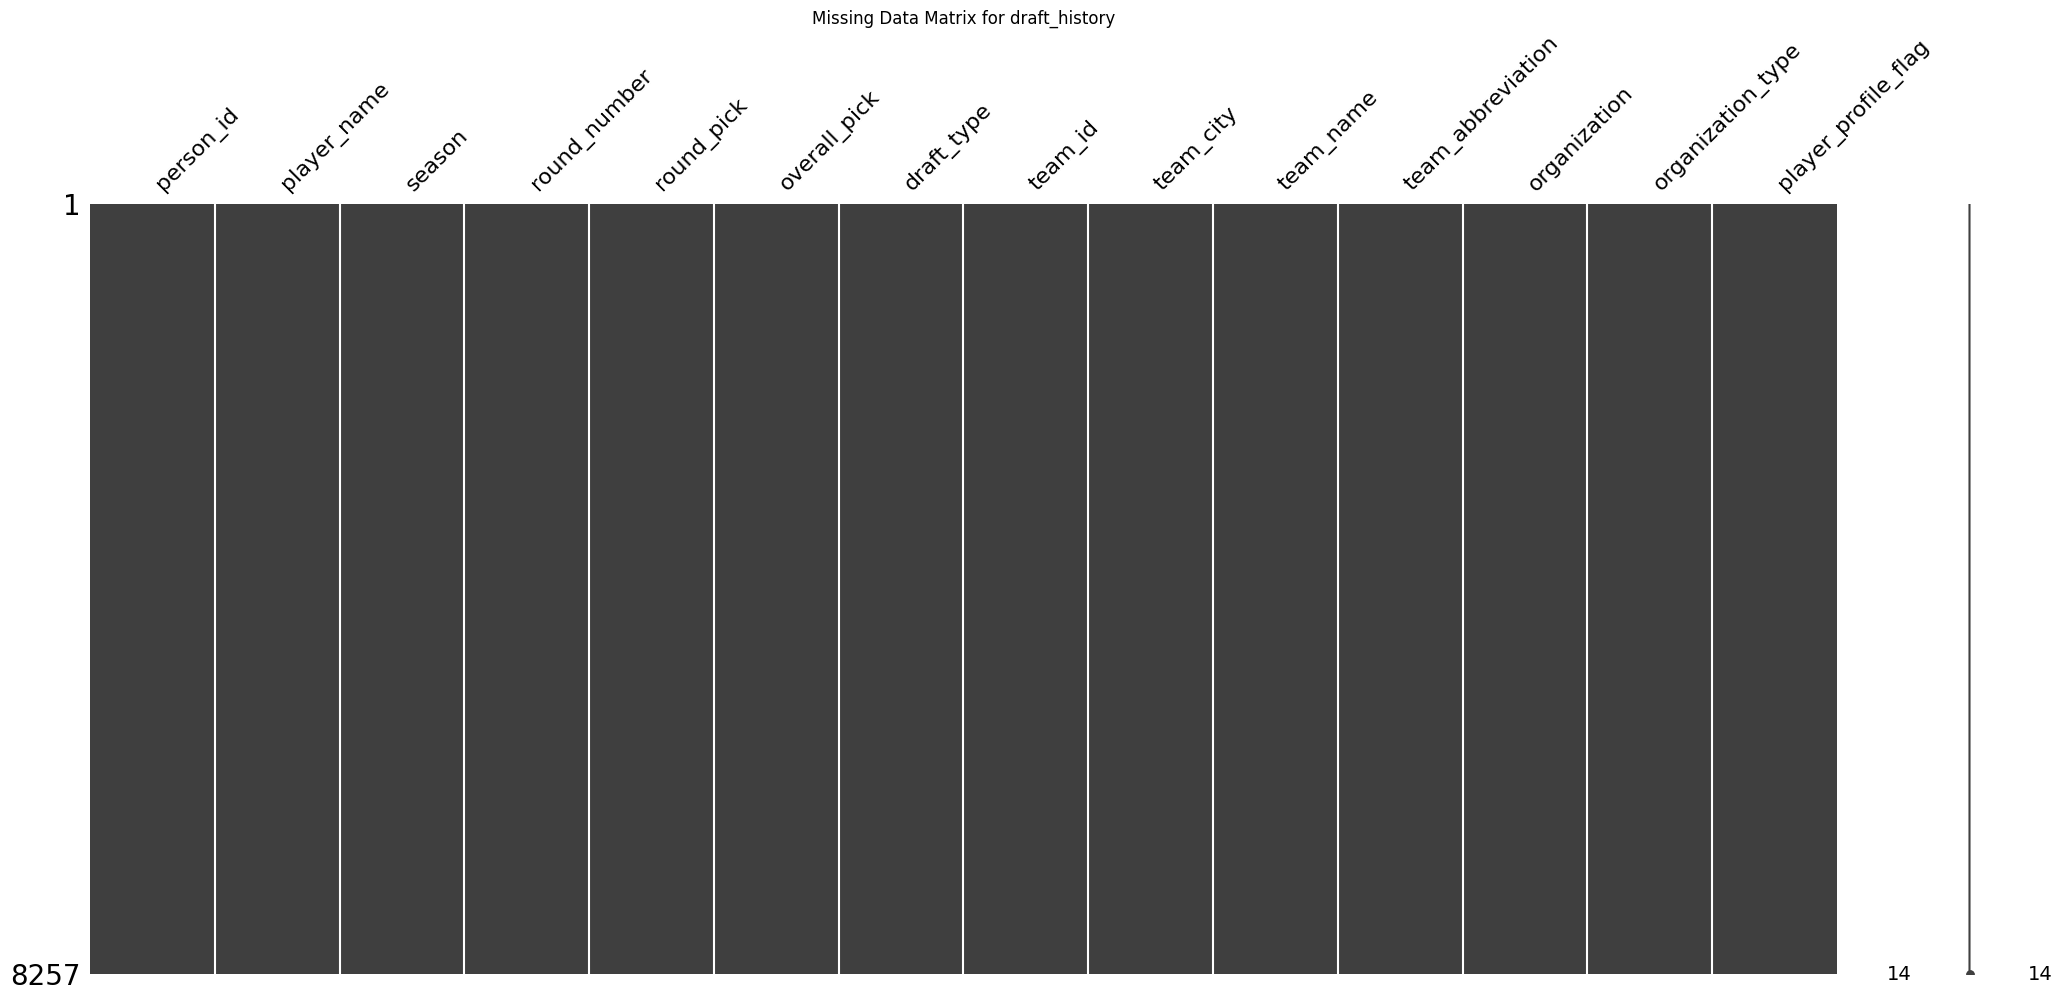

Saved Missing Data Matrix for draft_history as 'missing_data_matrix_draft_history.png'

Processing table: team_info_common
Table 'team_info_common' is empty, skipping...
SQL database connection closed


In [21]:
visualize_missing_data_for_all_tables()

In [23]:
df = pd.read_csv(r"C:\Users\dysonj\Downloads\NBA\common_player_info.csv")

In [25]:
df.head()

person_id first_name     last_name   display_first_last  \
0      76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1      76002       Zaid    Abdul-Aziz      Zaid Abdul-Aziz   
2      76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
3        949    Shareef   Abdur-Rahim  Shareef Abdur-Rahim   
4      76006     Forest          Able          Forest Able   

  display_last_comma_first  display_fi_last          player_slug  \
0          Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby   
1         Abdul-Aziz, Zaid    Z. Abdul-Aziz      zaid-abdul-aziz   
2     Abdul-Jabbar, Kareem  K. Abdul-Jabbar  kareem-abdul-jabbar   
3     Abdur-Rahim, Shareef   S. Abdur-Rahim  shareef-abdur-rahim   
4             Able, Forest          F. Able          forest-able   

             birthdate            school country  ...  \
0  1968-06-24 00:00:00              Duke     USA  ...   
1  1946-04-07 00:00:00        Iowa State     USA  ...   
2  1947-04-16 00:00:00              UCLA     USA  ...   
3  1976-12-11 00:00:00        California     USA  ...   
4  1932-07-27 00:00:00  Western Kentucky     USA  ...   

                    playercode from_year  to_year  dleague_flag nba_flag  \
0       HISTADD_alaa_abdelnaby    1990.0   1994.0             N        Y   
1      HISTADD_zaid_abdul-aziz    1968.0   1977.0             N        Y   
2  HISTADD_kareem_abdul-jabbar    1969.0   1988.0             N        Y   
3          shareef_abdur-rahim    1996.0   2007.0             N        Y   
4          HISTADD_frosty_able    1956.0   1956.0             N        Y   

  games_played_flag draft_year draft_round  draft_number greatest_75_flag  
0                 Y       1990           1            25                N  
1                 Y       1968           1             5                N  
2                 Y       1969           1             1                Y  
3                 Y       1996           1             3                N  
4                 Y       1956         NaN           NaN                N  

[5 rows x 33 columns]

In [27]:
df.describe()

person_id       weight   season_exp       team_id    from_year  \
count  3.632000e+03  3555.000000  3632.000000  3.632000e+03  3632.000000   
mean   3.359710e+05   211.201125     5.237059  1.345873e+09  1989.465859   
std    5.796896e+05    26.786843     4.493175  5.969962e+08    22.875700   
min    2.000000e+00   133.000000     0.000000  0.000000e+00  1946.000000   
25%    7.613600e+04   190.000000     2.000000  1.610613e+09  1974.000000   
50%    7.782650e+04   210.000000     3.000000  1.610613e+09  1992.000000   
75%    2.023328e+05   230.000000     8.000000  1.610613e+09  2010.000000   
max    1.641645e+06   360.000000    23.000000  1.610613e+09  2022.000000   

           to_year  
count  3632.000000  
mean   1993.945485  
std      23.631729  
min    1946.000000  
25%    1977.000000  
50%    1998.000000  
75%    2016.000000  
max    2023.000000

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         3632 non-null   int64  
 1   first_name                        3632 non-null   object 
 2   last_name                         3632 non-null   object 
 3   display_first_last                3632 non-null   object 
 4   display_last_comma_first          3632 non-null   object 
 5   display_fi_last                   3632 non-null   object 
 6   player_slug                       3632 non-null   object 
 7   birthdate                         3632 non-null   object 
 8   school                            3622 non-null   object 
 9   country                           3631 non-null   object 
 10  last_affiliation                  3632 non-null   object 
 11  height                            3558 non-null   object 
 12  weight

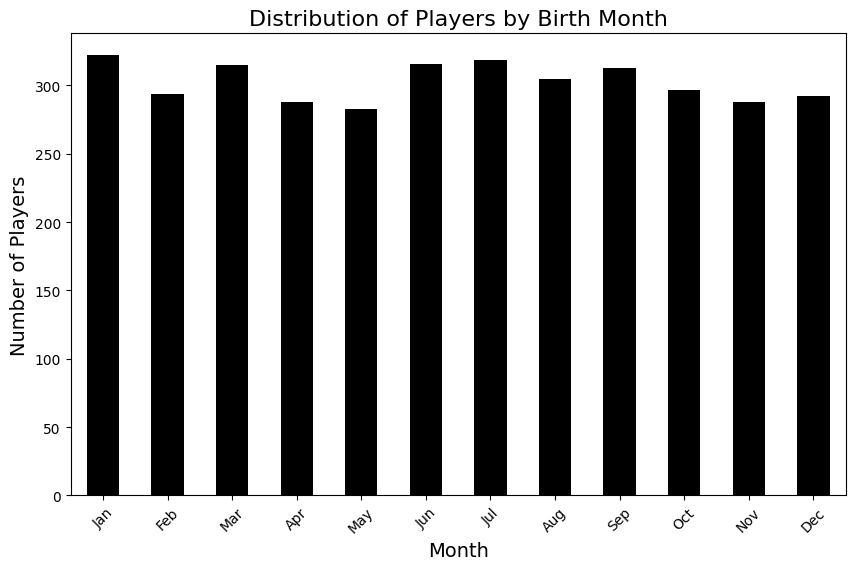

In [34]:
df['DOB'] = pd.to_datetime(df['birthdate'])

# Step 2: Extract the birth month from the 'DOB' column
df['Birth Month'] = df['DOB'].dt.month

# Step 3: Count the number of players born in each month
month_counts = df['Birth Month'].value_counts().sort_index()

# Step 4: Plot the distribution of players by birth month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='black')
plt.title('Distribution of Players by Birth Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()